### **Introdução**

Olá! Seja bem-vindo a este projeto de análise de dados relacionado ao [HackaOhli](https://sqlbi.com.br/hackaohli/). A missão da Ohli é "tornar o autocuidado um hábito". Dentro deste contexto, foram propostos dois grandes desafios para criação de dashboards no Power BI que incentivassem tanto colaboradores quanto gestores a dedicar uma atenção especial ao autocuidado e bem-estar. Neste documento, irei abordar brevemente a problemática do absenteísmo nas empresas, comentar sobre os datasets fornecidos, e apresentar o plano para desenvolver soluções inovadoras e funcionais para este desafio.

### **Desafio**

O absenteísmo nas empresas é um problema crescente, muitas vezes relacionado diretamente com a falta de autocuidado. A Ohli estima que a média de afastamentos no ano constitui cerca de 4% da força trabalho, causando uma perda de R$ 5,2 milhões por horas não trabalhadas.
Assim sendo, o autocuidado é vital não apenas para o bem-estar individual, mas também para manter uma força de trabalho saudável e produtiva. O desafio aqui é duplo:
1. Desenvolver um dashboard para colaboradores, que fomente o autocuidado, oferecendo insights personalizados sobre suas rotinas e bem-estar.
2. Criar um dashboard gerencial que forneça uma visão ampla sobre o absenteísmo na empresa.


### **Dados**

Os dados para este projeto foram fornecidos em vários arquivos Excel, cada um contendo informações vitais sobre os colaboradores e seus hábitos diários. Aqui estão eles:

##### **Colaboradores.xlsx**
- **ID**: Identificador único para cada colaborador.
- **Gênero, Estado Civil, Cargo, Departamento**: Detalhes demográficos e profissionais do colaborador.
- **Data de Contratação, Data de Demissão**: Informações sobre a jornada do colaborador na empresa.
- **Motivo de Desligamento**: A razão pela qual o colaborador deixou a empresa, se aplicável.
- **Salário, Cidade, Estado**: Dados adicionais sobre a situação do colaborador.

##### **Hábitos.xlsx**
- **ID**: Identificador único, correspondente ao ID em “Colaboradores.xlsx”.
- **Quantas horas costuma dormir por noite?**: Quantidade média de horas de sono por noite.
- **Quantas horas de tela em smartphones você costuma ter?**: Tempo diário médio gasto em smartphones.
- **Quantos passos você costuma dar por dia?**: Média diária de passos dados pelo colaborador.
- **Quantos litros de água costuma beber por dia?**: Quantidade média de água consumida diariamente.
- **O quanto você indicaria sua rotina alimentar para outra pessoa?**: Avaliação da dieta do colaborador.
- **Com que frequência consegue tirar tempo para hobbies?**: Frequência com que o colaborador se dedica a hobbies.
- **Com que frequência você se sente estressado?**: Frequência com que o colaborador sente estresse.
- **Quantas vezes por mês você realiza atendimento com profissionais da saúde mental?**: Número de consultas mensais com profissionais de saúde mental.
- **Com que frequência costuma tirar um tempo para aprender algo novo?**: Frequência com que o colaborador se dedica ao aprendizado.
- **Com que frequência você tira tempo para refletir sobre seus planos e sentimentos?**: Frequência com que o colaborador se dedica à reflexão pessoal.

##### **Perguntas.xlsx**
- **ID**: Identificador único para cada pergunta.
- **Pergunta**: Texto da pergunta feita ao colaborador.
- **Categoria**: Categoria ou tópico ao qual a pergunta pertence.

##### **Respostas (Perguntas.xlsx)**
- **DT**: Data em que a resposta foi registrada.
- **ID**: Identificador único do colaborador, correspondente ao ID nos outros arquivos.
- **IdPergunta**: Identificador da pergunta à qual o colaborador respondeu.
- **Nota**: Avaliação ou resposta dada pelo colaborador à pergunta.

##### **Afastamentos (Afastamentos.xlsx)**
- **ID**: Identificador único da tabela, chave primária.
- **ID**: Identificador único do colaborador, correspondente ao ID nos outros arquivos.
- **CID**: CID é a sigla para Classificação Internacional de Doenças e Problemas Relacionados com a Saúde, utilizado por profissionais e empresas do setor saúde.
- **Data_Inicio_Afastamento**: Data que o colaborador foi afastado do trabalho.
- **Data_Fim_Afastamento**: Data que o colaborador retornou ao trabalho.

Cada uma dessas tabelas será essencial para entender melhor os hábitos e sentimentos dos colaboradores e, assim, criar soluções que incentivem o autocuidado e melhorem o ambiente de trabalho.


### **Processo**

Para atender ao desafio proposto, meu plano é seguir os passos abaixo:

1. **Limpeza e cheques de integridade**: Vou iniciar inspecionando os dados e garantindo que estão corretos e padronizados para a análise.
   
2. **Análise dos dados fornecidos**: Após a limpeza, partirei para uma análise detalhada para identificar padrões e insights que poderiam ser úteis para os dashboards.

3. **Preparação para o Power BI**:  Nesta fase, me concentrarei em organizar os dados de uma maneira que facilite a exportação e integração com outras ferramentas.


Fique à vontade para acompanhar o desenvolvimento deste projeto. Estou aberto a sugestões e feedbacks para melhorar continuamente as soluções que estou propondo.


In [68]:
# Importação das bibliotecas de análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importação de datetime
from datetime import datetime

# Importação do módulo import para download
from google.colab import files

# Permitindo visualização de todas as colunas
pd.set_option('display.max_columns', None)

Com as bibliotecas importadas, vou dar uma primeira analisada nos dados fornecidos para identificar **necessidades de limpeza dos dados** e **informações disponíveis para a análise.**

In [69]:
# Lendo os arquivos depois do upload e armazenando em variáveis respectivas
colaboradores = pd.read_excel('Colaboradores.xlsx')
habitos = pd.read_excel('Hábitos.xlsx')
perguntas = pd.read_excel('Perguntas.xlsx')
respostas = pd.read_csv('Respostas.txt', delimiter=';')
afastamentos = pd.read_excel('Afastamentos.xlsx')

# Armazenando todos os dataframes em uma única variável para facilitar a visualização de toda a base de dados
tabelas = [colaboradores, habitos, perguntas, respostas, afastamentos]

# Iterando na variável tabelas para repetir operações de visualização de dados
for tabela in tabelas:
  tabela.info() # visualização da quantidade de nulos e dos tipos de dados

  # Iterando nas tabelas importadas para mostrar alguns valores únicos de cada tabela
  for coluna in tabela.columns:
    print(f"Alguns valores únicos para {coluna}: {tabela[coluna].unique()[:10]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646 entries, 0 to 3645
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  3646 non-null   int64         
 1   Genero              3646 non-null   object        
 2   EstadoCivil         3646 non-null   object        
 3   Cargo               3646 non-null   object        
 4   Departamento        3646 non-null   object        
 5   DataContratacao     3646 non-null   datetime64[ns]
 6   DataDemissao        2280 non-null   datetime64[ns]
 7   SituacaoFolha       3646 non-null   object        
 8   MotivoDesligamento  2275 non-null   object        
 9   DataNascimento      3646 non-null   datetime64[ns]
 10  Salario             3646 non-null   float64       
 11  Cidade              3403 non-null   object        
 12  Estado              3646 non-null   object        
dtypes: datetime64[ns](3), float64(1), int64(1), obje

### Limpeza dos Dados
Após uma primeira análise dos valores em cada coluna do dataset, assim como de seus respectivos nulls e tipos de dados, observei a necessidade das seguintes operações:

**Colaboradores**

- ID: Certificar-se que não haja duplicados
- Cargo: Pode ser interessante dividir a coluna em somente o cargo e somente o nível de senioridade. Será que cargos específicos possuem mais absenteísmos que outros? Será que níveis de senioridade específicos possuem tendências diferentes?
- Datas: Verificar integridade (Demissão precisa sempre ser posterior à Contratação), alterar datatype para somente date, criar uma coluna para tempo de empresa e talvez outra para idade.
- Nulos: Analisar as colunas específicas de data de demissão e motivo de desligamento.
- Cidade e Estado: Padronizar nomes

**Hábitos**

- ID: Verificar integridade com os IDs dos colaboradores

**Perguntas**

- Nada

**Respostas**

- DT: Certificar-se que o tipo é de datas e não de string
- IDs: Verificar integridade com os IDs correspondentes
- Nota: Transfortmar em float e verificar a integridade (entre 0 e 10)

**Afastamento**

- Id_Colaborador: Verificar a integridade
- Datas: Verificar a integridade (fim não pode ser antes de início) e transformar os datatypes
- Criar uma coluna para tempo de afastamentos
- Criar uma coluna para descrição de CID


#### Limpeza na Tabela Colaboradores

In [70]:
# Verificando IDs únicos
print(f"Colaboradores possui {len(colaboradores)} registros")
print(f"Destes, {len(colaboradores['ID'].unique())} sãos IDs únicos")

Colaboradores possui 3646 registros
Destes, 3646 sãos IDs únicos


Ao trabalhar com os cargos, primeiramente gostaria de ver **quais são os cargos presentes** no dataset:

In [71]:
# Cargos na empresa
print(f'Há {len(colaboradores["Cargo"].unique())} cargos distintos no dataset')
colaboradores["Cargo"].unique()

Há 295 cargos distintos no dataset


array(['ANALISTA DE TESTES SR', 'OPERADOR DE ATENDIMENTO JR',
       'ANALISTA DESENVOLVEDOR III', 'TECNICO DE TELECOM PL',
       'ANALISTA DESENVOLVEDOR SR', 'ANALISTA DESENVOLVEDOR PL',
       'ANALISTA DE RECURSOS HUMANOS PL', 'ANALISTA DE REQUISITOS PL',
       'ANALISTA DE SISTEMAS PL', 'ANALISTA DESENVOLVEDOR COBOL JR',
       'SCRUM MASTER II', 'ANALISTA DESENVOLVEDOR JAVA PL',
       'ANALISTA DE REQUISITOS III', 'ANALISTA DE TESTES III',
       'ADMINISTRADOR DE REDES SR', 'ANALISTA DE NEGOCIOS PL',
       'GERENTE DE PROJETOS PL', 'ANALISTA DESENVOLVEDOR JR',
       'ENGENHEIRO DE TELECOMUNICACOES PL', 'GERENTE SENIOR',
       'SCRUM MASTER III', 'TECNICO DE TELECOMUNICACOES JR',
       'ANALISTA DESENVOLVEDOR COBOL PL', 'ANALISTA UX/UI DESIGN PL',
       'TECNICO DE ATENDIMENTO PL', 'TECNICO DE SEGURANCA DO TRABALHO',
       'ARQUITETO DE SISTEMAS PL', 'TECNICO DE ATENDIMENTO JR',
       'ANALISTA DE NEGOCIOS III', 'TECNICO DE TELECOM SR',
       'ADMINISTRADOR BANCO DE DAD

Há **erros de entrada e falta de padronização** nos valores dessa coluna. Meu processo aqui será:

1. Criar uma lista de senioridade
2. Criar uma função para limpar a coluna "Cargos" e dividi-la em 2 novas colunas  

In [72]:
# Criando a coluna senioridade
senioridade = ["JR", "PL", "SR", "I", "II", "III", "SENIOR", "PLENO", "JR."]

In [73]:
# Criando uma função para auxiliar na divisão/limpeza dos cargos
def separa_cargo(cargo):
  # Dividi o cargo em espaços para facilitar a busca
  lista = cargo.split()

  # Inicia como None pra evitar erros no retorno
  termo_senioridade = None

  # Procura por senioridade em cargo
  for palavra in lista:
    if palavra in senioridade:
      # Quando o termo de senioridade é encontrado, remove do cargo e armazena numa variável nova
      termo_senioridade = palavra
      lista.remove(palavra)
      break

  # Junta o restante do cargo em uma única palavra
  cargo_only = " ".join(lista)

  # Retorna uma tupla para o cargo e outra para a senioridade
  return cargo_only, termo_senioridade

In [74]:
# Criando as 2 novas colunas
colaboradores["SoCargo"], colaboradores["Senioridade"] = zip(*colaboradores["Cargo"].apply(lambda x: separa_cargo(x)))

# Printando colaboradores
colaboradores.head()

ID     Genero  EstadoCivil                       Cargo Departamento  \
0   1  Masculino  Solteiro(a)       ANALISTA DE TESTES SR   TECHNOLOGY   
1   2  Masculino    Casado(a)  OPERADOR DE ATENDIMENTO JR    COMERCIAL   
2   3  Masculino  Solteiro(a)  ANALISTA DESENVOLVEDOR III   TECHNOLOGY   
3   4  Masculino    Casado(a)       TECNICO DE TELECOM PL    COMERCIAL   
4   5  Masculino    Casado(a)   ANALISTA DESENVOLVEDOR SR   TECHNOLOGY   

  DataContratacao DataDemissao SituacaoFolha MotivoDesligamento  \
0      2020-08-06   2020-12-01      Demitido         Voluntário   
1      2020-01-21   2020-05-20      Demitido            Empresa   
2      2021-07-05   2022-04-22      Demitido         Voluntário   
3      2021-09-13          NaT        Normal                NaN   
4      2019-01-21   2019-11-01      Demitido            Empresa   

  DataNascimento  Salario          Cidade            Estado  \
0     1981-08-05  6000.00        BRASILIA  Distrito Federal   
1     1967-07-21  1300.00  RIO DE JANEIRO    Rio de Janeiro   
2     1986-09-26  7000.00         GOIANIA             Goiás   
3     1970-10-18  2060.64         VITORIA    Espírito Santo   
4     1971-01-26  6422.09  RIO DE JANEIRO    Rio de Janeiro   

                   SoCargo Senioridade  
0       ANALISTA DE TESTES          SR  
1  OPERADOR DE ATENDIMENTO          JR  
2   ANALISTA DESENVOLVEDOR         III  
3       TECNICO DE TELECOM          PL  
4   ANALISTA DESENVOLVEDOR          SR

Com as 2 novas colunas criadas, vou averiguar os cargos únicos e se ainda há necessidade de mais transformações

In [75]:
# Checando cargos únicos
print(f"Nessa nova tabela há {len(colaboradores['SoCargo'].unique())} cargos ")
colaboradores["SoCargo"].unique()

Nessa nova tabela há 182 cargos 


array(['ANALISTA DE TESTES', 'OPERADOR DE ATENDIMENTO',
       'ANALISTA DESENVOLVEDOR', 'TECNICO DE TELECOM',
       'ANALISTA DE RECURSOS HUMANOS', 'ANALISTA DE REQUISITOS',
       'ANALISTA DE SISTEMAS', 'ANALISTA DESENVOLVEDOR COBOL',
       'SCRUM MASTER', 'ANALISTA DESENVOLVEDOR JAVA',
       'ADMINISTRADOR DE REDES', 'ANALISTA DE NEGOCIOS',
       'GERENTE DE PROJETOS', 'ENGENHEIRO DE TELECOMUNICACOES', 'GERENTE',
       'TECNICO DE TELECOMUNICACOES', 'ANALISTA UX/UI DESIGN',
       'TECNICO DE ATENDIMENTO', 'TECNICO DE SEGURANCA DO TRABALHO',
       'ARQUITETO DE SISTEMAS', 'ADMINISTRADOR BANCO DE DADOS',
       'ANALISTA PROGRAMADOR', 'ANALISTA DE GESTAO DE MUDANCAS',
       'ANALISTA DA QUALIDADE', 'ANALISTA DE SUPORTE',
       'COORDENADOR TECNICO', 'LIDER DE TESTES', 'ANALISTA FUNCIONAL',
       'TECNICO DE SUPORTE', 'ANALISTA DE CONFIGURACAO E MUDANCA',
       'ANALISTA DE PROJETOS', 'AUXILIAR ADMINISTRATIVO',
       'ANALISTA DESENV', 'ANALISTA DE ROTINAS ADMINISTRATIVAS'

Ainda há algumas inconsistências de texto, mas vou limpá-las posteriormente com a ajuda do chatGPT. Vale lembrar que já foi possível unificar mais de 100 entradas de cargo, só com a operação acima! Agora, vou checar a nova coluna senioridade

In [76]:
# Checando a coluna de senioridade
colaboradores["Senioridade"].value_counts()

JR        1173
SR         937
PL         894
III        102
I           53
SENIOR      15
II          10
PLENO        1
JR.          1
Name: Senioridade, dtype: int64

Boa parte desses valores pode ser unificado. Vou fazê-lo agora

In [77]:
# Criando nova função para limpar a coluna
def unificacao_senioridade(senioridade):
  if senioridade in ['JR', 'I', 'JR.']:
    return "JUNIOR"
  elif senioridade in ["SR", "III", "SENIOR"]:
    return "SENIOR"
  elif senioridade in ["PL", "II", "PLENO"]:
    return "PLENO"

# Corrigindo valores na coluna
colaboradores["Senioridade"] = colaboradores["Senioridade"].apply(lambda x: unificacao_senioridade(x))

# Mostrando resultado das transofrmações
colaboradores["Senioridade"].value_counts()

JUNIOR    1227
SENIOR    1054
PLENO      905
Name: Senioridade, dtype: int64

In [78]:
# Fazendo uma rápida checagem da integridade da coluna
print(f"Há {colaboradores['Senioridade'].value_counts().sum()} senioridades definidas na base")
print(f"Há {colaboradores['Senioridade'].isna().sum()} senioridades nulas na base")

Há 3186 senioridades definidas na base
Há 460 senioridades nulas na base


Há 460 senioridades que não foram definidas ainda com a nova função. Posso analisá-las agora para ver se há algo mais que possa ser feito:

In [79]:
# Obtendo os cargos daqueles que ainda não têm senioridade definida
colaboradores.loc[colaboradores["Senioridade"].isna() == True, "SoCargo"].unique()

array(['TECNICO DE SEGURANCA DO TRABALHO', 'COORDENADOR TECNICO',
       'LIDER DE TESTES', 'AUXILIAR ADMINISTRATIVO', 'GERENTE COMERCIAL',
       'ARQUITETO DE SOLUCOES', 'GERENTE DE CONTAS', 'CONSULTOR DE TI',
       'ESPECIALISTA DE NEGOCIOS', 'GERENTE DE SERVICOS DE TECNOLOGIA',
       'AUXILIAR DE SERVICOS GERAIS', 'ASSISTENTE ADMINISTRATIVO',
       'NAO INFORMADO', 'GERENTE DE RECURSOS HUMANOS', 'AGILE COACH',
       'PRODUCT OWNER', 'SUPERVISOR', 'VICE PRESIDENTE OPERACOES',
       'LIDER TECNICO', 'APRENDIZ', 'ANALISTA DE SEGURANCA',
       'ESPECIALISTA EM REDES', 'CONSULTOR FUNCIONAL S',
       'COORDENADOR FINANCEIRO', 'ESPECIALISTA DA QUALIDADE',
       'DIRETOR ADMINISTRATIVO', 'GERENTE ADMINISTRATIVO',
       'GERENTE EXECUTIVO DE SERVICOS DE TECNOLOGIA',
       'ASSISTENTE DE RECURSOS HUMANOS',
       'COORDENADOR DE SERVICOS DE TECNOLOGIA', 'ARQUITETO DE SISTEMAS',
       'COORDENADOR CONTABIL', 'ASSISTENTE ADMINISTRATIVO PETROBRAS',
       'ESPECIALISTA DESENVOLVEDOR'

Há registros com cargo não informado. Vou dar uma olhada neles:

In [80]:
colaboradores[colaboradores["SoCargo"] == "NAO INFORMADO"]

ID     Genero       EstadoCivil          Cargo Departamento  \
309    310  Masculino  Não Identificado  NAO INFORMADO       PEOPLE   
789    790  Masculino         Casado(a)  NAO INFORMADO       PEOPLE   
1051  1052  Masculino  Não Identificado  NAO INFORMADO       PEOPLE   
1629  1630  Masculino  Não Identificado  NAO INFORMADO       PEOPLE   
2077  2078  Masculino  Não Identificado  NAO INFORMADO       PEOPLE   

     DataContratacao DataDemissao SituacaoFolha MotivoDesligamento  \
309       2019-09-24   2019-11-14      Demitido             Outros   
789       2019-12-02   2020-02-05      Demitido             Outros   
1051      2019-03-25   2019-04-16      Demitido             Outros   
1629      2019-03-07   2019-03-26      Demitido             Outros   
2077      2019-02-25   2020-03-12      Demitido             Outros   

     DataNascimento  Salario     Cidade     Estado        SoCargo Senioridade  
309      1988-06-17  10920.0        NaN  São Paulo  NAO INFORMADO        None  
789      1976-07-17  50000.0  SAO PAULO  São Paulo  NAO INFORMADO        None  
1051     1988-12-24   9900.0        NaN  São Paulo  NAO INFORMADO        None  
1629     1985-07-10   7200.0        NaN  São Paulo  NAO INFORMADO        None  
2077     1983-12-21  20160.0        NaN  São Paulo  NAO INFORMADO        None

São registros bem estranhos, faltando informação para coisas como Cidade, MotivoDesligamento, Cargo e Estado Civil, todos relacionados ao departamento de PEOPLE. No entanto, como há informações coerentes, vou mantê-los na base

Por fim, para os **valores nulos**, considerei 2 possíveis alternativas:
1. Deixá-los como estão  (como há valores suficientes nas outras categorias, por amostragem, seria possível fazer inferências mesmo sem considerar todos os valores)
2. Substitui-los por PLENO (um valor intermediário).

Preferi **deixá-los como estão e assumir inferências com base nos resultados obtidos.**

Agora vou retornar à minha análise da coluna com somente cargos para ver se há alguma coisa que eu possa melhorar no processo de limpeza. Copiei os valores únicos da coluna só cargo numa [conversa](https://chat.openai.com/share/2dcf38a9-3fe2-4986-8499-3eda5b1b9470) com o ChatGPT, que me gerou alguns dicionários de correções para otimizar meu tempo.

In [81]:
# Primeira parte do dicionário de correções
correcoes_parte1 = {
    "ANALISTA DESV": "ANALISTA DE DESENVOLVIMENTO",
    "ANALISTA DESEV": "ANALISTA DE DESENVOLVIMENTO",
    "ANALISTA DESENVOLVEDO": "ANALISTA DE DESENVOLVIMENTO",
    "ANALISTA DESENVOLV": "ANALISTA DE DESENVOLVIMENTO",
    "ANALISTA DES JAVA": "ANALISTA DESENVOLVEDOR JAVA",
    "ANALISTA DESEN JAVA": "ANALISTA DESENVOLVEDOR JAVA",
    "ANALISTA DESENV JAVA": "ANALISTA DESENVOLVEDOR JAVA",
    "ANALISTA DESV JAVA": "ANALISTA DESENVOLVEDOR JAVA",
    "ANALISTA DESENVOLVEDOR ERP": "ANALISTA DESENVOLVEDOR ERP",
    "ANALISTA DESENVOLVEDOR COBOL": "ANALISTA DESENVOLVEDOR COBOL",
    "ANALISTA DA QUALIDADE": "ANALISTA DE QUALIDADE",
    "ESPECIALISTA DA QUALIDADE": "ESPECIALISTA DE QUALIDADE",
    "ANALISTA DE CONFIGURACAO E MUDANCA": "ANALISTA DE CONFIGURAÇÃO E MUDANÇA",
    "ANALISTA DE GESTAO DE MUDANCAS": "ANALISTA DE GESTÃO DE MUDANÇAS",
}

# Segunda parte do dicionário de correções
correcoes_parte2 = {
    "ANALISTA DE GESTAO DE CONTRATOS": "ANALISTA DE GESTÃO DE CONTRATOS",
    "COORDENADOR DE GESTAO DE CONTRATOS": "COORDENADOR DE GESTÃO DE CONTRATOS",
    "ANALISTA DE ADMINISTRACAO DE PESSOAL": "ANALISTA DE ADMINISTRAÇÃO DE PESSOAL",
    "ASSISTENTE DE ADMINISTRACAO DE PESSOAL": "ASSISTENTE DE ADMINISTRAÇÃO DE PESSOAL",
    "COORDENADOR DE ADMINISTRACAO DE PESSOAL": "COORDENADOR DE ADMINISTRAÇÃO DE PESSOAL",
    "ANALISTA DE ROTINAS ADMINSTRATIVAS": "ANALISTA DE ROTINAS ADMINISTRATIVAS",
    "ANALIST UX/UI DESIG": "ANALISTA UX/UI DESIGN",
    "ADM BANCO DE DADOS": "ADMINISTRADOR DE BANCO DE DADOS",
    "ADM DE REDES": "ADMINISTRADOR DE REDES",
    "ADMINISTRADOR BANCO DE DADOS": "ADMINISTRADOR DE BANCO DE DADOS",
}

# Terceira parte do dicionário de correções
correcoes_parte3 = {
    "ARQUITETO SISTEMAS": "ARQUITETO DE SISTEMAS",
    "ARQUITETO SOLUCOES": "ARQUITETO DE SOLUÇÕES",
    "CONSUL FUNCIONAL": "CONSULTOR FUNCIONAL",
    "CONS FUNCIONAL": "CONSULTOR FUNCIONAL",
    "CONSULTOR FUNCIONA": "CONSULTOR FUNCIONAL",
    "CONSULTOR FUNCIONAL S": "CONSULTOR FUNCIONAL SR",
    "CONSULTOR FUNCIONAL P": "CONSULTOR FUNCIONAL PL",
    "CONSULTO FUNCIONAL": "CONSULTOR FUNCIONAL",
    "CONSULTOR FUNC": "CONSULTOR FUNCIONAL",
    "CONSULTOR TI": "CONSULTOR DE TI",
    "TECNICO DE TELECOM": "TÉCNICO DE TELECOMUNICAÇÕES",
    "ENGENHEIRO DE TELECOMUNICACOES": "ENGENHEIRO DE TELECOMUNICAÇÕES",
    "TECNICO DE TELECOMUNICACOES": "TÉCNICO DE TELECOMUNICAÇÕES",
}

# Quarta parte do dicionário de correções
correcoes_parte4 = {
    "GERENTE DE SERVICOS DE TECNOLOGIA": "GERENTE DE SERVIÇOS DE TECNOLOGIA",
    "COORDENADOR DE SERVICOS DE TECNOLOGIA": "COORDENADOR DE SERVIÇOS DE TECNOLOGIA",
    "LIDER DE SERVICOS DE TECNOLOGIA": "LÍDER DE SERVIÇOS DE TECNOLOGIA",
    "GERENTE EXECUTIVO DE SERVICOS DE TECNOLOGIA": "GERENTE EXECUTIVO DE SERVIÇOS DE TECNOLOGIA",
    "ANALISTA SUP VENDAS": "ANALISTA DE SUPORTE A VENDAS",
    "ANALISTA SUPORTE": "ANALISTA DE SUPORTE",
    "TECNICO DE SUPORTE": "TÉCNICO DE SUPORTE",
    "ANALISTA PERFOMANCE": "ANALISTA DE PERFORMANCE",
    "ANALISTA DESENVOLVEDOR JAVA": "ANALISTA DESENVOLVEDOR JAVA",
    "ANALISTA PROGRAMADOR": "ANALISTA DESENVOLVEDOR",
    "ANALISTA DEVOPS": "ANALISTA DEVOPS",
}

# Quinta parte do dicionário de correções
correcoes_parte5 = {
    "ANALISTA SISTEMAS": "ANALISTA DE SISTEMAS",
    "ANALISTA CONTABIL": "ANALISTA CONTÁBIL",
    "GERENTE CONTABIL": "GERENTE CONTÁBIL",
    "COORDENADOR CONTABIL": "COORDENADOR CONTÁBIL",
    "ANALISTA DE ROTINAS ADMINSTRATIVAS": "ANALISTA DE ROTINAS ADMINISTRATIVAS",
    "ANALISTA DES.": "ANALISTA DESENVOLVEDOR",
    "ANALISTA DES. JAVA": "ANALISTA DESENVOLVEDOR JAVA",
    "ANALISTA DES JAVA": "ANALISTA DESENVOLVEDOR JAVA",
    "ANALISTA DESEN.": "ANALISTA DESENVOLVEDOR",
    "ANALISTA DESEN JAVA": "ANALISTA DESENVOLVEDOR JAVA",
    "ANALISTA DESEV JAVA": "ANALISTA DESENVOLVEDOR JAVA",
    "ANALISTA DESENVOLVEDO": "ANALISTA DESENVOLVEDOR",
    "ANALISTA DESENVOLV": "ANALISTA DESENVOLVEDOR",
    "ANALISTA DESV": "ANALISTA DESENVOLVEDOR",
    "ANALISTA DESV JAVA": "ANALISTA DESENVOLVEDOR JAVA",
    "ARQUITETO SOLUCOES": "ARQUITETO DE SOLUÇÕES",
    "COORDENADOR TECNICO": "COORDENADOR TÉCNICO",
    "LIDER TECNICO": "LÍDER TÉCNICO",
    "TECNICO DE ATENDIMENTO": "TÉCNICO DE ATENDIMENTO",
    "TECNICO DE INFORMATICA": "TÉCNICO DE INFORMÁTICA",
}

# Sexta parte do dicionário de correções
correcoes_parte6 = {
    "ANALISTA DE NEGOCIOS": "ANALISTA DE NEGÓCIOS",
    "ANALISTA DESENV": "ANALISTA DE DESENVOLVIMENTO",
    "ANALISTA DE PRODUCAO": "ANALISTA DE PRODUÇÃO",
    "ANALISTA DE SEGURANCA": "ANALISTA DE SEGURANÇA",
    "ANALISTA DE SEGURANCA DA INFORMACAO": "ANALISTA DE SEGURANÇA DA INFORMAÇÃO",
    "ANALISTA DE TELECOM": "ANALISTA DE TELECOMUNICAÇÕES",
    "ANALIS DESEN JAVA": "ANALISTA DESENVOLVEDOR JAVA",
    "AN DESEN": "ANALISTA DESENVOLVEDOR",
    "ARQUITETO DE SOLUCOES": "ARQUITETO DE SOLUÇÕES",
    "ASSISTENTE ADMINISTRATIVO PETROBRAS": "ASSISTENTE ADMINISTRATIVO",
    "AUXILIAR DE MANUTENCAO PREDIAL": "AUXILIAR DE MANUTENÇÃO PREDIAL",
    "CONSULTOR FUNCIONAL PL": "CONSULTOR FUNCIONAL PLENO",
    "CONSULTOR FUNCIONAL SR": "CONSULTOR FUNCIONAL SÊNIOR",
    "COORDENADOR DE ADMINISTRACAO DE PESSOAL": "COORDENADOR DE ADMINISTRAÇÃO DE PESSOAL",
    "DIRETOR DE OPERACOES": "DIRETOR DE OPERAÇÕES",
    "ESPECIALISTA EM CIENCIA DE DADOS": "ESPECIALISTA EM CIÊNCIA DE DADOS",
    "ESPECIALISTA EM INOVACAO": "ESPECIALISTA EM INOVAÇÃO",
    "ESPECIALISTA FINANCEIRO": "ESPECIALISTA FINANCEIRO",
    "ESPECIALISTA SEGURANCA DA INFORMACAO": "ESPECIALISTA EM SEGURANÇA DA INFORMAÇÃO",
    "GERENTE DE GESTAO DE CONTRATOS": "GERENTE DE GESTÃO DE CONTRATOS",
    "GERENTE EXE. SER. TEC": "GERENTE EXECUTIVO DE SERVIÇOS DE TECNOLOGIA",
    "LIDER DE ATENDIMENTO": "LÍDER DE ATENDIMENTO",
    "LIDER DE TESTES": "LÍDER DE TESTES",
    "LIDER SERV TECNOLOGIA": "LÍDER DE SERVIÇOS DE TECNOLOGIA",
    "TECNICO DE DESENVOLVIMENTO DE SISTEMAS": "TÉCNICO DE DESENVOLVIMENTO DE SISTEMAS",
}

# Sétima parte do dicionário de correções
correcoes_parte7 = {
    "GERENTE DE SERVICOS": "GERENTE DE SERVIÇOS",
    "GERENTE EXEC CONTAS": "GERENTE EXECUTIVO DE CONTAS",
    "GERENTE EXEC DE CONTAS": "GERENTE EXECUTIVO DE CONTAS",
    "GERENTE EXEC. CONTAS": "GERENTE EXECUTIVO DE CONTAS",
    "NAO INFORMADO": "NÃO INFORMADO",
    "TECNICO DE SEGURANCA DO TRABALHO": "TÉCNICO DE SEGURANÇA DO TRABALHO",
    "ESPEC EM SEG DA INF": "ESPECIALISTA EM SEGURANÇA DA INFORMAÇÃO",
    "VICE PRESIDENTE OPERACOES": "VICE-PRESIDENTE DE OPERAÇÕES",
    "VICE PRESIDENTE RECURSOS HUMANOS": "VICE-PRESIDENTE DE RECURSOS HUMANOS",
    "DIRETOR DE NEGOCIOS": "DIRETOR DE NEGÓCIOS",
    "DIRETOR GERAL VENDAS": "DIRETOR GERAL DE VENDAS",
    "AUTOMATIZADOR TESTE": "AUTOMATIZADOR DE TESTES",
    "ANALISTA PROGRAM": "ANALISTA PROGRAMADOR",
    "ARQUITETO JAVA": "ARQUITETO JAVA",
    "ESPECIALISTA DESENVOL": "ESPECIALISTA DESENVOLVEDOR",
    "ESPECIALISTA DESENVOLVEDOR": "ESPECIALISTA DESENVOLVEDOR",
    "ESPECIAL BANCO DADOS": "ESPECIALISTA EM BANCO DE DADOS",
    "ESPECIALISTA AGILE COACH": "ESPECIALISTA EM AGILE COACH",
    "COORDENADOR DE GESTAO DE CONTRATOS": "COORDENADOR DE GESTÃO DE CONTRATOS",
    "COORDENADOR DE GESTÃO DE CONTRATOS": "COORDENADOR DE GESTÃO DE CONTRATOS",
    "ANALISTA DE GESTÃO DE CONTRATOS": "ANALISTA DE GESTÃO DE CONTRATOS",
    "GERENTE DE GESTÃO DE CONTRATOS": "GERENTE DE GESTÃO DE CONTRATOS",
    "WEB DESIGNER": "WEB DESIGNER",
}

# Oitava parte do dicionário de correções
correcoes_parte8 = {
    "ESPECIALISTA DE NEGOCIOS": "ESPECIALISTA DE NEGÓCIOS",
    "AUXILIAR DE SERVICOS GERAIS": "AUXILIAR DE SERVIÇOS GERAIS",
    "DESENV SQL": "DESENVOLVEDOR SQL",
    "ANALISTA DE ATRACAO DE TALENTOS": "ANALISTA DE ATRAÇÃO DE TALENTOS",
    "GERENTE DE OPERACOES": "GERENTE DE OPERAÇÕES",
    "CONSULTOR FUNCIONAL PLENO": "CONSULTOR FUNCIONAL PLENO",
    "WEB DESIGNER": "DESIGNER WEB",
    "ESPECIALISTA FINANCEIRO": "ESPECIALISTA EM FINANÇAS",
    "GERENTE EXECUT CONTAS": "GERENTE EXECUTIVO DE CONTAS",
    "ESTAGIARIO": "ESTAGIÁRIO",
    "ANALISTA DE ATRACAO DE TALENTOS": "ANALISTA DE ATRAÇÃO DE TALENTOS",
    "APRENDIZ TI": "APRENDIZ EM TI",
    "ARQUITETO JAVA": "ARQUITETO JAVA",
    "GERENTE DE QAS": "GERENTE DE QA (QUALITY ASSURANCE)",
    "COORDENADOR DE ADMINISTRAÇÃO DE PESSOAL": "COORDENADOR DE ADMINISTRAÇÃO DE PESSOAL",
    "ANALISTA CIENTISTA DE DADOS": "CIENTISTA DE DADOS",
    "ANALISTA DE TELECOMUNICAÇÕES": "ANALISTA DE TELECOMUNICAÇÕES",
    "ANALISTA PROGRAMADOR": "ANALISTA PROGRAMADOR",
    "GERENTE EXECUTIVO DE MARKETING": "GERENTE EXECUTIVO DE MARKETING",
    "SERVICE DESIGNER": "DESIGNER DE SERVIÇOS",
    "ARQUITETO DE SOLUC": "ARQUITETO DE SOLUÇÕES",
    "CFO": "DIRETOR FINANCEIRO (CFO)",
    "CFO DIRETOR FINANCEIRO": "DIRETOR FINANCEIRO (CFO)"
}


# Unindo todos os dicionários em um único dicionário
correcoes_cargo  = {}
correcoes_cargo.update(correcoes_parte1)
correcoes_cargo.update(correcoes_parte2)
correcoes_cargo.update(correcoes_parte3)
correcoes_cargo.update(correcoes_parte4)
correcoes_cargo.update(correcoes_parte5)
correcoes_cargo.update(correcoes_parte6)
correcoes_cargo.update(correcoes_parte7)
correcoes_cargo.update(correcoes_parte8)

# Validando o dicionário final
print(f"O dicionário final tem {len(correcoes_cargo)} cargos")

O dicionário final tem 124 cargos


Com um novo dicionário criado, estou pronto para mapear a coluna "SoCargo"

In [82]:
# Corrigindo a coluna SoCargo
colaboradores["SoCargo"] = colaboradores["SoCargo"].replace(correcoes_cargo)

# Verificando o número de cargos únicos
print(f"Agora há {len(colaboradores['SoCargo'].unique())} cargos distintos na coluna")

# Mostrando os cargos distintos
colaboradores['SoCargo'].unique()

Agora há 140 cargos distintos na coluna


array(['ANALISTA DE TESTES', 'OPERADOR DE ATENDIMENTO',
       'ANALISTA DESENVOLVEDOR', 'TÉCNICO DE TELECOMUNICAÇÕES',
       'ANALISTA DE RECURSOS HUMANOS', 'ANALISTA DE REQUISITOS',
       'ANALISTA DE SISTEMAS', 'ANALISTA DESENVOLVEDOR COBOL',
       'SCRUM MASTER', 'ANALISTA DESENVOLVEDOR JAVA',
       'ADMINISTRADOR DE REDES', 'ANALISTA DE NEGÓCIOS',
       'GERENTE DE PROJETOS', 'ENGENHEIRO DE TELECOMUNICAÇÕES', 'GERENTE',
       'ANALISTA UX/UI DESIGN', 'TÉCNICO DE ATENDIMENTO',
       'TÉCNICO DE SEGURANÇA DO TRABALHO', 'ARQUITETO DE SISTEMAS',
       'ADMINISTRADOR DE BANCO DE DADOS', 'ANALISTA PROGRAMADOR',
       'ANALISTA DE GESTÃO DE MUDANÇAS', 'ANALISTA DE QUALIDADE',
       'ANALISTA DE SUPORTE', 'COORDENADOR TÉCNICO', 'LÍDER DE TESTES',
       'ANALISTA FUNCIONAL', 'TÉCNICO DE SUPORTE',
       'ANALISTA DE CONFIGURAÇÃO E MUDANÇA', 'ANALISTA DE PROJETOS',
       'AUXILIAR ADMINISTRATIVO', 'ANALISTA DE DESENVOLVIMENTO',
       'ANALISTA DE ROTINAS ADMINISTRATIVAS', 'GERE

Há ainda alguns cargos com senioridade, então vou corrigi-los e adicionar a senioridade na coluna apropriada

In [83]:
# Localizando cargos nível PLENO e SENIOR e atualizando o valor da senioridade
colaboradores.loc[colaboradores["SoCargo"] == 'CONSULTOR FUNCIONAL PL', "Senioridade"] = 'PLENO'
colaboradores.loc[colaboradores["SoCargo"] == 'CONSULTOR FUNCIONAL SR', "Senioridade"] = 'SENIOR'

# Verificando o sucesso da operação
colaboradores.loc[colaboradores["SoCargo"].isin(['CONSULTOR FUNCIONAL PL', 'CONSULTOR FUNCIONAL SR']),]

ID     Genero       EstadoCivil                  Cargo Departamento  \
762    763   Feminino  Não Identificado  CONSULTOR FUNCIONAL S      PRODUCT   
3073  3074  Masculino  Não Identificado  CONSULTOR FUNCIONAL P      PRODUCT   

     DataContratacao DataDemissao SituacaoFolha MotivoDesligamento  \
762       2021-10-21          NaT        Normal                NaN   
3073      2022-09-05          NaT        Normal                NaN   

     DataNascimento   Salario Cidade     Estado                 SoCargo  \
762      1974-11-20  17599.68    NaN  São Paulo  CONSULTOR FUNCIONAL SR   
3073     1988-09-25  17640.00    NaN  São Paulo  CONSULTOR FUNCIONAL PL   

     Senioridade  
762       SENIOR  
3073       PLENO

In [84]:
# Removendo os termos PLENO e SÊNIOR da coluna só cargo
colaboradores["SoCargo"] = colaboradores["SoCargo"].apply(lambda x: x.replace(" PL", "").replace(" SR", ""))

# Verificando o sucesso da operação
colaboradores.loc[colaboradores["SoCargo"].isin(['CONSULTOR FUNCIONAL PL', 'CONSULTOR FUNCIONAL SR']),]

Empty DataFrame
Columns: [ID, Genero, EstadoCivil, Cargo, Departamento, DataContratacao, DataDemissao, SituacaoFolha, MotivoDesligamento, DataNascimento, Salario, Cidade, Estado, SoCargo, Senioridade]
Index: []

Dando uma última analisada na coluna SoCargo

In [85]:
colaboradores["SoCargo"].value_counts()

ANALISTA DESENVOLVEDOR                 734
TÉCNICO DE ATENDIMENTO                 370
ANALISTA DE TESTES                     286
TÉCNICO DE SUPORTE                     231
ANALISTA DE SUPORTE                    153
                                      ... 
VICE-PRESIDENTE DE RECURSOS HUMANOS      1
GERENTE DE GESTÃO DE CONTRATOS           1
DIRETOR ADMINISTRATIVO                   1
DESENVOLVEDOR JAVA                       1
CONSULTOR SAP                            1
Name: SoCargo, Length: 138, dtype: int64

Pronto! Agora vou passar pra limpeza das colunas de datas. Começando com a criação da coluna idade

In [86]:
# Criando a coluna pra idade
colaboradores["Idade"] = (datetime.now() - colaboradores["DataNascimento"]).astype('<m8[Y]').astype(int)

# Observando as primeiras linhas para fazer a validação
colaboradores.head()

ID     Genero  EstadoCivil                       Cargo Departamento  \
0   1  Masculino  Solteiro(a)       ANALISTA DE TESTES SR   TECHNOLOGY   
1   2  Masculino    Casado(a)  OPERADOR DE ATENDIMENTO JR    COMERCIAL   
2   3  Masculino  Solteiro(a)  ANALISTA DESENVOLVEDOR III   TECHNOLOGY   
3   4  Masculino    Casado(a)       TECNICO DE TELECOM PL    COMERCIAL   
4   5  Masculino    Casado(a)   ANALISTA DESENVOLVEDOR SR   TECHNOLOGY   

  DataContratacao DataDemissao SituacaoFolha MotivoDesligamento  \
0      2020-08-06   2020-12-01      Demitido         Voluntário   
1      2020-01-21   2020-05-20      Demitido            Empresa   
2      2021-07-05   2022-04-22      Demitido         Voluntário   
3      2021-09-13          NaT        Normal                NaN   
4      2019-01-21   2019-11-01      Demitido            Empresa   

  DataNascimento  Salario          Cidade            Estado  \
0     1981-08-05  6000.00        BRASILIA  Distrito Federal   
1     1967-07-21  1300.00  RIO DE JANEIRO    Rio de Janeiro   
2     1986-09-26  7000.00         GOIANIA             Goiás   
3     1970-10-18  2060.64         VITORIA    Espírito Santo   
4     1971-01-26  6422.09  RIO DE JANEIRO    Rio de Janeiro   

                       SoCargo Senioridade  Idade  
0           ANALISTA DE TESTES      SENIOR     42  
1      OPERADOR DE ATENDIMENTO      JUNIOR     56  
2       ANALISTA DESENVOLVEDOR      SENIOR     36  
3  TÉCNICO DE TELECOMUNICAÇÕES       PLENO     52  
4       ANALISTA DESENVOLVEDOR      SENIOR     52

Agora vou criar a coluna tempo de empresa

In [87]:
# Criando uma coluna para tempo de empresa
colaboradores["TempoEmpresa"] = (colaboradores['DataDemissao'] - colaboradores['DataContratacao']).dt.days

# Preenchendo valores nulos com a data atual
colaboradores["TempoEmpresa"].fillna((datetime.now() - colaboradores['DataContratacao']).dt.days, inplace=True)

# Transformando a coluna em inteiro
colaboradores["TempoEmpresa"] = colaboradores["TempoEmpresa"].astype('int')

# Mostrando os resultados
colaboradores["TempoEmpresa"]

0       117
1       120
2       291
3       732
4       284
       ... 
3641     25
3642     25
3643     25
3644     25
3645     25
Name: TempoEmpresa, Length: 3646, dtype: int64

Verificando a integridade das datas usando a coluna TempoEmpresa

In [88]:
colaboradores[colaboradores["TempoEmpresa"] <= 0]

ID     Genero    EstadoCivil                                   Cargo  \
1666  1667   Feminino      Casado(a)               TECNICO DE ATENDIMENTO JR   
2087  2088   Feminino  Divorciado(a)                 ANALISTA DE PROJETOS JR   
2181  2182  Masculino    Solteiro(a)               ANALISTA DESENVOLVEDOR PL   
2184  2185   Feminino  União Estável              OPERADOR DE ATENDIMENTO JR   
2335  2336   Feminino    Solteiro(a)              OPERADOR DE ATENDIMENTO JR   
3309  3310   Feminino      Casado(a)  ANALISTA DE ROTINAS ADMINISTRATIVAS JR   
3497  3498  Masculino  Divorciado(a)                   TECNICO DE SUPORTE JR   

     Departamento DataContratacao DataDemissao SituacaoFolha  \
1666    COMERCIAL      2021-06-01   2021-06-01      Demitido   
2087     INOVAÇÃO      2021-07-01   2021-07-01      Demitido   
2181   TECHNOLOGY      2021-07-05   2021-07-05      Demitido   
2184    COMERCIAL      2020-04-01   2020-04-01      Demitido   
2335    COMERCIAL      2020-04-01   2020-04-01      Demitido   
3309    COMERCIAL      2023-04-03   2023-04-03      Demitido   
3497   TECHNOLOGY      2023-07-21   2023-07-21      Demitido   

     MotivoDesligamento DataNascimento  Salario     Cidade          Estado  \
1666         Voluntário     1994-03-23  1381.44      MACAE  Rio de Janeiro   
2087         Voluntário     1983-08-25  2500.00  SAO PAULO       São Paulo   
2181         Voluntário     1984-11-08  6200.00    DIADEMA       São Paulo   
2184         Voluntário     1986-09-22  1500.00  SAO PAULO       São Paulo   
2335         Voluntário     1991-09-01  1500.00  SAO PAULO       São Paulo   
3309         Voluntário     1987-08-21  3500.00     OSASCO       São Paulo   
3497         Voluntário     1980-01-13  2195.26  SAO PAULO       São Paulo   

                                  SoCargo Senioridade  Idade  TempoEmpresa  
1666               TÉCNICO DE ATENDIMENTO      JUNIOR     29             0  
2087                 ANALISTA DE PROJETOS      JUNIOR     40             0  
2181               ANALISTA DESENVOLVEDOR       PLENO     38             0  
2184              OPERADOR DE ATENDIMENTO      JUNIOR     36             0  
2335              OPERADOR DE ATENDIMENTO      JUNIOR     32             0  
3309  ANALISTA DE ROTINAS ADMINISTRATIVAS      JUNIOR     36             0  
3497                   TÉCNICO DE SUPORTE      JUNIOR     43             0

Não há funcionários com **tempo de empresa negativos** (o que é ótimo!), mas alguns com **tempo de empresa igual a 0**. Provavelmente, vou querer removê-los de todas as tabelas, então vou armazenar seus respectivos IDs em uma nova variável:

In [89]:
# Adicionando a nova variável:
# Iniciando lista vazia
ids_para_remover = []

# Populando a lista de IDs para remover
for id in colaboradores.loc[colaboradores["TempoEmpresa"] <= 0, "ID"].unique():
  ids_para_remover.append(id)

# Verificando que a lista foi populada adequadamente
ids_para_remover

[1667, 2088, 2182, 2185, 2336, 3310, 3498]

Por fim, vou remover o componente temporal das datas para uma melhor performance e acurácia:

In [90]:
# Substituindo colunas de datetime por somente date
colaboradores['DataContratacao'] = pd.to_datetime(colaboradores['DataContratacao']).dt.date
colaboradores['DataDemissao'] = pd.to_datetime(colaboradores['DataDemissao']).dt.date
colaboradores['DataNascimento'] = pd.to_datetime(colaboradores['DataNascimento']).dt.date

# Visualizando informações para a tabela colaboradores após limpeza inicial
colaboradores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646 entries, 0 to 3645
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3646 non-null   int64  
 1   Genero              3646 non-null   object 
 2   EstadoCivil         3646 non-null   object 
 3   Cargo               3646 non-null   object 
 4   Departamento        3646 non-null   object 
 5   DataContratacao     3646 non-null   object 
 6   DataDemissao        2280 non-null   object 
 7   SituacaoFolha       3646 non-null   object 
 8   MotivoDesligamento  2275 non-null   object 
 9   DataNascimento      3646 non-null   object 
 10  Salario             3646 non-null   float64
 11  Cidade              3403 non-null   object 
 12  Estado              3646 non-null   object 
 13  SoCargo             3646 non-null   object 
 14  Senioridade         3188 non-null   object 
 15  Idade               3646 non-null   int64  
 16  TempoE

Ainda há alguns valores nulos que podem ser tratados:

- DataDemissão: Funcionários ativos não deveriam ter data de demissão.

- MotivoDesligamento: Parece que há 5 funcionários que não possuem Motivo de Desligamento, mas vou averiguar melhor.

- Cidade: Provavelmente, não há nada que eu possa fazer para os colaboradores sem cidade

- Senioridade: Já abordei meu raciocínio nesse notebook

Vou começar checando a integridade/relacionamento entre DataDemissão e MotivoDesligamento

In [91]:
# Encontrando registros com DataDemissao não nula, mas MotivoDesligamento nulo
sem_motivo = colaboradores[(colaboradores['DataDemissao'].notnull()) & (colaboradores['MotivoDesligamento'].isnull())]

# Encontrando registros com MotivoDesligamento não nulo, mas DataDemissao nula
sem_data = colaboradores[(colaboradores['MotivoDesligamento'].notnull()) & (colaboradores['DataDemissao'].isnull())]

# Mostrando os resultados
print('Registros com DataDemissao não nula, mas MotivoDesligamento nulo:')
print(sem_motivo)

print('\nRegistros com MotivoDesligamento não nulo, mas DataDemissao nula:')
print(sem_data)

Registros com DataDemissao não nula, mas MotivoDesligamento nulo:
        ID     Genero       EstadoCivil                   Cargo Departamento  \
395    396  Masculino  Não Identificado  CONSULTOR FUNCIONAL SR      PRODUCT   
881    882  Masculino       Solteiro(a)  CONSULTOR FUNCIONAL SR      PRODUCT   
3198  3199  Masculino  Não Identificado  CONSULTOR FUNCIONAL PL      PRODUCT   
3302  3303  Masculino  Não Identificado   ANALISTA DESENVOLV SR   TECHNOLOGY   
3361  3362  Masculino  Não Identificado  CONSULTOR FUNCIONAL PL      PRODUCT   

     DataContratacao DataDemissao SituacaoFolha MotivoDesligamento  \
395       2021-04-28   2023-08-21        Normal                NaN   
881       2021-04-15   2023-08-18        Normal                NaN   
3198      2022-12-30   2023-07-31        Normal                NaN   
3302      2023-04-03   2023-07-10        Normal                NaN   
3361      2023-05-02   2023-08-04        Normal                NaN   

     DataNascimento  Salario    

**Todos** que possuem motivo de desligamento possuem data de demissão.

**5** colaboradores demitidos ainda não possuem motivo de desligamento. Seriam esses os demitidos mais recentes?

In [92]:
colaboradores["DataDemissao"].sort_values(ascending=False)

3354    2023-08-25
3124    2023-08-25
3311    2023-08-24
2667    2023-08-24
2941    2023-08-22
           ...    
3641           NaT
3642           NaT
3643           NaT
3644           NaT
3645           NaT
Name: DataDemissao, Length: 3646, dtype: object

**Não**, houveram outros demtidos mais recentemente, mas que já possuem um motivo de demissão.

Além disso, reparei que todos esses que não têm motivo, possuem Situação da Folha como **Normal**.

Vou analisar a relação a situação da folha e a data de demissão assim como com o motivo de desligamento.

In [93]:
# Contando o número de demitidos com base na Situação da Folha
print(f"Com base na Situação da Folha, há {len(colaboradores[colaboradores['SituacaoFolha'] == 'Demitido'])} demitidos")

# Encontrando registros com DataDemissao não nula, mas SituacaoFolha diferente de Demitido
com_data = colaboradores[(colaboradores['DataDemissao'].notnull()) &
 (colaboradores['SituacaoFolha'] != 'Demitido')]

# Encontrando registros com MotivoDesligamento não nulo, mas SituacaoFolha diferente de Demitido
com_motivo = colaboradores[(colaboradores['MotivoDesligamento'].notnull()) &
 (colaboradores['SituacaoFolha'] != 'Demitido')]

# Mostrando os resultados
print('Registros com DataDemissao não nula, mas SituacaoFolha diferente de Demitido:')
print(com_data)

print('\nRegistros com MotivoDesligamento não nulo, mas SituacaoFolha diferente de Demitido')
print(com_motivo)

Com base na Situação da Folha, há 2275 demitidos
Registros com DataDemissao não nula, mas SituacaoFolha diferente de Demitido:
        ID     Genero       EstadoCivil                   Cargo Departamento  \
395    396  Masculino  Não Identificado  CONSULTOR FUNCIONAL SR      PRODUCT   
881    882  Masculino       Solteiro(a)  CONSULTOR FUNCIONAL SR      PRODUCT   
3198  3199  Masculino  Não Identificado  CONSULTOR FUNCIONAL PL      PRODUCT   
3302  3303  Masculino  Não Identificado   ANALISTA DESENVOLV SR   TECHNOLOGY   
3361  3362  Masculino  Não Identificado  CONSULTOR FUNCIONAL PL      PRODUCT   

     DataContratacao DataDemissao SituacaoFolha MotivoDesligamento  \
395       2021-04-28   2023-08-21        Normal                NaN   
881       2021-04-15   2023-08-18        Normal                NaN   
3198      2022-12-30   2023-07-31        Normal                NaN   
3302      2023-04-03   2023-07-10        Normal                NaN   
3361      2023-05-02   2023-08-04        N

Há **5 registros** na base de dados com uma data de demissão não nula, mas com motivo de desligamento nulo e situação da folha normal.

**Todos os outros 2275 registros** de funcionários nessa base possuem dados mais consistentes (data de desligamento e motivo de desligamento não nulos, além de situação da folha como "Demitido").

Numa situação mais real, eu verificaria os dados com o departamento de RH. Mas para os fins desta análise, eu provavelmente não considerarei os colaboradores inconsistentes **(algo em torno de 0.2% do dataset)**, uma vez que não posso ter certeza se estão ativos ou desligados. Por hora, vou salvar os registros com cancelamentos inconsitentes na variável ids_para_remover.

In [94]:
# Populando ids_para_remover com os ids que acabei de analisar
for id in colaboradores.loc[(colaboradores['DataDemissao'].notnull()) &
                            (colaboradores["SituacaoFolha"] == "Normal"), "ID"].unique():
  ids_para_remover.append(id)

# Mostrando a lista atualizada
ids_para_remover

[1667, 2088, 2182, 2185, 2336, 3310, 3498, 396, 882, 3199, 3303, 3362]

Para terminar a limpeza na tabela colaboradores, vou padronizar os nomes das cidades e estados de maneira muito parecida com o que fiz com os cargos.

In [95]:
# Deixando o nome de todas as cidades em maiúsculas:
colaboradores['Cidade'] = colaboradores['Cidade'].str.upper()

# Mostrando o resultado
colaboradores["Cidade"].unique()

array(['BRASILIA', 'RIO DE JANEIRO', 'GOIANIA', 'VITORIA',
       'SANTO AMARO DA IMPERATRIZ', 'BRASÍLIA', 'VARGEM GRANDE PAULIS',
       'NITEROI', 'SAO PAULO', 'NOVA IGUACU', nan, 'MACAE',
       'RIO DAS OSTRAS', 'ÁGUAS LINDAS DE GOIÁ', 'NOVA LIMA', 'SOROCABA',
       'VALPARAISO DE GOIAS', 'PORTO ALEGRE', 'SAO GONCALO', 'ARARUAMA',
       'SANTOS', 'PIUMA', 'UBERLANDIA', 'MANAUS', 'SAO JOSE', 'FORMOSA',
       'SÃO PAULO', 'SAO JOAO DE MERITI', 'UNA', 'CABO FRIO', 'NOVO GAMA',
       'SANTA LUZIA', 'MACAÉ', 'OSASCO', 'DUQUE DE CAXIAS', 'CARAPEBUS',
       'LUZIANIA', 'AGUAS LINDAS DE GOIA', 'PELOTAS',
       'SANTO ANTONIO DO DES', 'CACHOEIRA DO SUL', 'INDAIATUBA',
       'SALVADOR', 'NATAL', 'TOLEDO', 'CAMPOS DOS GOYTACAZE', 'GUARULHOS',
       'MARICÁ', "SANTA BARBARA D'OEST", 'SAO BERNARDO DO CAMP',
       'BELO HORIZONTE', 'VITÓRIA', 'QUEIMADOS', 'TROMBUDO CENTRAL',
       'NITERÓI', 'CIDADE OCIDENTAL', 'MARICA', 'VALPARAÍSO DE GOIÁS',
       'BOM JARDIM', 'PAULISTA', 'ITABORAI

In [96]:
# Criando um dicionário inicial de correções com a ajuda do ChatGPT 4.0
correcoes = {
    'BRASILIA': 'BRASÍLIA',
    'VARGEM GRANDE PAULIS': 'VARGEM GRANDE PAULISTA',
    'SAO PAULO': 'SÃO PAULO',
    'NOVA IGUACU': 'NOVA IGUAÇU',
    'MACAE': 'MACAÉ',
    'ÁGUAS LINDAS DE GOIÁ': 'ÁGUAS LINDAS DE GOIÁS',
    'SAO GONCALO': 'SÃO GONÇALO',
    'SAO JOAO DE MERITI': 'SÃO JOÃO DE MERITI',
    "SANTA BARBARA D'OEST": "SANTA BÁRBARA D'OESTE",
    'SAO BERNARDO DO CAMP': 'SÃO BERNARDO DO CAMPO',
    'VITORIA': 'VITÓRIA',
    'MARICA': 'MARICÁ',
    'ITABORAI': 'ITABORAÍ',
    'FLORIANOPOLIS': 'FLORIANÓPOLIS',
    'CAMPOS DOS GOYTACAZE': 'CAMPOS DOS GOYTACAZES',
    'RIBEIRAO DAS NEVES': 'RIBEIRÃO DAS NEVES',
    'NILOPOLIS': 'NILÓPOLIS',
    'CONCEICAO DE MACABU': 'CONCEIÇÃO DE MACABU',
    'RIBEIRAO PRETO': 'RIBEIRÃO PRETO',
    'CUBATAO': 'CUBATÃO',
    'MOJI DAS CRUZES': 'MOGI DAS CRUZES',
    'HORTOL NDIA': 'HORTOLÂNDIA',
    'EMBU-GUACU': 'EMBU-GUAÇU',
    'SUMARE': 'SUMARÉ',
    'SAO CAETANO DO SUL': 'SÃO CAETANO DO SUL',
    'SAO CARLOS': 'SÃO CARLOS',
    'FERRAZ DE VASCONCELO': 'FERRAZ DE VASCONCELOS',
    'SÃO BERNARDO DO CAMP': 'SÃO BERNARDO DO CAMPO',
    'UBERL NDIA': 'UBERLÂNDIA',
    'SÃO PAULO SÃO PAULO': 'SÃO PAULO',
    'MOGI GUACU': 'MOGI GUAÇU',
    'JABOATAO DOS GUARARA': 'JABOATÃO DOS GUARARAPES',
    'SAO JOSE DO RIO PARD': 'SÃO JOSÉ DO RIO PARDO',
    'APARECIDA DE GOIANIA': 'APARECIDA DE GOIÂNIA',
    'BARRA DO GARCAS': 'BARRA DO GARÇAS',
    'TERESOPOLIS': 'TERESÓPOLIS',
    'SANTO ANDRE': 'SANTO ANDRÉ',
    'SAO JOSE DOS CAMPOS': "SÃO JOSÉ DOS CAMPOS",
    'ARACAJU': "ARACAJÚ",
    "RIO DAS OSTRAS RIO D": "RIO DAS OSTRAS",
    "JUNDIAI": "JUNDIAÍ",
    "MATERLANDIA": "MATERLÂNDIA",
    "SANTANA DE PARNAIBA": "SANTANA DE PARNAÍBA"
}

# Atualizando após analisar cada um dos valores
novas_correcoes = {
'AGUAS LINDAS DE GOIA': 'ÁGUAS LINDAS DE GOIÁS',
'ANAPOLIS': 'ANÁPOLIS',
'BELEM': 'BELÉM',
'BRAGANCA PAULISTA': 'BRAGANÇA PAULISTA',
'CAPAO BONITO': 'CAPÃO BONITO',
'CAPITOLIO': 'CAPITÓLIO',
'CARAPICUIBA': 'CARAPICUÍBA',
'CATALAO': 'CATALÃO',
'CONCEICAO DOS OUROS': 'CONCEIÇÃO DOS OUROS',
'COSMOPOLIS': 'COSMÓPOLIS',
'EUSEBIO': 'EUSÉBIO',
'FERNANDOPOLIS': 'FERNANDÓPOLIS',
'GUAIUBA': 'GUAIÚBA',
'GUARUJA': 'GUARUJÁ',
'HORTOLANDIA': 'HORTOL NDIA',
'IBIRITE': 'IBIRITÉ',
'IBIUNA': 'IBIÚNA',
'IPERO': 'IPERÓ',
'ITANHAEM': 'ITANHAÉM',
'JATAI': 'JATAÍ',
'JAU': 'JAÚ',
'JOAO PESSOA': 'JOÃO PESSOA',
'MACEIO': 'MACEIÓ',
'MAGE': 'MAGÉ',
'MATAO': 'MATÃO',
'MAUA': 'MAUÁ',
'MURIAE': 'MURIAÉ',
'NAZARE DA MATA': 'NAZARÉ DA MATA',
'NITEROI': 'NITERÓI',
'PENAPOLIS': 'PENÁPOLIS',
'PERUIBE': 'PERUÍBE',
'PETROPOLIS': 'PETRÓPOLIS',
'PIUMA': 'PIÚMA',
'POA': 'POÁ',
'PRESIDENTE EPITACIO': 'PRESIDENTE EPITÁCIO',
'QUISSAMA': 'QUISSAMÃ',
'RIBEIRAO PIRES': 'RIBEIRÃO PIRES',
'RINCAO': 'RINCÃO',
'RINOPOLIS': 'RINÓPOLIS',
'SABARA': 'SABARÁ',
'SANTA RITA DO SAPUCA': 'SANTA RITA DO SAPUCAÍ',
'SANTO ANTONIO DO DES': 'SANTO ANTONIO DO DESCOBERTO',
'SAO BERNARDO DO CAMPO': 'SÃO BERNARDO DO CAMPO',
'SAO JOAO DEL REI': 'SÃO JOÃO DEL REI',
'SAO JOSE': 'SÃO JOSE',
'SAO JOSE DO RIO PRETO': 'SÃO JOSÉ DO RIO PRETO',
'SAO JOSE DOS PINHAIS': 'SÃO JOSÉ DOS PINHAIS',
'SAO LUIS': 'SÃO LUÍS',
'SAO MATEUS': 'SÃO MATEUS',
'SAO SEBASTIAO': 'SÃO SEBASTIÃO',
'SAO VICENTE': 'SÃO VICENTE',
'SEROPEDICA': 'SEROPÉDICA',
'SP': 'SÃO PAULO',
'TABOAO DA SERRA': 'TABOÃO DA SERRA',
'TAUBATE': 'TAUBATÉ',
'TIMBAUBA': 'TIMBAÚBA',
'TOCANTINOPOLIS': 'TOCANTINÓPOLIS',
'TRES CORACOES': 'TRÊS CORAÇÕES',
'TRES DE MAIO': 'TRÊS DE MAIO',
'TUBARAO': 'TUBARÃO',
'UBERLANDIA': 'UBERL NDIA',
'VALPARAISO DE GOIAS': 'VALPARAÍSO DE GOIÁS',
'VARZEA PAULISTA': 'VÁRZEA PAULISTA',
'VITORIA DA CONQUISTA': 'VITÓRIA DA CONQUISTA'
}

# Substituindo valores incorretos
colaboradores['Cidade'] = colaboradores['Cidade'].replace(correcoes)
colaboradores['Cidade'] = colaboradores['Cidade'].replace(novas_correcoes)

# Exibindo a contagem das cidades mais comuns
colaboradores['Cidade'].value_counts()

SÃO PAULO                907
RIO DE JANEIRO           552
BRASÍLIA                 424
MACAÉ                    115
OSASCO                   100
                        ... 
VÁRZEA PAULISTA            1
SANTA BÁRBARA D'OESTE      1
MOTUCA                     1
PIRACAIA                   1
MIRASSOL                   1
Name: Cidade, Length: 262, dtype: int64

Agora que os nomes das cidades já foram limpos, posso prosseguir para os nomes dos estados:


In [97]:
# Checando os nomes dos estados
colaboradores["Estado"].unique()

array(['Distrito Federal', 'Rio de Janeiro', 'Goiás', 'Espírito Santo',
       'São Paulo', 'Minas Gerais', 'Rio Grande do Sul', 'Amazonas',
       'Bahia', 'Rio Grande do Norte', 'Paraná', 'Piauí', 'Tocantins',
       'Mato Grosso do Sul', 'Ceará', 'Alagoas', 'Mato Grosso',
       'Maranhão'], dtype=object)

Com todos os estados limpos, finalizo a limpeza da tabela colaboradores :)

#### Limpeza na Tabela Hábitos

Vou começar checando a integridade com os ids na tabela colaboradores

In [98]:
# Checando a integridade entre as tabelas
print(f'O número de IDs correspondentes em ambas as tabelas é: {(colaboradores["ID"] == habitos["ID"]).sum()}')
print(f'O número de IDs não correspondentes em ambas as tabelas é: {(colaboradores["ID"] != habitos["ID"]).sum()}')

O número de IDs correspondentes em ambas as tabelas é: 3646
O número de IDs não correspondentes em ambas as tabelas é: 0


Após checar a integridade, estou pronto para prosseguir pra limpeza da tabela respostas

#### Limpeza na Tabela Respostas

Vou começar com a limpeza da coluna data

In [99]:
# Transofrmando DT em somente data
respostas["DT"] = pd.to_datetime(respostas["DT"]).dt.date
respostas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870715 entries, 0 to 1870714
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   DT          object
 1   ID          int64 
 2   IdPergunta  int64 
 3   Nota        object
dtypes: int64(2), object(2)
memory usage: 57.1+ MB


Agora, gostaria de checar a integridade das respostas com relação às informações na tabela colaboradores. Pra isso, primeiro vou fazer um cheque de integridade do campo ID

In [100]:
respostas["ID"].sort_values().unique()

array([   1,    2,    3, ..., 3644, 3645, 3646])

In [101]:
# Checando a integridade dos IDs
print("IDs correspondentes: ", (respostas["ID"].sort_values().unique() == colaboradores["ID"]).sum())
print("IDs não correspondentes: ", (respostas["ID"].sort_values().unique() != colaboradores["ID"]).sum())

IDs correspondentes:  3646
IDs não correspondentes:  0


In [102]:
# Unindo as tabelas respostas e colaboradores para checar a integridade das datas
respostas_colaboradores = pd.merge(respostas, colaboradores, on="ID")[["DT", "ID", 'DataContratacao', 'DataDemissao']]

# Visualizando a nova tabela
respostas_colaboradores

DT    ID DataContratacao DataDemissao
0        2021-09-01   106      2021-09-15          NaT
1        2021-09-01   106      2021-09-15          NaT
2        2021-09-01   106      2021-09-15          NaT
3        2021-09-01   106      2021-09-15          NaT
4        2021-09-01   106      2021-09-15          NaT
...             ...   ...             ...          ...
1870710  2023-08-01  3551      2023-08-09          NaT
1870711  2023-08-01  3551      2023-08-09          NaT
1870712  2023-08-01  3551      2023-08-09          NaT
1870713  2023-08-01  3551      2023-08-09          NaT
1870714  2023-08-01  3551      2023-08-09          NaT

[1870715 rows x 4 columns]

Basicamente, quero ver **quantas respostas foram dadas antes da data de contratação ou depois da data de demissão.**

In [103]:
# Checando número de respostas totais
print("Número de respostas totais: ", len(respostas_colaboradores))

# Criando datasets para antes da contratação e depois da demissão
antes_contratacao = respostas_colaboradores[respostas_colaboradores["DT"] < respostas_colaboradores["DataContratacao"]]
print(f"Percentual de respostas antes da contratação {len(antes_contratacao)/len(respostas_colaboradores) * 100: .2f}%")
depois_demissao = respostas_colaboradores[respostas_colaboradores["DT"] > respostas_colaboradores["DataDemissao"]]
print(f"Percentual de respostas depois da demissão {len(depois_demissao)/len(respostas_colaboradores) * 100: .2f}%")

Número de respostas totais:  1870715
Percentual de respostas antes da contratação  6.04%
Percentual de respostas depois da demissão  0.00%


Será que todos responderam o questionário mesmo antes de serem contratados?

In [104]:
print("Número total de colaboradores:", len(colaboradores))
print(f"% de colaboradores respondendo antes da contratação: {len(antes_contratacao.ID.unique())/len(colaboradores) * 100 :.2f}%")

Número total de colaboradores: 3646
% de colaboradores respondendo antes da contratação: 88.54%


**Quase 90% dos colaboradores proveu respostas antes da data de contratação.** Vou analisar agora a distribuição dos valores antes_contratacao para confirmar se **talvez isso seja parte do processo seletivo** para a empresa:

In [105]:
# Analisando a distribuição dos dados
(antes_contratacao['DataContratacao'] - antes_contratacao["DT"]).value_counts()

20 days    8995
2 days     8820
1 days     7385
3 days     7000
12 days    6020
6 days     5705
19 days    5355
8 days     5180
13 days    5040
15 days    4795
9 days     4725
17 days    4690
4 days     4655
16 days    4375
7 days     4270
5 days     3955
18 days    3920
21 days    3010
14 days    2870
10 days    2870
11 days    2765
23 days    1750
22 days    1330
24 days    1330
25 days    1120
27 days     665
26 days     175
28 days     105
30 days      70
29 days      35
dtype: int64

Como **todas as respostas aconteceram num período de até 30 dias**, parece razoável assumir que isso seja parte do processo de contratação.

Agora, vou checar a integridade com a tabela perguntas

In [106]:
# Checando integridade com a tabela perguntas
print(f'IDs correspondentes: {(respostas["IdPergunta"].unique() == perguntas["ID"]).sum()}')
print(f'IDs não correspondentes: {(respostas["IdPergunta"].unique() != perguntas["ID"]).sum()}')

IDs correspondentes: 35
IDs não correspondentes: 0


Por último, posso transformar as notas em float e checar a integridade delas (devem estar em 0 e 10)

In [107]:
# Transformando em numérico
respostas["Nota"] = pd.to_numeric(respostas["Nota"].str.replace(",", ".")).astype('float')

# Verificando a transformação
respostas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870715 entries, 0 to 1870714
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   DT          object 
 1   ID          int64  
 2   IdPergunta  int64  
 3   Nota        float64
dtypes: float64(1), int64(2), object(1)
memory usage: 57.1+ MB


In [108]:
# Verificando a integridade
respostas[(respostas["Nota"] > 10) | (respostas["Nota"] < 0)]

Empty DataFrame
Columns: [DT, ID, IdPergunta, Nota]
Index: []

Pronto! Com todas as colunas limpas, posso passar pra limpeza da tabela afastamentos

#### Limpeza na Tabela Afastamentos

Primeiramente, vou começar averiguando a integridade dos IDs

In [109]:
# Checando integridade entre os IDs
print(f'IDs correspondentes: {afastamentos["Id_Colaborador"].isin(colaboradores["ID"]).sum()}')
print(f'IDs não correspondentes: {(~afastamentos["Id_Colaborador"].isin(colaboradores["ID"])).sum()}')

IDs correspondentes: 1479
IDs não correspondentes: 0


Agora vou criar uma coluna para o tempo de afastamentos e checar a integridade entre as datas de afastamentos

In [110]:
# Criando coluna tempo de afastamento
afastamentos["Tempo_Afastamento"] = (afastamentos['Data_Fim_Afastamento'] - afastamentos['Data_Inicio_Afastamento']).dt.days
afastamentos["Tempo_Afastamento"]

0       290
1       -57
2       -13
3        57
4       -64
       ... 
1474    132
1475    104
1476   -170
1477    163
1478   -107
Name: Tempo_Afastamento, Length: 1479, dtype: int64

**Tempo_Afastamento negativo indica uma data de incio posterior a data de fim - o que obviamente é inconsistente.** Antes de removê-los gostaria de entender quanto do dataset é composto por afastamentos inconsistentes

In [111]:
# Verificando a porcentagem de valores consistentes x inconsistentes
print(f"Porcentagem de valores consistentes: {(afastamentos['Tempo_Afastamento'] > 0).mean() * 100:.2f}%")
print(f"Porcentagem de valores inconsistentes: {(afastamentos['Tempo_Afastamento'] <= 0).mean() * 100:.2f}%")

Porcentagem de valores consistentes: 55.24%
Porcentagem de valores inconsistentes: 44.76%


**44.76% é uma parte considerável** do dataset! Numa situação real, eu com certeza averiguaria com o RH se as datas estariam trocadas ou o que teria acontecido pra explicar quase metade do dataset ser inconsistente. Como essa situação não seria possível no contexto do hackathon, eu provavelmente **terei que desconsiderar os valores negativos**

In [112]:
# Filtrando a tabela afastamentos
afastamentos = afastamentos.loc[afastamentos["Tempo_Afastamento"] > 0, :]

# Mostrando o resultado
afastamentos

ID  Id_Colaborador    CID Data_Inicio_Afastamento  \
0        1             170  Z73.0              2019-01-10   
3        4              32  Z73.0              2019-08-30   
5        6             164  Z73.0              2019-09-22   
6        7            1630  Z73.0              2019-08-12   
9       10            1752  Z73.0              2019-09-30   
...    ...             ...    ...                     ...   
1471  1472            1653  Z73.1              2023-12-24   
1472  1473             119  Z73.1              2023-03-03   
1474  1475              47  Z73.1              2023-09-19   
1475  1476            2463  Z73.1              2023-10-12   
1477  1478             119  Z73.1              2023-06-06   

     Data_Fim_Afastamento  Tempo_Afastamento  
0              2019-10-27                290  
3              2019-10-26                 57  
5              2019-10-08                 16  
6              2019-10-03                 52  
9              2019-12-16                 77  
...                   ...                ...  
1471           2024-01-12                 19  
1472           2024-01-29                332  
1474           2024-01-29                132  
1475           2024-01-24                104  
1477           2023-11-16                163  

[817 rows x 6 columns]

Um outro ponto de análise é considerar se os afastamentos coincidem com o intervalo entre a data de contratação e de demissão ou se também saem foram do esperado.

Também vou **filtrar datas de afastamento anteriores ou posteriores ao intervalo empragatício de cada colaborador.**

Primeiramente, vou transformá-las no tipo certo de data:

In [113]:
# Transformando as colunas
afastamentos["Data_Inicio_Afastamento"] = pd.to_datetime(afastamentos["Data_Inicio_Afastamento"]).dt.date
afastamentos["Data_Fim_Afastamento"] = pd.to_datetime(afastamentos["Data_Fim_Afastamento"]).dt.date

# Checando o resultado
afastamentos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 1477
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       817 non-null    int64 
 1   Id_Colaborador           817 non-null    int64 
 2   CID                      817 non-null    object
 3   Data_Inicio_Afastamento  817 non-null    object
 4   Data_Fim_Afastamento     817 non-null    object
 5   Tempo_Afastamento        817 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


<ipython-input-113-0faf2ae9ef0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afastamentos["Data_Inicio_Afastamento"] = pd.to_datetime(afastamentos["Data_Inicio_Afastamento"]).dt.date
<ipython-input-113-0faf2ae9ef0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afastamentos["Data_Fim_Afastamento"] = pd.to_datetime(afastamentos["Data_Fim_Afastamento"]).dt.date


In [114]:
# Unindo as duas tabelas em uma só
colaboradores_afastamentos = pd.merge(colaboradores, afastamentos, left_on="ID", right_on="Id_Colaborador")

# Mostrando a nova tabela
colaboradores_afastamentos.head()

ID_x     Genero  EstadoCivil                       Cargo Departamento  \
0     3  Masculino  Solteiro(a)  ANALISTA DESENVOLVEDOR III   TECHNOLOGY   
1     4  Masculino    Casado(a)       TECNICO DE TELECOM PL    COMERCIAL   
2     4  Masculino    Casado(a)       TECNICO DE TELECOM PL    COMERCIAL   
3     4  Masculino    Casado(a)       TECNICO DE TELECOM PL    COMERCIAL   
4     5  Masculino    Casado(a)   ANALISTA DESENVOLVEDOR SR   TECHNOLOGY   

  DataContratacao DataDemissao SituacaoFolha MotivoDesligamento  \
0      2021-07-05   2022-04-22      Demitido         Voluntário   
1      2021-09-13          NaT        Normal                NaN   
2      2021-09-13          NaT        Normal                NaN   
3      2021-09-13          NaT        Normal                NaN   
4      2019-01-21   2019-11-01      Demitido            Empresa   

  DataNascimento  Salario          Cidade          Estado  \
0     1986-09-26  7000.00         GOIANIA           Goiás   
1     1970-10-18  2060.64         VITÓRIA  Espírito Santo   
2     1970-10-18  2060.64         VITÓRIA  Espírito Santo   
3     1970-10-18  2060.64         VITÓRIA  Espírito Santo   
4     1971-01-26  6422.09  RIO DE JANEIRO  Rio de Janeiro   

                       SoCargo Senioridade  Idade  TempoEmpresa  ID_y  \
0       ANALISTA DESENVOLVEDOR      SENIOR     36           291   549   
1  TÉCNICO DE TELECOMUNICAÇÕES       PLENO     52           732   547   
2  TÉCNICO DE TELECOMUNICAÇÕES       PLENO     52           732  1189   
3  TÉCNICO DE TELECOMUNICAÇÕES       PLENO     52           732  1410   
4       ANALISTA DESENVOLVEDOR      SENIOR     52           284   125   

   Id_Colaborador    CID Data_Inicio_Afastamento Data_Fim_Afastamento  \
0               3  Z73.1              2021-04-06           2021-10-03   
1               4  Z73.1              2021-06-09           2021-10-01   
2               4  Z73.0              2023-05-18           2023-08-16   
3               4  Z73.1              2023-01-27           2023-04-02   
4               5  F45.9              2019-02-02           2019-03-15   

   Tempo_Afastamento  
0                180  
1                114  
2                 90  
3                 65  
4                 41

In [115]:
# Reduzindo o número de colunas
colaboradores_afastamentos = colaboradores_afastamentos.loc[:, ['Id_Colaborador', 'ID_y',
                                                                'DataContratacao', 'Data_Inicio_Afastamento',
                                                                'DataDemissao', 'Data_Fim_Afastamento']]

# Mostrando nova tabela
colaboradores_afastamentos

Id_Colaborador  ID_y DataContratacao Data_Inicio_Afastamento  \
0                 3   549      2021-07-05              2021-04-06   
1                 4   547      2021-09-13              2021-06-09   
2                 4  1189      2021-09-13              2023-05-18   
3                 4  1410      2021-09-13              2023-01-27   
4                 5   125      2019-01-21              2019-02-02   
..              ...   ...             ...                     ...   
812            2490  1273      2021-11-03              2023-01-31   
813            2491   228      2020-06-01              2021-01-25   
814            2491   439      2020-06-01              2021-04-03   
815            2491   799      2020-06-01              2022-02-20   
816            2491   953      2020-06-01              2022-06-18   

    DataDemissao Data_Fim_Afastamento  
0     2022-04-22           2021-10-03  
1            NaT           2021-10-01  
2            NaT           2023-08-16  
3            NaT           2023-04-02  
4     2019-11-01           2019-03-15  
..           ...                  ...  
812          NaT           2024-02-07  
813   2022-04-29           2021-08-20  
814   2022-04-29           2021-06-19  
815   2022-04-29           2022-11-13  
816   2022-04-29           2022-07-12  

[817 rows x 6 columns]

Obtendo os resultados incoerentes

In [116]:
# Datas de inicio menores que as de contratação
erros1 = colaboradores_afastamentos['Data_Inicio_Afastamento'] < colaboradores_afastamentos["DataContratacao"]

# Datas de fim maiores que as de demissao
erros2 = colaboradores_afastamentos['Data_Fim_Afastamento'] > colaboradores_afastamentos["DataDemissao"]

# Filtrando o dataset colaboradores_afastamentos e obtendo os IDs
colaboradores_afastamentos.loc[erros1 | erros2, :]["ID_y"].unique()

array([ 549,  547,   39,  382,  448,  594,  379,  634, 1055,  119,  129,
        584,  580,  102,  167, 1466,  130, 1087, 1115, 1175,  272,  440,
        537,  213,  550, 1039,  591,  656,  586, 1170, 1206,  888,  892,
        970, 1006,   68,  105,  219,  735,  820,  863,  543,  346,   45,
        156,  582,   20,  202,  707,  866,  896,   60,  149,  159, 1407,
        184,  608,  864,  872,  494,  536,   14,  652,  967, 1033,  311,
        552,  545,  195,  991,   24,  450,  502,  436,  441,  877,  902,
        114,  127,  279,  362,  408,  653,  294, 1261,  197,   21,   47,
         49,  100,   90, 1075, 1384,  233,  385,  117,  412,  531,  352,
        496, 1162, 1204, 1245, 1253,  353,  396,  756,  737,  391,  498,
        613,  304,  570,  389,  183,   15,  147,  542,  224,  380,  715,
        190,  203,  285,  456,  458,  468,  883, 1106,  373,  662,  978,
        193,  238,  364,   34,  697,  301,  240, 1181,  842,  937,  516,
        680,  875,  229,  526, 1032,  480,  172,   

Aparentemente **uma grande parte dos dados de afastamentos originais parece errado.** Vou fazer um rápido cálculo de porcentagem

In [117]:
#Afastamentos antes da contratação
print(f"Há {len(colaboradores_afastamentos[erros1])} afastamentos antes da contratação")
print(f"Isso é igual a {len(colaboradores_afastamentos[erros1])/len(colaboradores_afastamentos) * 100: .2f}% do dataset atual")

# Mostrando os dados
colaboradores_afastamentos[erros1]

Há 158 afastamentos antes da contratação
Isso é igual a  19.34% do dataset atual


Id_Colaborador  ID_y DataContratacao Data_Inicio_Afastamento  \
0                 3   549      2021-07-05              2021-04-06   
1                 4   547      2021-09-13              2021-06-09   
6                 7   382      2021-10-04              2021-06-08   
8                 8   448      2021-04-05              2021-02-07   
38               15   119      2019-12-04              2019-01-28   
..              ...   ...             ...                     ...   
762            2407   492      2021-12-20              2021-01-13   
788            2460   146      2019-09-09              2019-06-26   
798            2468   139      2019-05-02              2019-02-20   
803            2477   305      2021-11-08              2021-09-20   
804            2477   581      2021-11-08              2021-01-14   

    DataDemissao Data_Fim_Afastamento  
0     2022-04-22           2021-10-03  
1            NaT           2021-10-01  
6            NaT           2021-09-04  
8     2021-12-20           2021-09-01  
38    2022-03-25           2019-04-07  
..           ...                  ...  
762          NaT           2021-02-28  
788   2020-01-02           2019-10-02  
798   2023-02-01           2020-01-06  
803   2021-12-20           2021-10-16  
804   2021-12-20           2021-12-06  

[158 rows x 6 columns]

Esses valores realmente parecem corretos. Vou checar os afastamentos posteriores a data de demissão

In [118]:
#Afastamentos após demissão
print(f"Há {len(colaboradores_afastamentos[erros2])} afastamentos após a demissão")
print(f"Isso é igual a {len(colaboradores_afastamentos[erros2])/len(colaboradores_afastamentos) * 100: .2f}% do dataset atual")

# Mostrando os dados
colaboradores_afastamentos[erros2]

Há 176 afastamentos após a demissão
Isso é igual a  21.54% do dataset atual


Id_Colaborador  ID_y DataContratacao Data_Inicio_Afastamento  \
5                 6    39      2019-05-15              2019-07-23   
9                 8   594      2021-04-05              2021-04-21   
11                9   379      2020-10-08              2021-09-11   
21               11   634      2019-01-14              2022-06-13   
22               11  1055      2019-01-14              2022-04-21   
..              ...   ...             ...                     ...   
787            2453   513      2019-03-12              2021-05-06   
797            2466  1145      2021-02-01              2023-06-20   
802            2468  1458      2019-05-02              2023-08-01   
815            2491   799      2020-06-01              2022-02-20   
816            2491   953      2020-06-01              2022-06-18   

    DataDemissao Data_Fim_Afastamento  
5     2019-09-06           2019-10-16  
9     2021-12-20           2022-01-04  
11    2021-08-30           2021-09-23  
21    2022-09-09           2023-02-01  
22    2022-09-09           2022-11-27  
..           ...                  ...  
787   2021-03-04           2021-12-28  
797   2023-05-11           2023-09-16  
802   2023-02-01           2023-10-25  
815   2022-04-29           2022-11-13  
816   2022-04-29           2022-07-12  

[176 rows x 6 columns]

Se isso fosse verdade, seria fonte sérias implicações legais para a empresa. Aparentemente, vou ter que filtrar os afastamentos ainda mais para obter uma porção de dados confiáveis

In [119]:
# Criando a variável afastamentos para remover
afastamentos_para_remover = []

# Iterando nos afastamentos errados que acabei de analisar
for afastamento in colaboradores_afastamentos.loc[erros1 | erros2, :]["ID_y"].unique():
  afastamentos_para_remover.append(afastamento)

# Removendo os IDs da tabela afastamentos
afastamentos = afastamentos[~afastamentos["ID"].isin(afastamentos_para_remover)]

# Mostrando a nova tabela afastamentos
afastamentos

ID  Id_Colaborador    CID Data_Inicio_Afastamento  \
3        4              32  Z73.0              2019-08-30   
5        6             164  Z73.0              2019-09-22   
15      16            2433  Z73.0              2019-06-16   
29      30             144  Z73.0              2019-01-24   
42      43              41  Z73.0              2019-10-11   
...    ...             ...    ...                     ...   
1466  1467            1725  Z73.1              2023-08-17   
1472  1473             119  Z73.1              2023-03-03   
1474  1475              47  Z73.1              2023-09-19   
1475  1476            2463  Z73.1              2023-10-12   
1477  1478             119  Z73.1              2023-06-06   

     Data_Fim_Afastamento  Tempo_Afastamento  
3              2019-10-26                 57  
5              2019-10-08                 16  
15             2019-08-28                 73  
29             2019-11-28                308  
42             2019-12-14                 64  
...                   ...                ...  
1466           2023-12-14                119  
1472           2024-01-29                332  
1474           2024-01-29                132  
1475           2024-01-24                104  
1477           2023-11-16                163  

[489 rows x 6 columns]

A tabela parece bem menor agora, mas pelo menos os dados que restam são coerentes com o resto do dataset. Vou checar que todas as transformações ocorreram como esperado

In [120]:
# Validando remoções anteriores
print(f"Há {afastamentos['ID'].isin(afastamentos_para_remover).sum()} IDs errados em afastamentos['ID']")

Há 0 IDs errados em afastamentos['ID']


Por fim, vou criar uma coluna nova para a descrição do CID

In [121]:
# Visualizando os códigos
afastamentos["CID"].unique()

array(['Z73.0', 'F45.9', 'Z73.1'], dtype=object)

In [122]:
# Criando um dicionário de definições para cada CID
cid = {
    'Z73.0': 'Esgotamento',
    'F45.9': 'Transtorno somatoforme não especificado',
    'Z73.1': 'Acentuação de traços de personalidade'
}

# Criando uma nova coluna
afastamentos['Descricao_CID'] = afastamentos['CID'].map(cid)

# Mostrando nova coluna
afastamentos.head()

<ipython-input-122-67fbc12ca4a2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afastamentos['Descricao_CID'] = afastamentos['CID'].map(cid)


ID  Id_Colaborador    CID Data_Inicio_Afastamento Data_Fim_Afastamento  \
3    4              32  Z73.0              2019-08-30           2019-10-26   
5    6             164  Z73.0              2019-09-22           2019-10-08   
15  16            2433  Z73.0              2019-06-16           2019-08-28   
29  30             144  Z73.0              2019-01-24           2019-11-28   
42  43              41  Z73.0              2019-10-11           2019-12-14   

    Tempo_Afastamento Descricao_CID  
3                  57   Esgotamento  
5                  16   Esgotamento  
15                 73   Esgotamento  
29                308   Esgotamento  
42                 64   Esgotamento

Uma última coisa que gostaria de fazer na minha análise é calcular o número de afastamentos por colaborador e armazenar o resultado em uma nova coluna na tabela colaborador

In [123]:
print(colaboradores.columns, afastamentos.columns)

Index(['ID', 'Genero', 'EstadoCivil', 'Cargo', 'Departamento',
       'DataContratacao', 'DataDemissao', 'SituacaoFolha',
       'MotivoDesligamento', 'DataNascimento', 'Salario', 'Cidade', 'Estado',
       'SoCargo', 'Senioridade', 'Idade', 'TempoEmpresa'],
      dtype='object') Index(['ID', 'Id_Colaborador', 'CID', 'Data_Inicio_Afastamento',
       'Data_Fim_Afastamento', 'Tempo_Afastamento', 'Descricao_CID'],
      dtype='object')


In [124]:
# Agrupando afastamentos por colaborador
agrupado = afastamentos.groupby("Id_Colaborador").size().reset_index(name='NumeroAfastamentos')

# Unindo com a tabela colaborador
colaboradores = pd.merge(colaboradores, agrupado, left_on="ID", right_on="Id_Colaborador", how='left')

# Preenchendo NaNs
colaboradores['NumeroAfastamentos'] = colaboradores['NumeroAfastamentos'].fillna(0).astype('int')

# Mostrando a tabela colaboradores
colaboradores

ID     Genero    EstadoCivil                       Cargo Departamento  \
0        1  Masculino    Solteiro(a)       ANALISTA DE TESTES SR   TECHNOLOGY   
1        2  Masculino      Casado(a)  OPERADOR DE ATENDIMENTO JR    COMERCIAL   
2        3  Masculino    Solteiro(a)  ANALISTA DESENVOLVEDOR III   TECHNOLOGY   
3        4  Masculino      Casado(a)       TECNICO DE TELECOM PL    COMERCIAL   
4        5  Masculino      Casado(a)   ANALISTA DESENVOLVEDOR SR   TECHNOLOGY   
...    ...        ...            ...                         ...          ...   
3641  3642   Feminino    Solteiro(a)    ANALISTA UX/UI DESIGN SR       DESIGN   
3642  3643   Feminino      Casado(a)       ANALISTA DE TESTES SR   TECHNOLOGY   
3643  3644  Masculino  Divorciado(a)   ANALISTA DESENVOLVEDOR SR   TECHNOLOGY   
3644  3645   Feminino      Casado(a)       ANALISTA DE TESTES SR   TECHNOLOGY   
3645  3646  Masculino    Solteiro(a)   ANALISTA DESENVOLVEDOR SR   TECHNOLOGY   

     DataContratacao DataDemissao SituacaoFolha MotivoDesligamento  \
0         2020-08-06   2020-12-01      Demitido         Voluntário   
1         2020-01-21   2020-05-20      Demitido            Empresa   
2         2021-07-05   2022-04-22      Demitido         Voluntário   
3         2021-09-13          NaT        Normal                NaN   
4         2019-01-21   2019-11-01      Demitido            Empresa   
...              ...          ...           ...                ...   
3641      2023-08-21          NaT        Normal                NaN   
3642      2023-08-21          NaT        Normal                NaN   
3643      2023-08-21          NaT        Normal                NaN   
3644      2023-08-21          NaT        Normal                NaN   
3645      2023-08-21          NaT        Normal                NaN   

     DataNascimento  Salario          Cidade            Estado  \
0        1981-08-05  6000.00        BRASÍLIA  Distrito Federal   
1        1967-07-21  1300.00  RIO DE JANEIRO    Rio de Janeiro   
2        1986-09-26  7000.00         GOIANIA             Goiás   
3        1970-10-18  2060.64         VITÓRIA    Espírito Santo   
4        1971-01-26  6422.09  RIO DE JANEIRO    Rio de Janeiro   
...             ...      ...             ...               ...   
3641     1994-02-03  7000.00        CURITIBA            Paraná   
3642     1993-12-03  8500.00         CAJAMAR         São Paulo   
3643     1980-03-04  9000.00        MIRASSOL         São Paulo   
3644     1980-05-10  9000.00         BARUERI         São Paulo   
3645     1986-03-05  9000.00        BRASÍLIA  Distrito Federal   

                          SoCargo Senioridade  Idade  TempoEmpresa  \
0              ANALISTA DE TESTES      SENIOR     42           117   
1         OPERADOR DE ATENDIMENTO      JUNIOR     56           120   
2          ANALISTA DESENVOLVEDOR      SENIOR     36           291   
3     TÉCNICO DE TELECOMUNICAÇÕES       PLENO     52           732   
4          ANALISTA DESENVOLVEDOR      SENIOR     52           284   
...                           ...         ...    ...           ...   
3641        ANALISTA UX/UI DESIGN      SENIOR     29            25   
3642           ANALISTA DE TESTES      SENIOR     29            25   
3643       ANALISTA DESENVOLVEDOR      SENIOR     43            25   
3644           ANALISTA DE TESTES      SENIOR     43            25   
3645       ANALISTA DESENVOLVEDOR      SENIOR     37            25   

      Id_Colaborador  NumeroAfastamentos  
0                NaN                   0  
1                NaN                   0  
2                NaN                   0  
3                4.0                   2  
4                5.0                   1  
...              ...                 ...  
3641             NaN                   0  
3642             NaN                   0  
3643             NaN                   0  
3644             NaN                   0  
3645             NaN                   0  

[3646 rows x 19 columns]

Com quase tudo pronto, agora só falta remover a coluna Id_Colaborador que ficou duplicada com a join

In [125]:
# Removendo a coluna Id_Colaborador
colaboradores.drop(columns="Id_Colaborador", inplace=True)

# Mostrando o cabeçalho final
colaboradores.head()

ID     Genero  EstadoCivil                       Cargo Departamento  \
0   1  Masculino  Solteiro(a)       ANALISTA DE TESTES SR   TECHNOLOGY   
1   2  Masculino    Casado(a)  OPERADOR DE ATENDIMENTO JR    COMERCIAL   
2   3  Masculino  Solteiro(a)  ANALISTA DESENVOLVEDOR III   TECHNOLOGY   
3   4  Masculino    Casado(a)       TECNICO DE TELECOM PL    COMERCIAL   
4   5  Masculino    Casado(a)   ANALISTA DESENVOLVEDOR SR   TECHNOLOGY   

  DataContratacao DataDemissao SituacaoFolha MotivoDesligamento  \
0      2020-08-06   2020-12-01      Demitido         Voluntário   
1      2020-01-21   2020-05-20      Demitido            Empresa   
2      2021-07-05   2022-04-22      Demitido         Voluntário   
3      2021-09-13          NaT        Normal                NaN   
4      2019-01-21   2019-11-01      Demitido            Empresa   

  DataNascimento  Salario          Cidade            Estado  \
0     1981-08-05  6000.00        BRASÍLIA  Distrito Federal   
1     1967-07-21  1300.00  RIO DE JANEIRO    Rio de Janeiro   
2     1986-09-26  7000.00         GOIANIA             Goiás   
3     1970-10-18  2060.64         VITÓRIA    Espírito Santo   
4     1971-01-26  6422.09  RIO DE JANEIRO    Rio de Janeiro   

                       SoCargo Senioridade  Idade  TempoEmpresa  \
0           ANALISTA DE TESTES      SENIOR     42           117   
1      OPERADOR DE ATENDIMENTO      JUNIOR     56           120   
2       ANALISTA DESENVOLVEDOR      SENIOR     36           291   
3  TÉCNICO DE TELECOMUNICAÇÕES       PLENO     52           732   
4       ANALISTA DESENVOLVEDOR      SENIOR     52           284   

   NumeroAfastamentos  
0                   0  
1                   0  
2                   0  
3                   2  
4                   1

Um último detalhe antes de começar a análise seria remover de todas as tabelas, as informações pertencentes aos IDs que já armazenei na variável ids_para_remover

In [126]:
# Removendo os IDs inconsistentes de todas as tabelas apropriadas

print(f"Colaboradores tinha {len(colaboradores)} registros")
colaboradores = colaboradores[~colaboradores["ID"].isin(ids_para_remover)]
print(f"Após as remoções, colaboradores passou a ter {len(colaboradores)} registros")

print(f"Hábitos tinha {len(habitos)} registros")
habitos = habitos[~habitos["ID"].isin(ids_para_remover)]
print(f"Após as remoções, habitos passou a ter {len(habitos)} registros")

print(f"Respostas tinha {len(respostas)} registros")
respostas = respostas[~respostas["ID"].isin(ids_para_remover)]
print(f"Após as remoções, respostas passou a ter {len(respostas)} registros")

print(f"Afastamentos tinha {len(afastamentos)} registros")
afastamentos = afastamentos[~afastamentos["Id_Colaborador"].isin(ids_para_remover)]
print(f"Após as remoções, afastamentos passou a ter {len(afastamentos)} registros")

Colaboradores tinha 3646 registros
Após as remoções, colaboradores passou a ter 3634 registros
Hábitos tinha 3646 registros
Após as remoções, habitos passou a ter 3634 registros
Respostas tinha 1870715 registros
Após as remoções, respostas passou a ter 1867880 registros
Afastamentos tinha 489 registros
Após as remoções, afastamentos passou a ter 489 registros


### Análise dos Dados

Após uma limpeza minuciosa dos dados, posso prosseguir para a fase da análise e tentativa de obtenção de insights para abordar os problemas propostos. Neste processo, vou:

1. Analisar a distribuição de todas as variáveis da base de dados, para ter insights iniciais sobre os colaboradores dessa empresa.
2. Analisar indicadores de bem-estar e correlação com vários fatores na tabela colaboradores.
3. Analisar o absenteísmo na empresa, sua correlação com vários fatores e impacto econômico na empresa em questão
4. Compilar as informações na tentativa de propor soluções e planejar a construção dos dashboards.

#### Análise de Distribuição das Variáveis

Abaixo, vou iterar por todas as variáveis do dataset para observar sua distribuição:

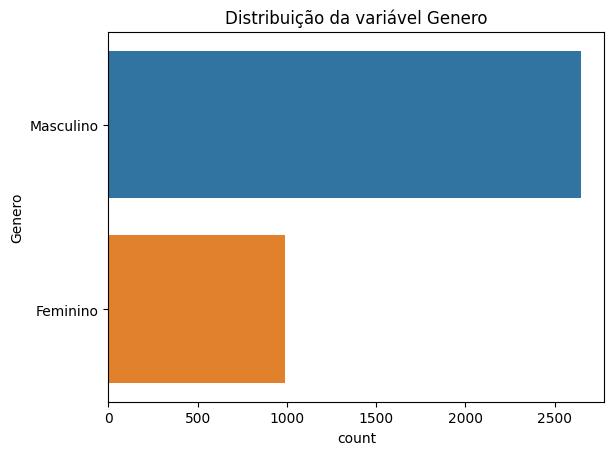

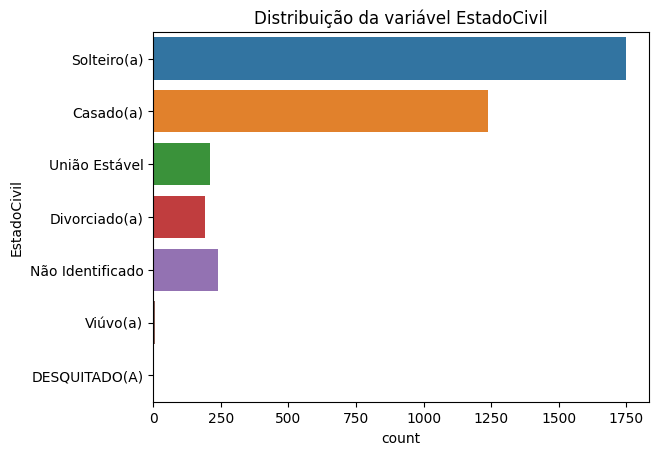

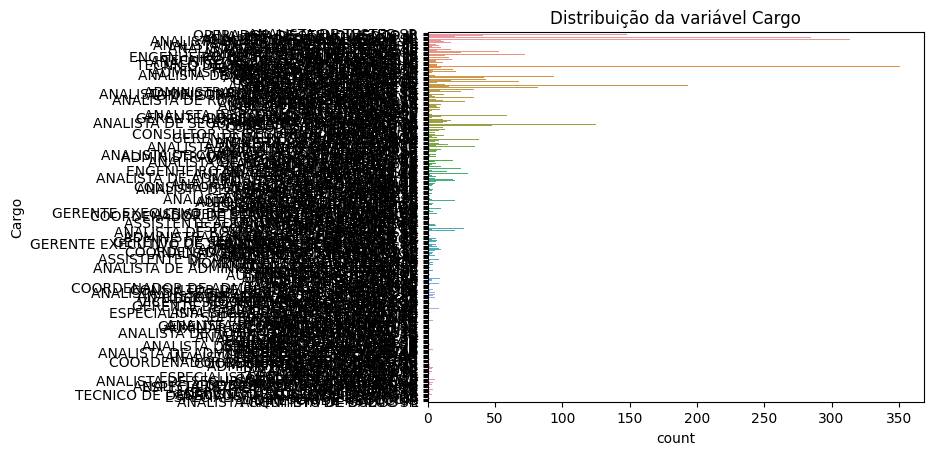

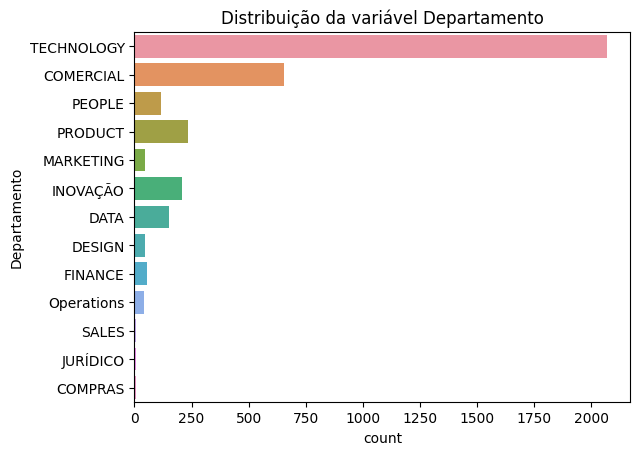

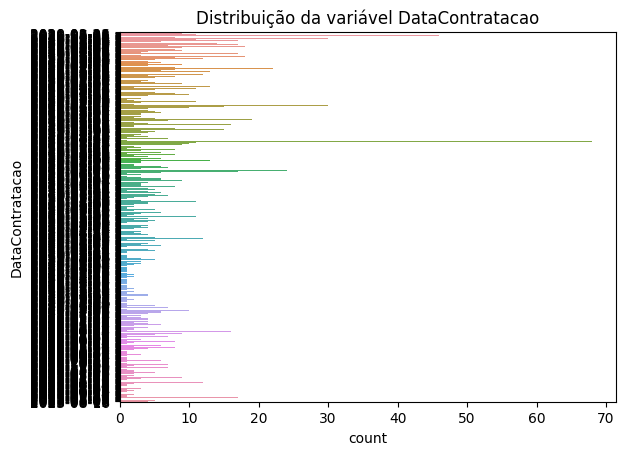

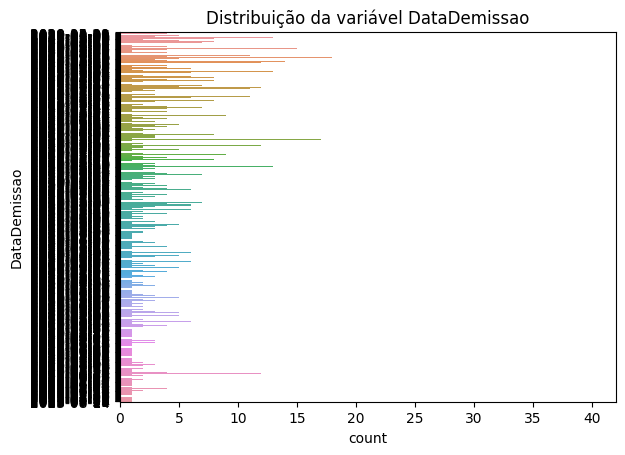

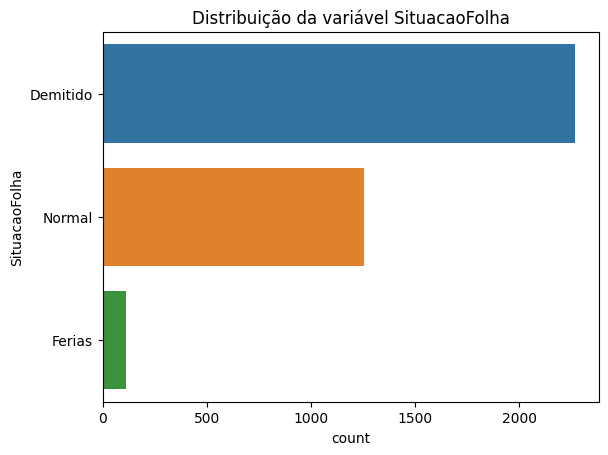

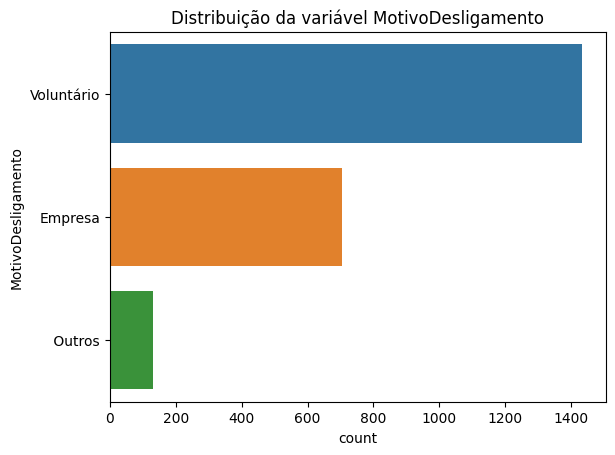

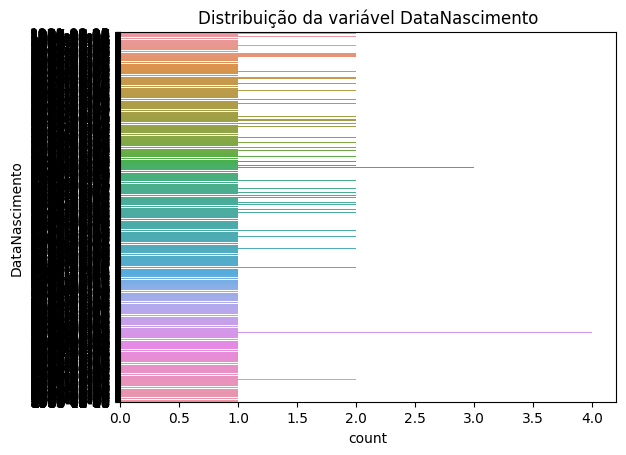

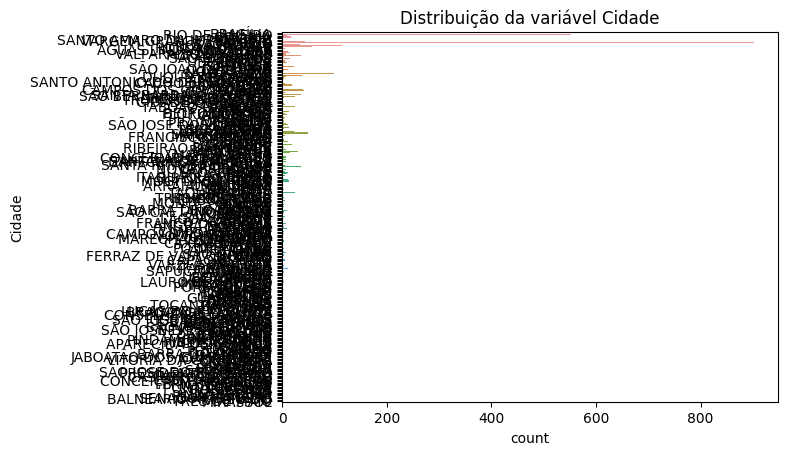

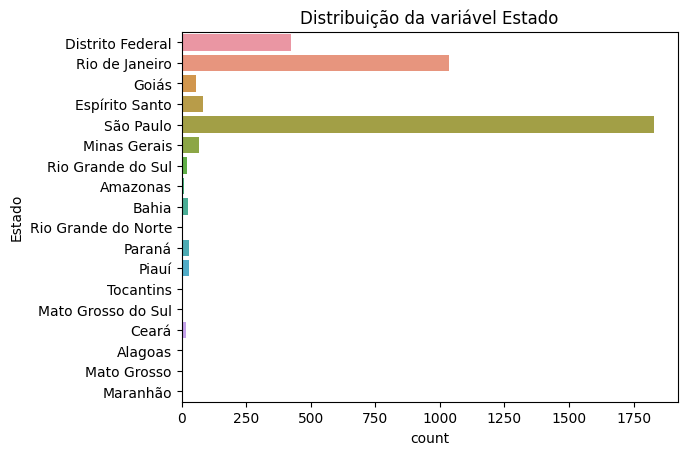

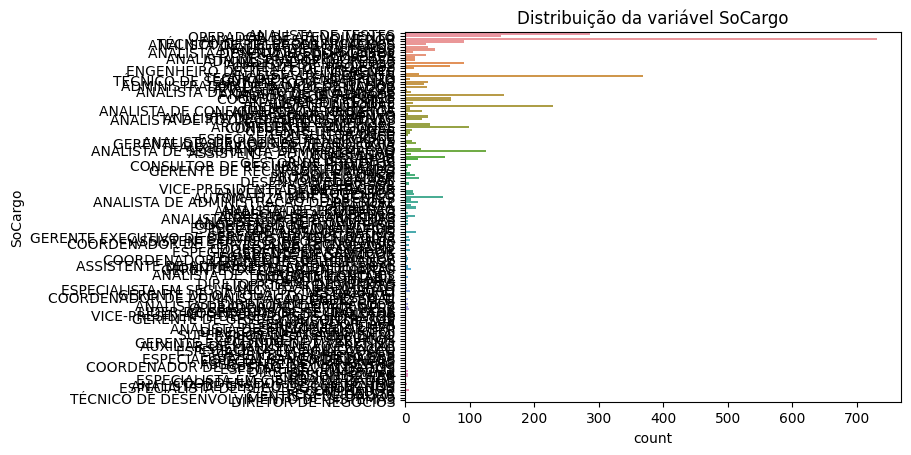

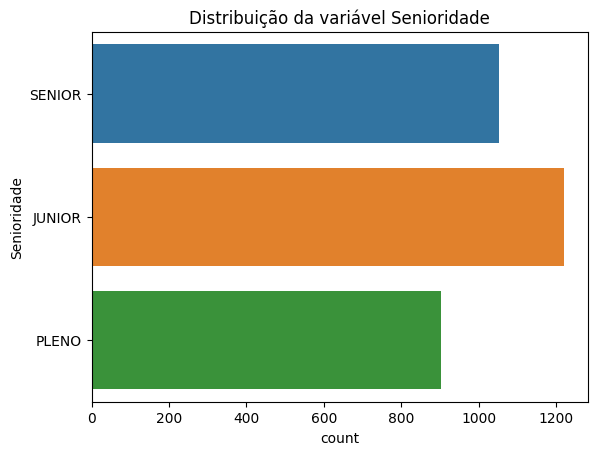

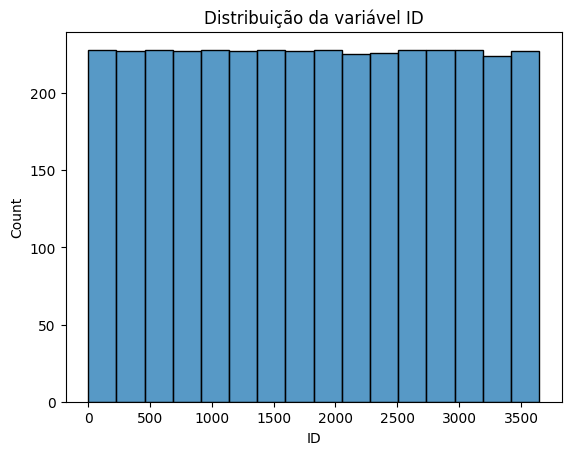

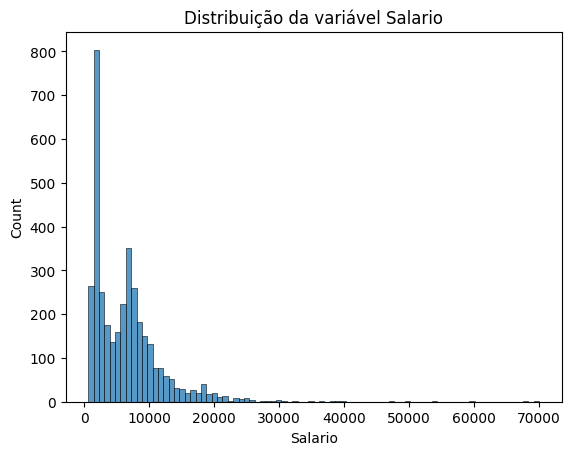

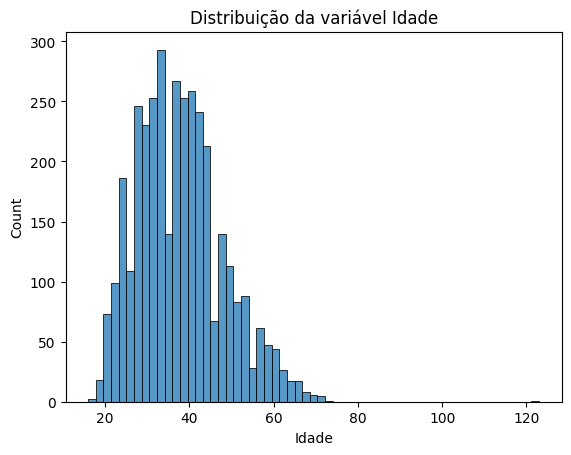

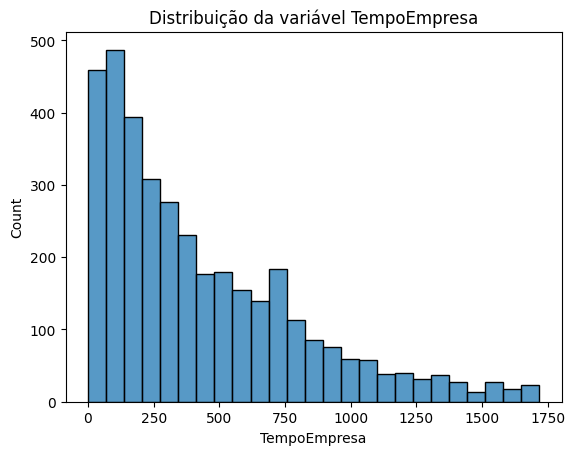

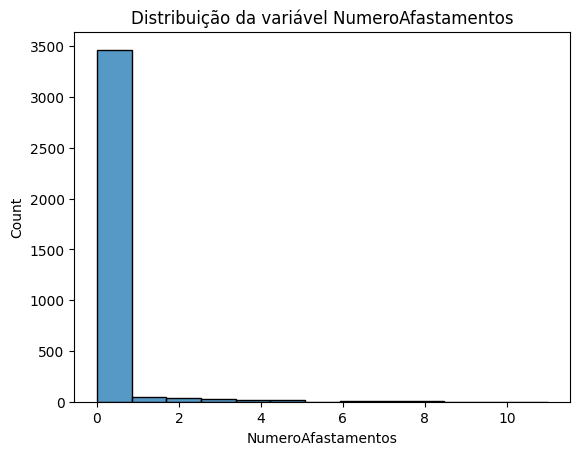

In [127]:
# Análise demográfica dos colaboradores

# Variáveis categóricas:

for coluna in colaboradores.select_dtypes(include=['object', 'category']).columns:
  plt.figure()
  sns.countplot(data=colaboradores, y=coluna)
  plt.title(f'Distribuição da variável {coluna}')
  plt.show()

# Variáveis numéricas
for coluna in colaboradores.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.histplot(colaboradores[coluna])
    plt.title(f'Distribuição da variável {coluna}')
    plt.show()

Após uma rápida análise da base de colaboradores, foi possível observar as seguintes características predominantes:

- **Gênero**: O número de mulheres é menos da metade do número de homens presentes na base.
  
- **Estado Civil**: Há uma maior quantidade de colaboradores solteiros em comparação com os casados.

- **Departamento**: A maioria dos colaboradores está alocada no departamento de Technology.

- **Status de Emprego**: A maior parte da base de dados é composta por funcionários que foram demitidos.

- **Tipo de Desligamento**: Quase o dobro dos desligamentos aconteceu por iniciativa dos próprios colaboradores, em contraste com desligamentos iniciados pela empresa.

- **Localização**: A maioria dos colaboradores reside em São Paulo e no Rio de Janeiro.

- **Salário**: A distribuição salarial mostra que a maioria ganha até 10 mil. No entanto, existe uma parcela de colaboradores com salários entre 10 e 20 mil a ser considerada.

- **Senioridade**: A base é bem distribuída entre os níveis de senioridade Júnior, Pleno e Sênior, com leve predominância de Júniors.

- **Idade**: A maior parte dos funcionários têm entre 20 e 60 anos, com alguns sendo mais velhos do que isso.

- **Tempo de Empresa**: A maior parte dos funcionários tem menos de 2 anos de empresa (730 dias), o que pode indicar alta taxa de turnover.

- **Número de Afastamentos**: A maior parte tem entre 0 e 1 afastamentos na base. Mas há aqueles com muito mais.

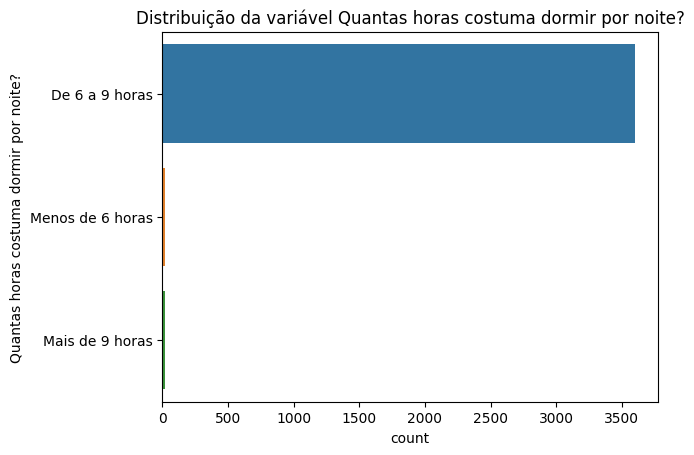

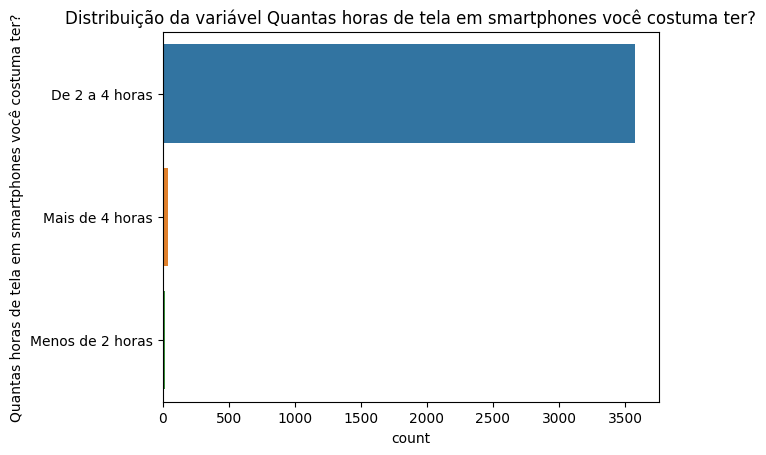

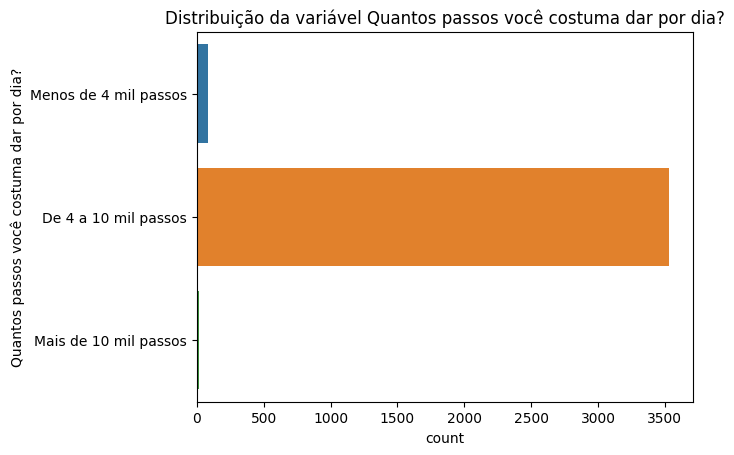

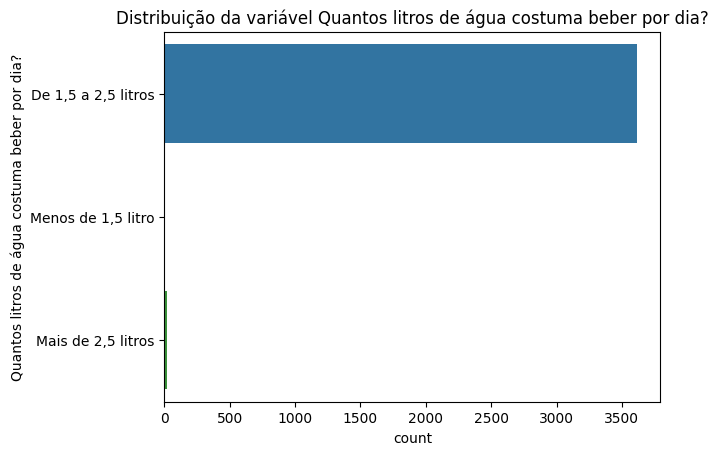

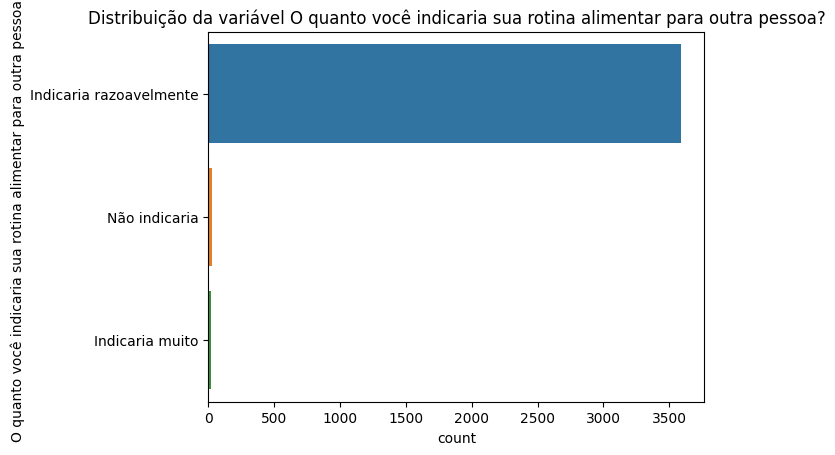

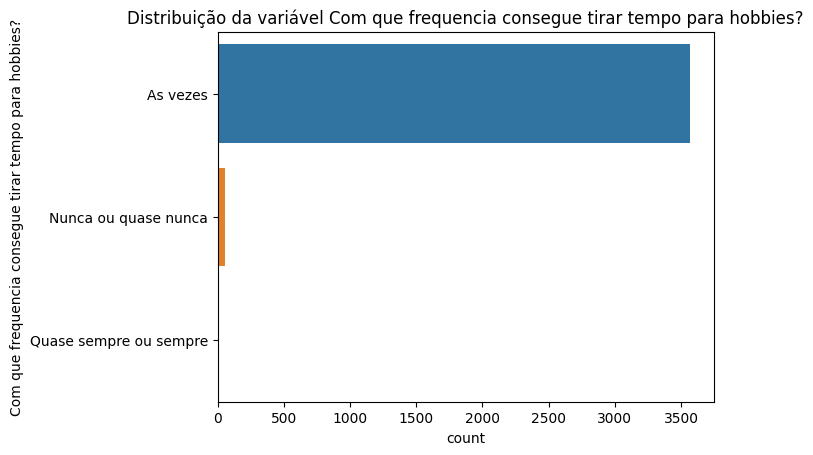

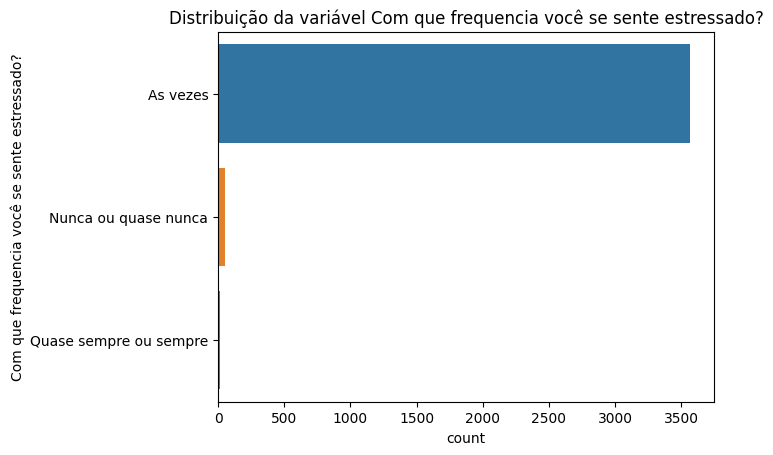

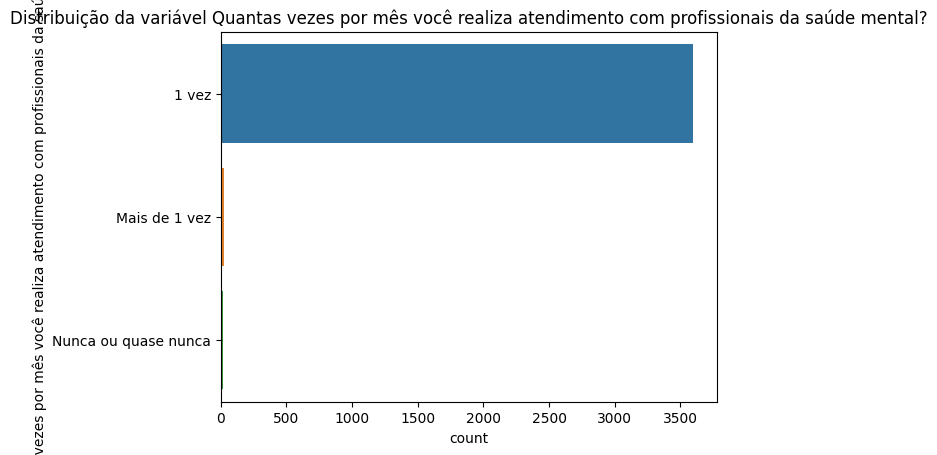

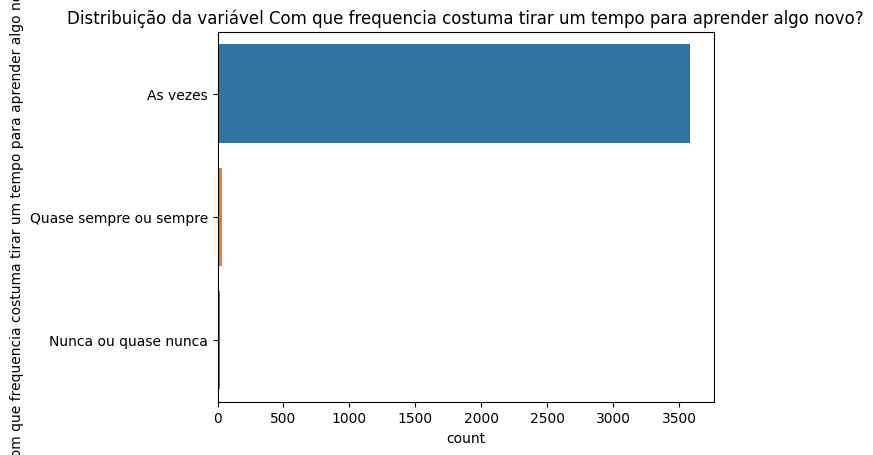

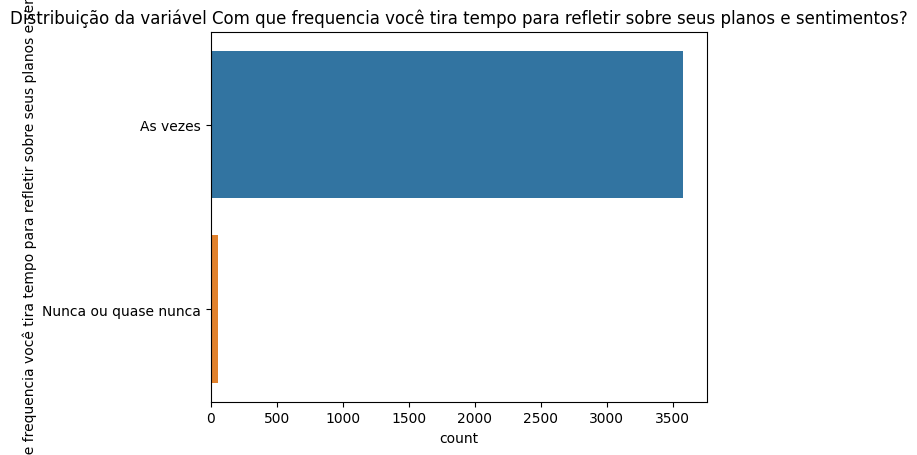

In [128]:
# Hábitos

# Variáveis categóricas:

for coluna in habitos.select_dtypes(include=['object', 'category']).columns:
  plt.figure()
  sns.countplot(data=habitos, y=coluna)
  plt.title(f'Distribuição da variável {coluna}')
  plt.show()

Após uma análise rápida da base de hábitos dos colaboradores, podemos observar que:

- Quase todos **dormem entre 6 e 9 horas**
- Quase todos **passam entre 2 e 4 horas em seus smartphones**
- Quase todos **caminham entre 4k e 10k passos por dia**
- Quase todos **bebem de 1,5 a 2,5 litros de água por dia**
- **A maioria indicaria razoavelmente sua rotina alimentar** a outros
- Na maior parte do tempo, **conseguem dedicar momentos para seus hobbies**
- **Frequentemente se sentem estressados**
- Quase todos **realizam atendimento com profissionais de saúde mental uma vez por mês**
- Reservam algum **tempo para aprender algo novo ocasionalmente**
- **Ocasionalmente param para refletir** sobre seus planos e sentimentos

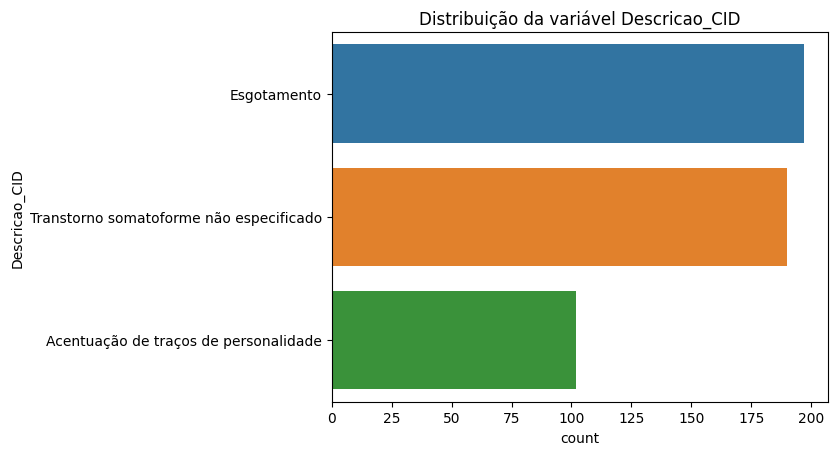

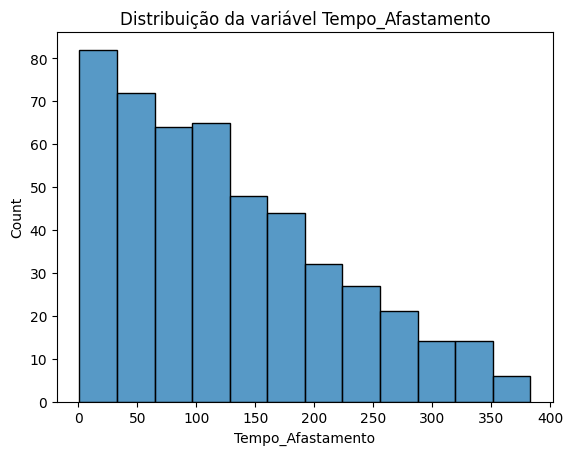

In [129]:
# Afastamentoa

# Variáveis categóricas:

# Descrição do CID
plt.figure()
sns.countplot(data=afastamentos, y='Descricao_CID')
plt.title('Distribuição da variável Descricao_CID')
plt.show()

# Tempo_Afastamento
plt.figure()
sns.histplot(afastamentos['Tempo_Afastamento'])
plt.title(f'Distribuição da variável Tempo_Afastamento')
plt.show()

Após análise inicial da base de afastamentos (ou pelo menos da amostragem de afastamentos coerentes após limpeza), foi possível observar que:

- **Descrição**: Boa parte se afasta ou por esgotamento ou transtorno somatoforme não especificado.

- **Tempo de Afastamento**: Afastamentos variam em duração (podendo chegar até a um ano), mas a maioria fica até 4 meses afastados.



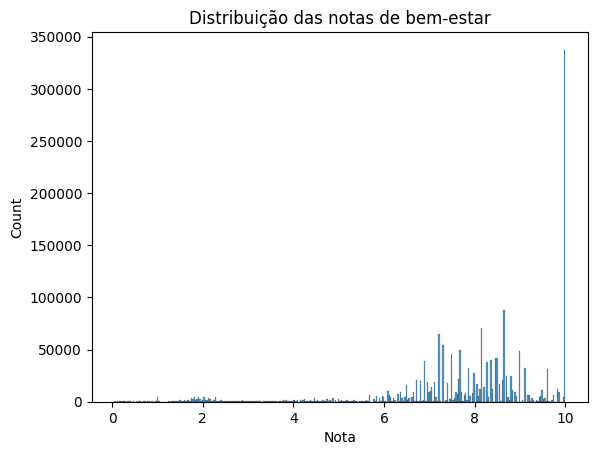

In [130]:
# Respostas
# Distribuição das notas
plt.figure()
sns.histplot(respostas["Nota"])
plt.title('Distribuição das notas de bem-estar')
plt.show()

Boa parte das notas fica entre 6 e 10, com ênfase especial pro número de respostas que especificamente são 10.

A partir da análise incial, os principais questionamentos quanto ao bem-estar e absenteísmo a serem respondidos são:

- **Bem-estar**:
  - Como a percepção de bem-estar tem variado ao longo do tempo na empresa?
  - Há relação entre bem-estar e outras variáveis como gênero, departamento, senioridade e tempo de empresa?

- **Absenteísmo**:
  - Como percepçõses de bem-estar se relacionam com o absenteísmo?
  - Há relação entre absenteísmo com outros fatores?
  - O que justificaria a maior parte dos desligamentos serem voluntários?
  - Qual o impacto financeiro nessa empresa?
  - Uma vez que reduzi bastante o tamanho dos dados de afastamento (supondo que o número real seja maior do que a amostra que agora tenho), o quão confiante posso estar que as conclusões são verdadeiras?

#### Análise de Bem-Estar

Vou começar fazendo uma análise da percepção de bem-estar ao longo do tempo

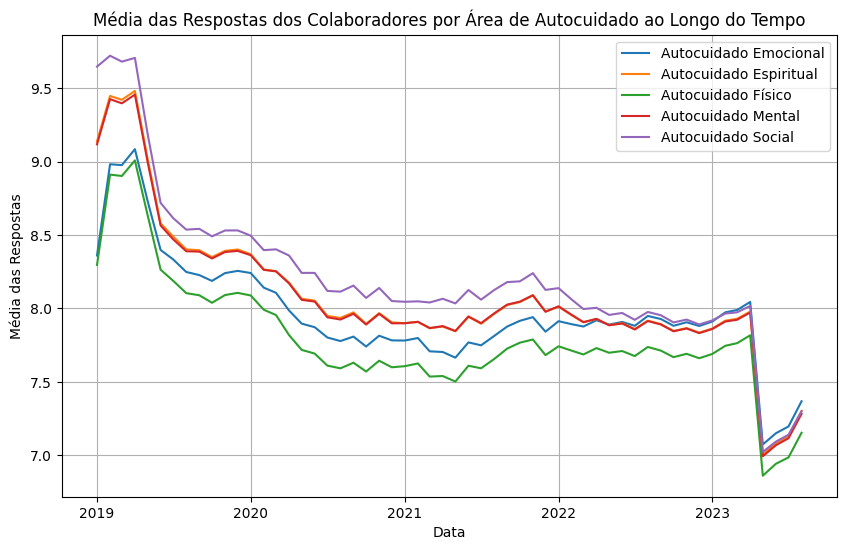

In [131]:
# Média das repostas dos colaboradores por área do autocuidado ao longo do tempo

# Unindo perguntas e respostas numa variável bem-estar
bem_estar = pd.merge(respostas, perguntas, left_on="IdPergunta", right_on="ID")

# Agrupando por nota média por área de autocuidado
agrupamento = bem_estar.groupby(["DT", "Categoria"])["Nota"].mean().reset_index()

# Criando um gráfico de linha para mostrar a média das respostas ao longo do tempo
plt.figure(figsize=(10,6))
for area in agrupamento['Categoria'].unique():
    area_data = agrupamento[agrupamento['Categoria'] == area]
    plt.plot(area_data['DT'], area_data['Nota'], label=area)

# Adicionando rótulos e uma legenda
plt.xlabel('Data')
plt.ylabel('Média das Respostas')
plt.legend()
plt.title('Média das Respostas dos Colaboradores por Área de Autocuidado ao Longo do Tempo')
plt.grid(True)

# Mostrando o gráfico
plt.show()

Ao longo do tempo, a percepção de bem-estar dos colaboradores tem indicado **piora em todas as áreas do autocuidado.** Também é interessante notar que o autocuidado físico tem sido o menor ranqueado entre todos os autocuidados.

Agora prosseguirei para análise de fatores correlacionados com a percepção de bem-estar.

In [132]:
# Criando uma variável para a média de bem-estar por categoria
bem_estar_categoria = bem_estar.groupby(["ID_x", "Categoria"])["Nota"].mean().reset_index()

# Rotacionando bem_estar_categoria para que cada coluna se torne uma coluna populada por uma nota
bem_estar_categoria = bem_estar_categoria.pivot(index='ID_x', columns='Categoria', values='Nota')

# Resetando o índice
bem_estar_categoria.reset_index(inplace=True)

# Renomeando o nome das colunas
bem_estar_categoria.columns = ['ID', 'MediaEmocional', 'MediaEspiritual', 'MediaFisico', 'MediaMental', 'MediaSocial']

# Mostrando o resultado
bem_estar_categoria

ID  MediaEmocional  MediaEspiritual  MediaFisico  MediaMental  \
0        1        2.296800         5.115600     2.218500     5.133000   
1        2        2.194500         4.704700     2.244000     4.866400   
2        3        2.046000         4.557000     1.976250     4.572500   
3        4        1.833500         3.930767     1.874857     4.065867   
4        5        1.906909         4.088145     1.949922     4.228655   
...    ...             ...              ...          ...          ...   
3629  3642        9.748571         9.685714     9.371429     9.577143   
3630  3643        9.748571         9.685714     9.371429     9.577143   
3631  3644        9.857143         9.834286     9.942857     9.782857   
3632  3645        9.857143         9.834286     9.942857     9.782857   
3633  3646        9.857143         9.834286     9.942857     9.782857   

      MediaSocial  
0        7.196143  
1        6.457000  
2        6.410357  
3        5.394810  
4        5.610805  
...           ...  
3629     9.537143  
3630     9.537143  
3631     9.657143  
3632     9.657143  
3633     9.657143  

[3634 rows x 6 columns]

In [133]:
# Repetindo o mesmo processo para o bem_estar_geral
bem_estar_geral = bem_estar.groupby("ID_x")["Nota"].mean().reset_index()

# Renomeando as colunas
bem_estar_geral.columns = ["ID", "MediaBemEstar"]

# Mostrando o resultado
bem_estar_geral


ID  MediaBemEstar
0        1       4.392009
1        2       4.093320
2        3       3.912421
3        4       3.419960
4        5       3.556887
...    ...            ...
3629  3642       9.584000
3630  3643       9.584000
3631  3644       9.814857
3632  3645       9.814857
3633  3646       9.814857

[3634 rows x 2 columns]

Com ambas as tabelas prontas, posso unir a colaboradores para analisar correlações

In [134]:
# Unindo colaboradores e bem_estar_geral
colaboradores = pd.merge(colaboradores, bem_estar_geral, on='ID')

# Unindo colaboradores e bem_estar_categoria
colaboradores = pd.merge(colaboradores, bem_estar_categoria, on='ID')

# Mostrando o resultado
colaboradores

ID     Genero    EstadoCivil                       Cargo Departamento  \
0        1  Masculino    Solteiro(a)       ANALISTA DE TESTES SR   TECHNOLOGY   
1        2  Masculino      Casado(a)  OPERADOR DE ATENDIMENTO JR    COMERCIAL   
2        3  Masculino    Solteiro(a)  ANALISTA DESENVOLVEDOR III   TECHNOLOGY   
3        4  Masculino      Casado(a)       TECNICO DE TELECOM PL    COMERCIAL   
4        5  Masculino      Casado(a)   ANALISTA DESENVOLVEDOR SR   TECHNOLOGY   
...    ...        ...            ...                         ...          ...   
3629  3642   Feminino    Solteiro(a)    ANALISTA UX/UI DESIGN SR       DESIGN   
3630  3643   Feminino      Casado(a)       ANALISTA DE TESTES SR   TECHNOLOGY   
3631  3644  Masculino  Divorciado(a)   ANALISTA DESENVOLVEDOR SR   TECHNOLOGY   
3632  3645   Feminino      Casado(a)       ANALISTA DE TESTES SR   TECHNOLOGY   
3633  3646  Masculino    Solteiro(a)   ANALISTA DESENVOLVEDOR SR   TECHNOLOGY   

     DataContratacao DataDemissao SituacaoFolha MotivoDesligamento  \
0         2020-08-06   2020-12-01      Demitido         Voluntário   
1         2020-01-21   2020-05-20      Demitido            Empresa   
2         2021-07-05   2022-04-22      Demitido         Voluntário   
3         2021-09-13          NaT        Normal                NaN   
4         2019-01-21   2019-11-01      Demitido            Empresa   
...              ...          ...           ...                ...   
3629      2023-08-21          NaT        Normal                NaN   
3630      2023-08-21          NaT        Normal                NaN   
3631      2023-08-21          NaT        Normal                NaN   
3632      2023-08-21          NaT        Normal                NaN   
3633      2023-08-21          NaT        Normal                NaN   

     DataNascimento  Salario          Cidade            Estado  \
0        1981-08-05  6000.00        BRASÍLIA  Distrito Federal   
1        1967-07-21  1300.00  RIO DE JANEIRO    Rio de Janeiro   
2        1986-09-26  7000.00         GOIANIA             Goiás   
3        1970-10-18  2060.64         VITÓRIA    Espírito Santo   
4        1971-01-26  6422.09  RIO DE JANEIRO    Rio de Janeiro   
...             ...      ...             ...               ...   
3629     1994-02-03  7000.00        CURITIBA            Paraná   
3630     1993-12-03  8500.00         CAJAMAR         São Paulo   
3631     1980-03-04  9000.00        MIRASSOL         São Paulo   
3632     1980-05-10  9000.00         BARUERI         São Paulo   
3633     1986-03-05  9000.00        BRASÍLIA  Distrito Federal   

                          SoCargo Senioridade  Idade  TempoEmpresa  \
0              ANALISTA DE TESTES      SENIOR     42           117   
1         OPERADOR DE ATENDIMENTO      JUNIOR     56           120   
2          ANALISTA DESENVOLVEDOR      SENIOR     36           291   
3     TÉCNICO DE TELECOMUNICAÇÕES       PLENO     52           732   
4          ANALISTA DESENVOLVEDOR      SENIOR     52           284   
...                           ...         ...    ...           ...   
3629        ANALISTA UX/UI DESIGN      SENIOR     29            25   
3630           ANALISTA DE TESTES      SENIOR     29            25   
3631       ANALISTA DESENVOLVEDOR      SENIOR     43            25   
3632           ANALISTA DE TESTES      SENIOR     43            25   
3633       ANALISTA DESENVOLVEDOR      SENIOR     37            25   

      NumeroAfastamentos  MediaBemEstar  MediaEmocional  MediaEspiritual  \
0                      0       4.392009        2.296800         5.115600   
1                      0       4.093320        2.194500         4.704700   
2                      0       3.912421        2.046000         4.557000   
3                      2       3.419960        1.833500         3.930767   
4                      1       3.556887        1.906909         4.088145   
...                  ...            ...             ...              ...   
3629                   0    

O dataset parece bem melhor agora. Pronto para ser analisado com relação a correlações

In [135]:
# Separando colunas para a correlação
colunas_correlacao = ['Genero', 'EstadoCivil', 'Departamento', 'SituacaoFolha', 'MotivoDesligamento', 'Salario',
                      'Estado', 'Senioridade', 'Idade', 'TempoEmpresa', 'NumeroAfastamentos', 'MediaBemEstar',
                      'MediaEmocional', 'MediaEspiritual', 'MediaFisico', 'MediaMental', 'MediaSocial']

# Transformando variáveis categóricas em dummies
colaboradores_correlacao = pd.get_dummies(colaboradores[colunas_correlacao])

# Obtendo as correlações
colaboradores_correlacao = colaboradores_correlacao.corr()

# Validando a operação e observando o número de linhas x número de colunas
colaboradores_correlacao.shape

(59, 59)

Como obtive quase 60 valores correlacionados, ao analisar relacioanentos específicos, como o com a Média de Bem Estar, seria interessante dividir entre talvez os 10 fatores mais correlacionados - seja positiva ou negativamente. Vou fazer isso mais abaixo com algumas colunas de bem-estar.

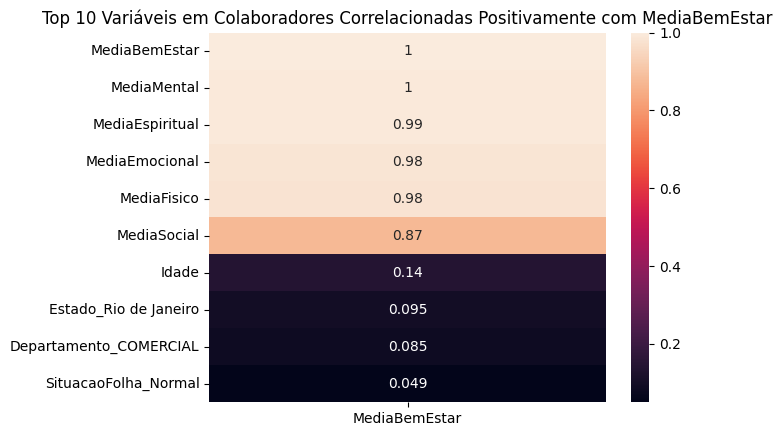

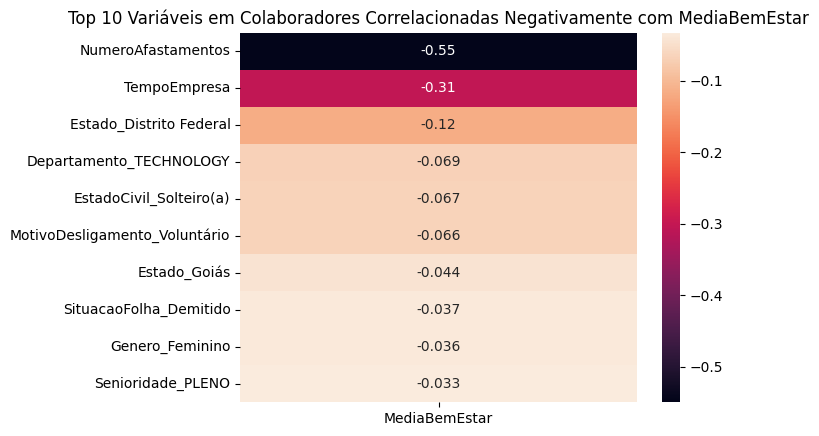

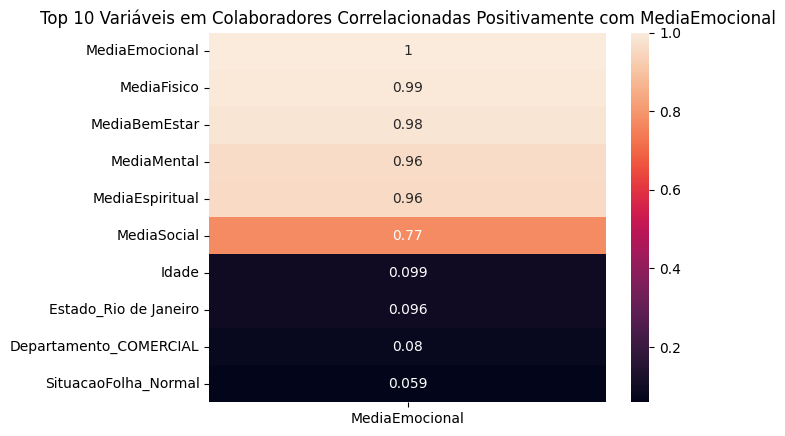

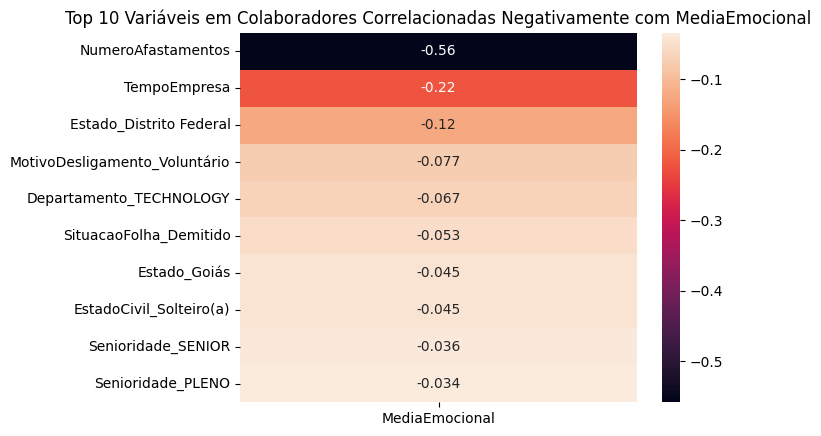

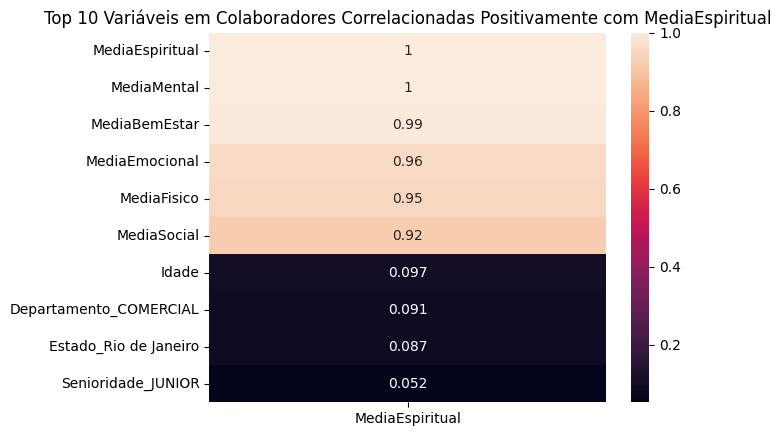

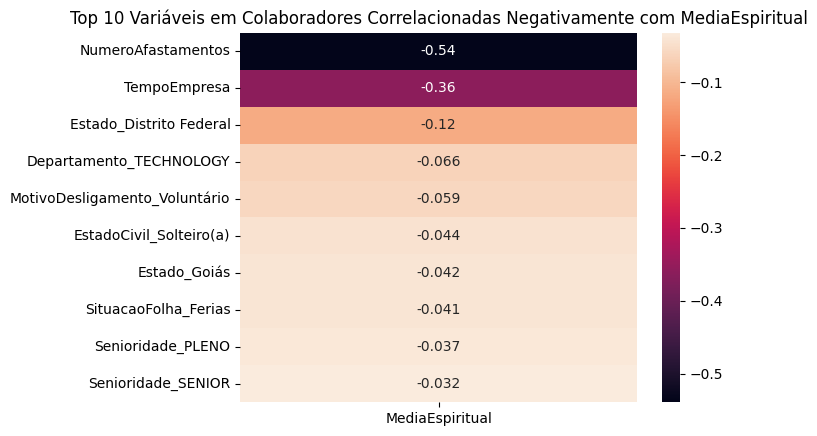

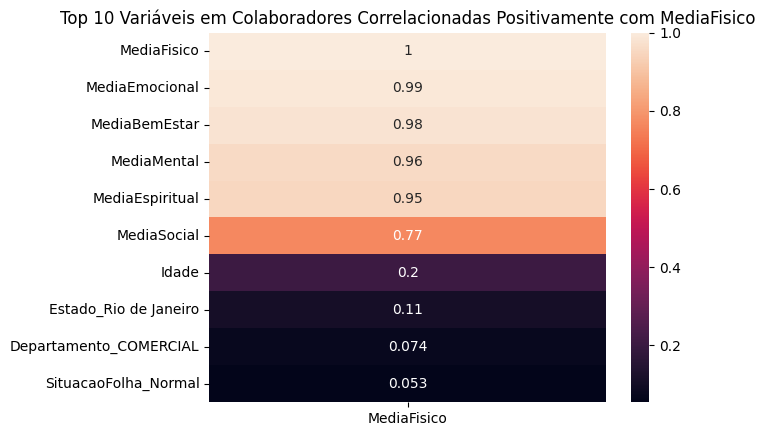

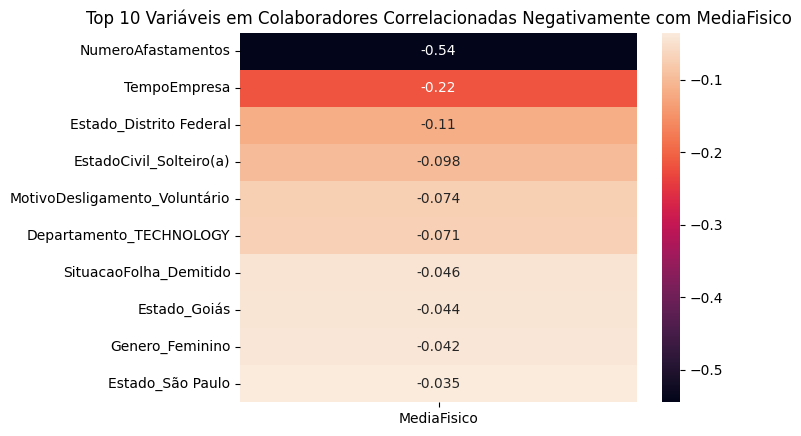

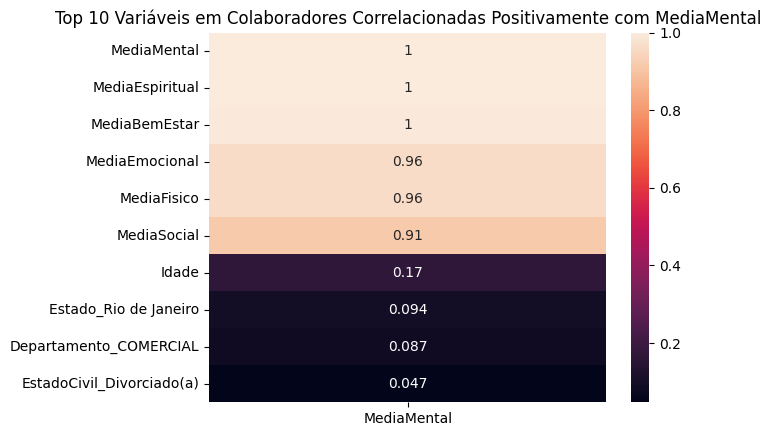

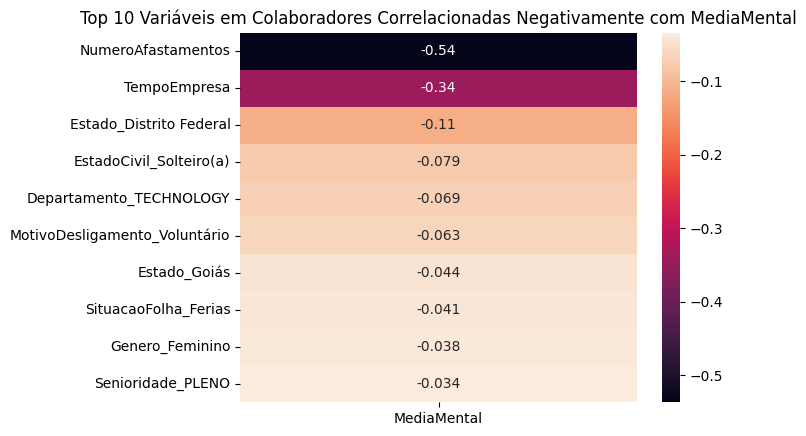

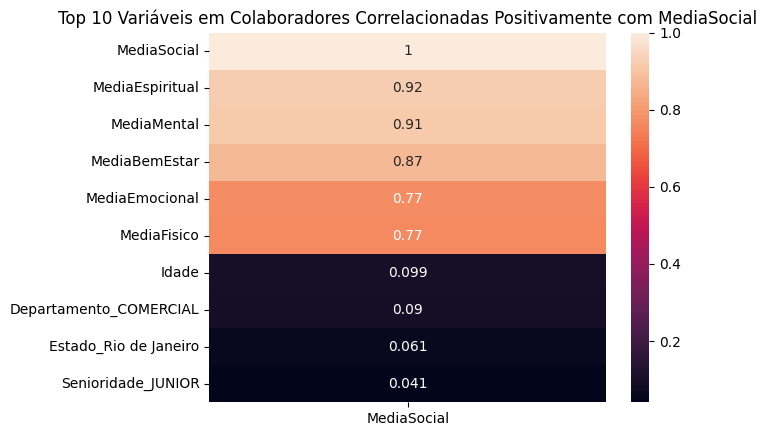

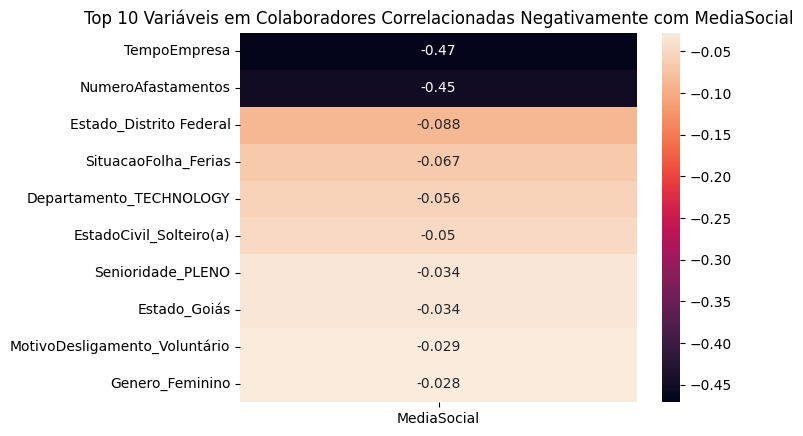

In [136]:
# Criando uma coluna de bem-estar
colunas_bem_estar = ['MediaBemEstar', 'MediaEmocional', 'MediaEspiritual', 'MediaFisico',
                     'MediaMental', 'MediaSocial']

# Criando heatmaps para cada coluna
for coluna in colunas_bem_estar:
  # Top 10 fatores positivos
  sns.heatmap(colaboradores_correlacao[coluna].sort_values(ascending=False)[:10].to_frame(), annot=True)
  plt.title(f'Top 10 Variáveis em Colaboradores Correlacionadas Positivamente com {coluna}')
  plt.show()

  # Top 10 fatores negativos
  sns.heatmap(colaboradores_correlacao[coluna].sort_values()[:10].to_frame(), annot=True)
  plt.title(f'Top 10 Variáveis em Colaboradores Correlacionadas Negativamente com {coluna}')
  plt.show()

Para análise de todas as correlações, vou adotar os seguintes critérios:

| Intervalo de Valor de Correlação (absoluto) | Interpretação           |
|---------------------------------------------|-------------------------|
| 0.00 - 0.19                                 | Correlação muito fraca  |
| 0.20 - 0.39                                 | Correlação fraca        |
| 0.40 - 0.69                                 | Correlação moderada     |
| 0.70 - 0.89                                 | Correlação forte        |
| 0.90 - 1.00                                 | Correlação muito forte  |


Desse modo,

- O **número de afastamentos** possui **correlação negativa moderada** com todas as áreas de bem-estar.
- O **tempo de empresa** possui **correlação negativa fraca** com todas as áreas de bem-estar, com a excessão da área social, onde a correlação é **moderada**.

Além disso,
- Todas as **áreas de autocuidado** possuem uma **correlação positiva muito forte** entre si, na maior parte do tempo. Entretanto, por vezes o bem-estar social parece estar um pouco menos correlacionado com os demais.

#### Análise de Absenteísmo

Vou começar criando um dataframe de absenteísmo

In [137]:
# Criando um dataframe de absenteísmo
absenteismo = afastamentos.groupby(['Id_Colaborador', 'Descricao_CID'])['Tempo_Afastamento'].sum().reset_index()

# Rotacionando a tabela
absenteismo = absenteismo.pivot(index='Id_Colaborador', columns='Descricao_CID', values='Tempo_Afastamento')

# Renomeando colunas
absenteismo.columns = ['Acentuacao_Tracos_Personalidade', 'Esgotamento', 'Transtorno_Somatoforme_N_Especificado']

# Resetando os índices
absenteismo.reset_index(inplace=True)

# Preenchendo NaNs
absenteismo.fillna(0, inplace=True)

# Verificando os resultados/transformações
absenteismo

Id_Colaborador  Acentuacao_Tracos_Personalidade  Esgotamento  \
0                 4                             65.0         90.0   
1                 5                              0.0          0.0   
2                 7                            345.0          0.0   
3                 9                              0.0         12.0   
4                10                            317.0        147.0   
..              ...                              ...          ...   
163            2478                              0.0        160.0   
164            2484                              0.0          0.0   
165            2485                              0.0         73.0   
166            2490                              0.0         52.0   
167            2491                              0.0        207.0   

     Transtorno_Somatoforme_N_Especificado  
0                                      0.0  
1                                     41.0  
2                                      0.0  
3                                    147.0  
4                                      0.0  
..                                     ...  
163                                  162.0  
164                                   90.0  
165                                  164.0  
166                                  474.0  
167                                   77.0  

[168 rows x 4 columns]

Agora vou uni-lo com a tabela colaboradores

In [138]:
# Unindo a tabela colaboradores com a tabela absenteísmo
colaboradores = pd.merge(colaboradores, absenteismo, left_on='ID', right_on='Id_Colaborador', how='left')

# Removendo a coluna Id_Colaborador
colaboradores.drop(columns='Id_Colaborador', inplace=True)

# Corrigindo NaNs
colaboradores['Acentuacao_Tracos_Personalidade'].fillna(0, inplace=True)
colaboradores['Esgotamento'].fillna(0, inplace=True)
colaboradores['Transtorno_Somatoforme_N_Especificado'].fillna(0, inplace=True)

# Transformando em inteiros
colaboradores['Acentuacao_Tracos_Personalidade'] = pd.to_numeric(colaboradores['Acentuacao_Tracos_Personalidade']).astype('int')
colaboradores['Esgotamento'] = pd.to_numeric(colaboradores['Esgotamento']).astype('int')
colaboradores['Transtorno_Somatoforme_N_Especificado'] = pd.to_numeric(colaboradores['Transtorno_Somatoforme_N_Especificado']).astype('int')

# Mostrando resultados
colaboradores

ID     Genero    EstadoCivil                       Cargo Departamento  \
0        1  Masculino    Solteiro(a)       ANALISTA DE TESTES SR   TECHNOLOGY   
1        2  Masculino      Casado(a)  OPERADOR DE ATENDIMENTO JR    COMERCIAL   
2        3  Masculino    Solteiro(a)  ANALISTA DESENVOLVEDOR III   TECHNOLOGY   
3        4  Masculino      Casado(a)       TECNICO DE TELECOM PL    COMERCIAL   
4        5  Masculino      Casado(a)   ANALISTA DESENVOLVEDOR SR   TECHNOLOGY   
...    ...        ...            ...                         ...          ...   
3629  3642   Feminino    Solteiro(a)    ANALISTA UX/UI DESIGN SR       DESIGN   
3630  3643   Feminino      Casado(a)       ANALISTA DE TESTES SR   TECHNOLOGY   
3631  3644  Masculino  Divorciado(a)   ANALISTA DESENVOLVEDOR SR   TECHNOLOGY   
3632  3645   Feminino      Casado(a)       ANALISTA DE TESTES SR   TECHNOLOGY   
3633  3646  Masculino    Solteiro(a)   ANALISTA DESENVOLVEDOR SR   TECHNOLOGY   

     DataContratacao DataDemissao SituacaoFolha MotivoDesligamento  \
0         2020-08-06   2020-12-01      Demitido         Voluntário   
1         2020-01-21   2020-05-20      Demitido            Empresa   
2         2021-07-05   2022-04-22      Demitido         Voluntário   
3         2021-09-13          NaT        Normal                NaN   
4         2019-01-21   2019-11-01      Demitido            Empresa   
...              ...          ...           ...                ...   
3629      2023-08-21          NaT        Normal                NaN   
3630      2023-08-21          NaT        Normal                NaN   
3631      2023-08-21          NaT        Normal                NaN   
3632      2023-08-21          NaT        Normal                NaN   
3633      2023-08-21          NaT        Normal                NaN   

     DataNascimento  Salario          Cidade            Estado  \
0        1981-08-05  6000.00        BRASÍLIA  Distrito Federal   
1        1967-07-21  1300.00  RIO DE JANEIRO    Rio de Janeiro   
2        1986-09-26  7000.00         GOIANIA             Goiás   
3        1970-10-18  2060.64         VITÓRIA    Espírito Santo   
4        1971-01-26  6422.09  RIO DE JANEIRO    Rio de Janeiro   
...             ...      ...             ...               ...   
3629     1994-02-03  7000.00        CURITIBA            Paraná   
3630     1993-12-03  8500.00         CAJAMAR         São Paulo   
3631     1980-03-04  9000.00        MIRASSOL         São Paulo   
3632     1980-05-10  9000.00         BARUERI         São Paulo   
3633     1986-03-05  9000.00        BRASÍLIA  Distrito Federal   

                          SoCargo Senioridade  Idade  TempoEmpresa  \
0              ANALISTA DE TESTES      SENIOR     42           117   
1         OPERADOR DE ATENDIMENTO      JUNIOR     56           120   
2          ANALISTA DESENVOLVEDOR      SENIOR     36           291   
3     TÉCNICO DE TELECOMUNICAÇÕES       PLENO     52           732   
4          ANALISTA DESENVOLVEDOR      SENIOR     52           284   
...                           ...         ...    ...           ...   
3629        ANALISTA UX/UI DESIGN      SENIOR     29            25   
3630           ANALISTA DE TESTES      SENIOR     29            25   
3631       ANALISTA DESENVOLVEDOR      SENIOR     43            25   
3632           ANALISTA DE TESTES      SENIOR     43            25   
3633       ANALISTA DESENVOLVEDOR      SENIOR     37            25   

      NumeroAfastamentos  MediaBemEstar  MediaEmocional  MediaEspiritual  \
0                      0       4.392009        2.296800         5.115600   
1                      0       4.093320        2.194500         4.704700   
2                      0       3.912421        2.046000         4.557000   
3                      2       3.419960        1.833500         3.930767   
4                      1       3.556887        1.906909         4.088145   
...                  ...            ...             ...              ...   
3629                   0    

Também vou criar uma coluna tempo de afastamentos para fazer parte da análise

In [139]:
# Criando a nova coluna
colaboradores['TempoAfastamento'] = colaboradores['Acentuacao_Tracos_Personalidade']	+ colaboradores['Esgotamento']	+ colaboradores['Transtorno_Somatoforme_N_Especificado']

# Mostrando os resultados
colaboradores['TempoAfastamento']

0         0
1         0
2         0
3       155
4        41
       ... 
3629      0
3630      0
3631      0
3632      0
3633      0
Name: TempoAfastamento, Length: 3634, dtype: int64

Pronto, agora posso refazer as correlações para fazer as análises:

In [140]:
# Separando colunas para a correlação
colunas_correlacao = ['Genero', 'EstadoCivil', 'Departamento', 'SituacaoFolha', 'MotivoDesligamento', 'Salario',
                      'Estado', 'Senioridade', 'Idade', 'TempoEmpresa', 'NumeroAfastamentos', 'MediaBemEstar',
                      'MediaEmocional', 'MediaEspiritual', 'MediaFisico', 'MediaMental', 'MediaSocial',
                      'Acentuacao_Tracos_Personalidade',	'Esgotamento',	'Transtorno_Somatoforme_N_Especificado',
                      'TempoAfastamento']

# Transformando variáveis categóricas em dummies
colaboradores_correlacao = pd.get_dummies(colaboradores[colunas_correlacao])

# Obtendo as correlações
colaboradores_correlacao = colaboradores_correlacao.corr()

# Validando a operação e observando o número de linhas x número de colunas
colaboradores_correlacao.shape

(63, 63)

Para minha análise de absenteísmo, vou analisar as seguintes colunas:

- SituacaoFolha_Demitido
- MotivoDesligamento_Voluntário
- NumeroAfastamentos
- Acentuacao_Tracos_Personalidade
- Esgotamento
- Transtorno_Somatoforme_N_Especificado
- TempoAfastamento

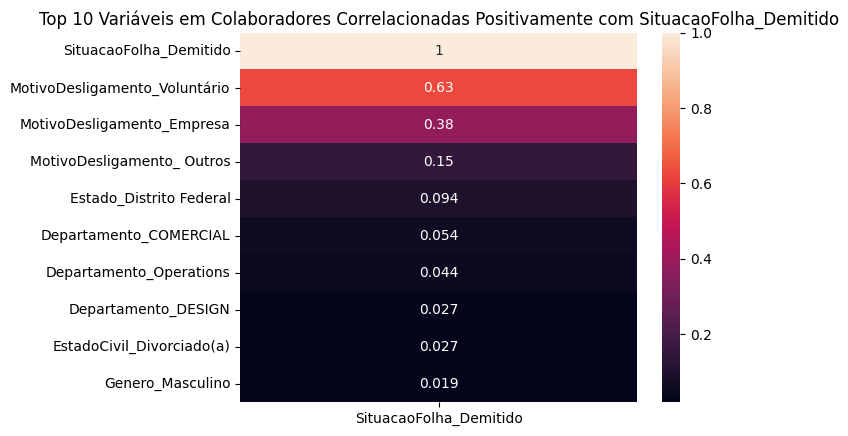

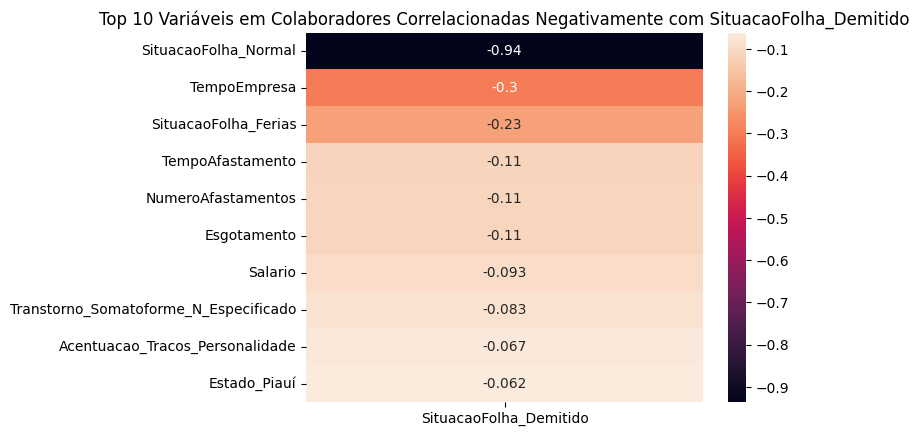

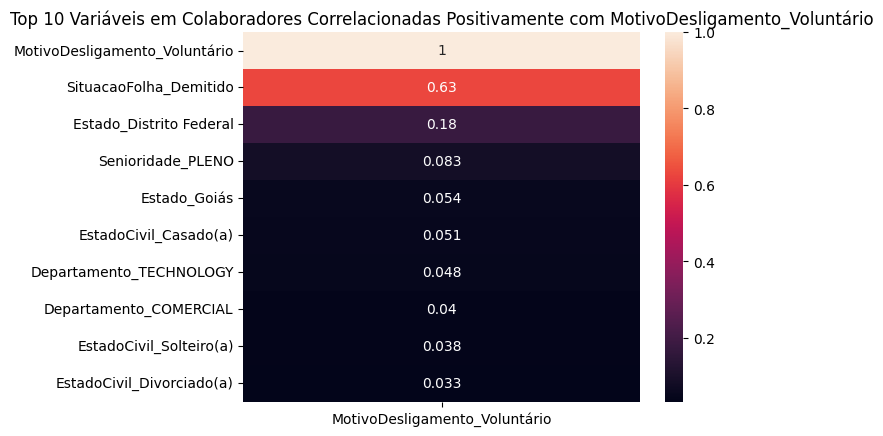

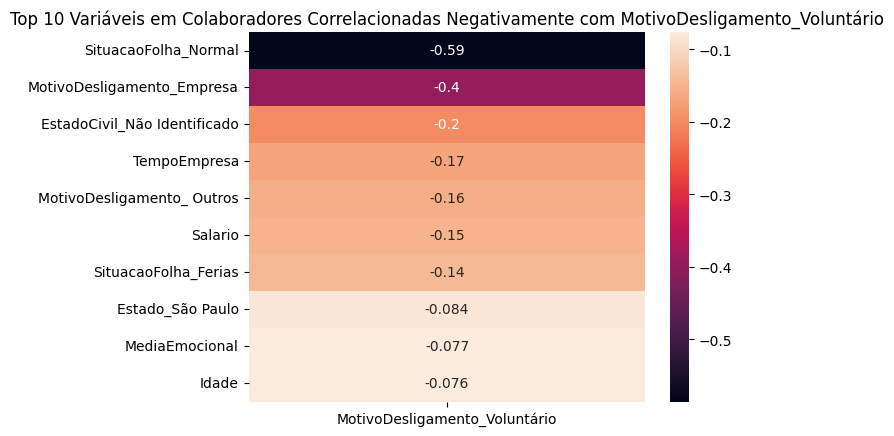

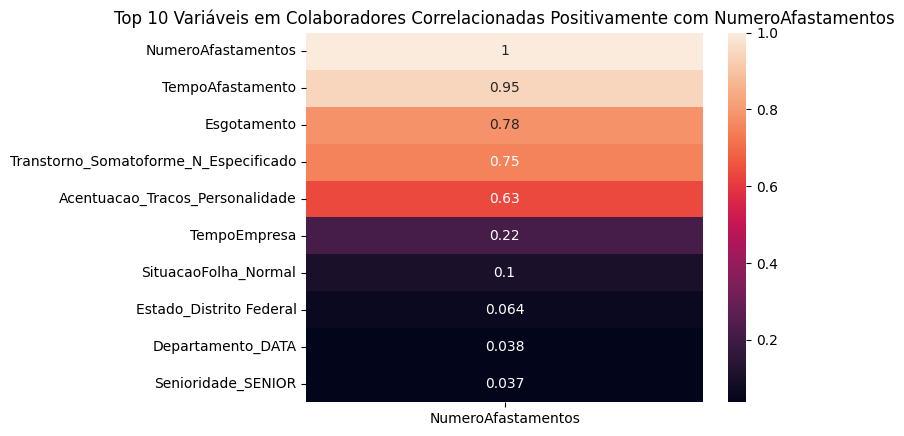

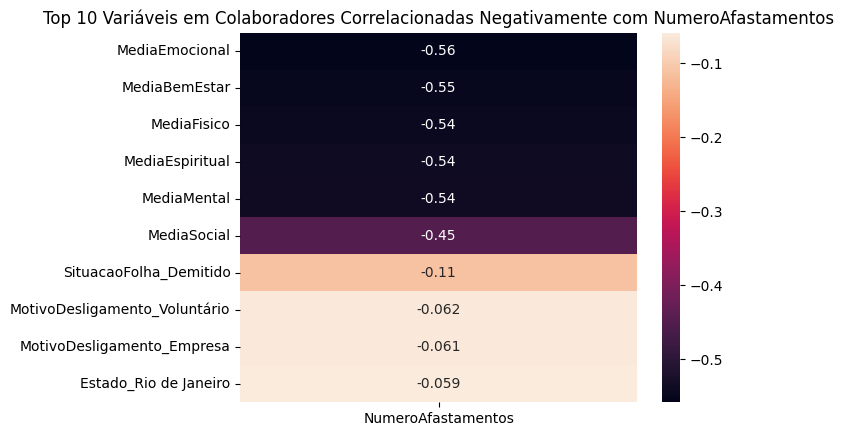

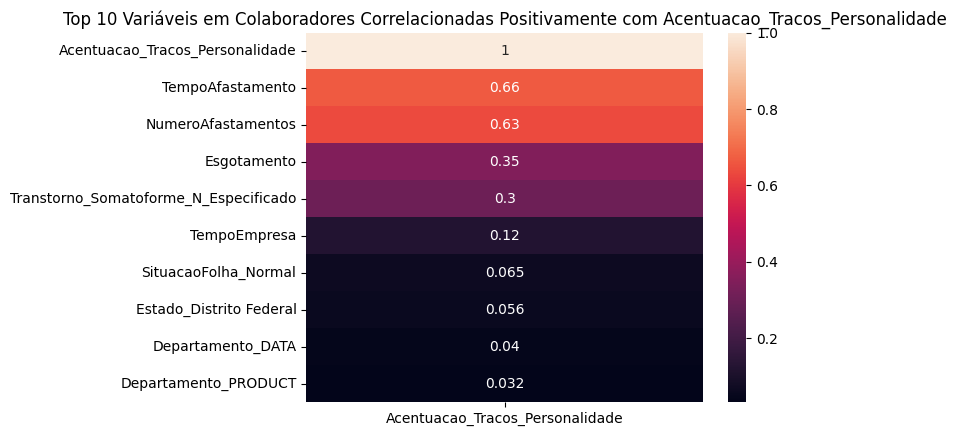

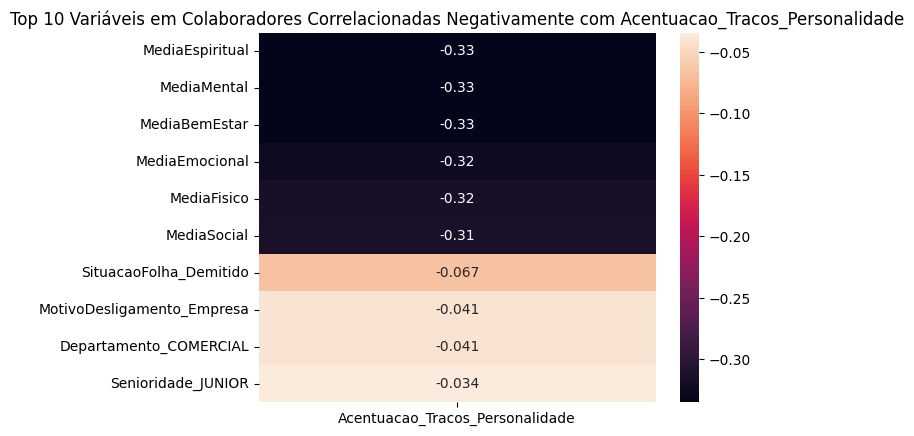

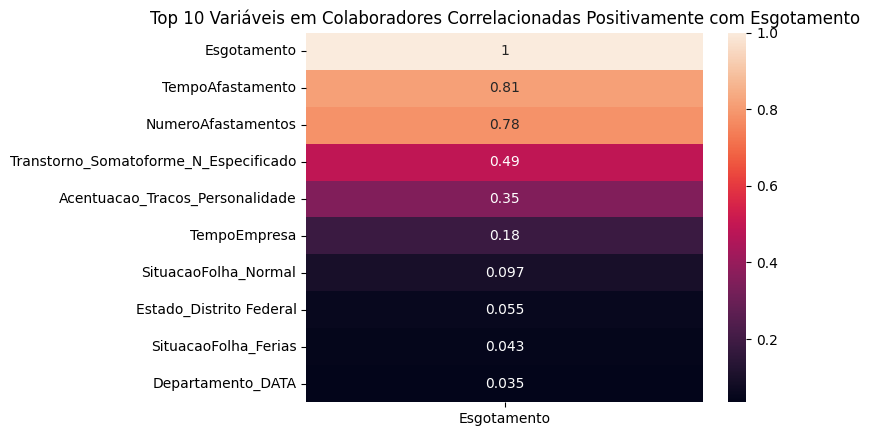

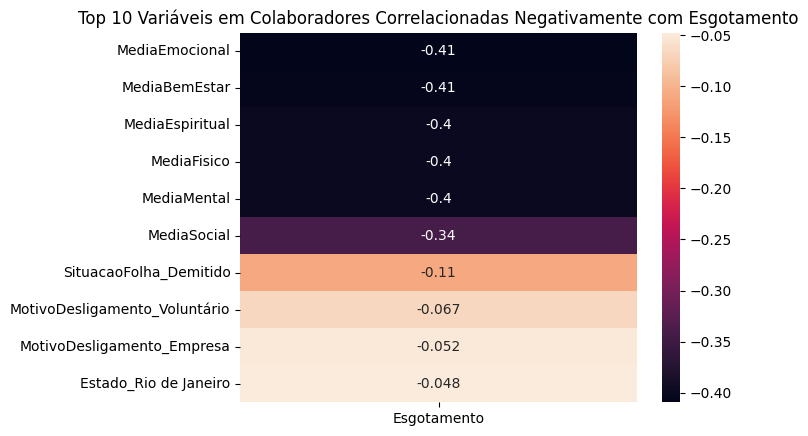

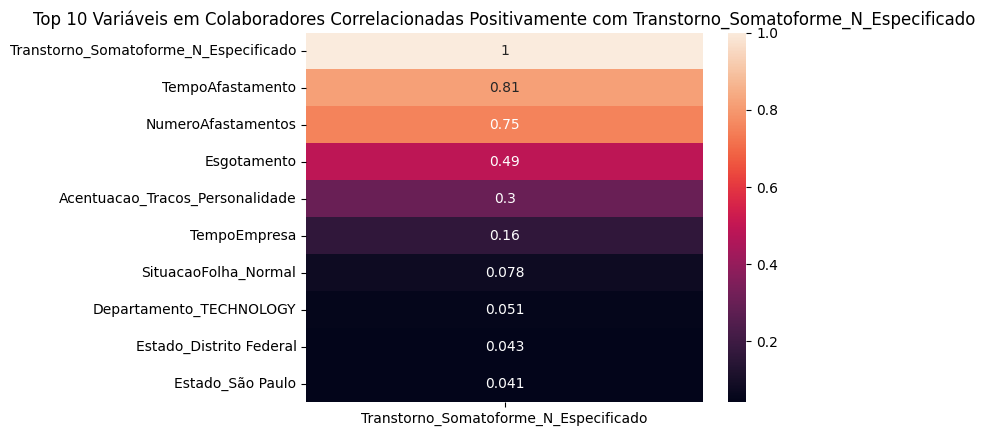

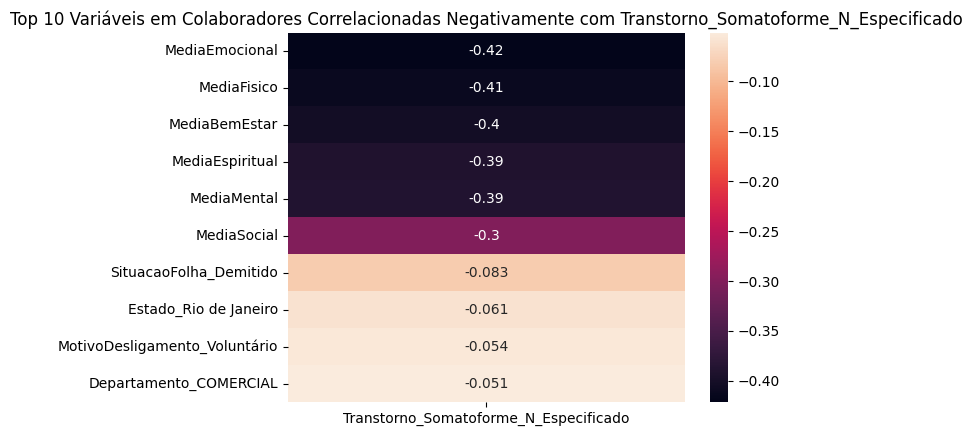

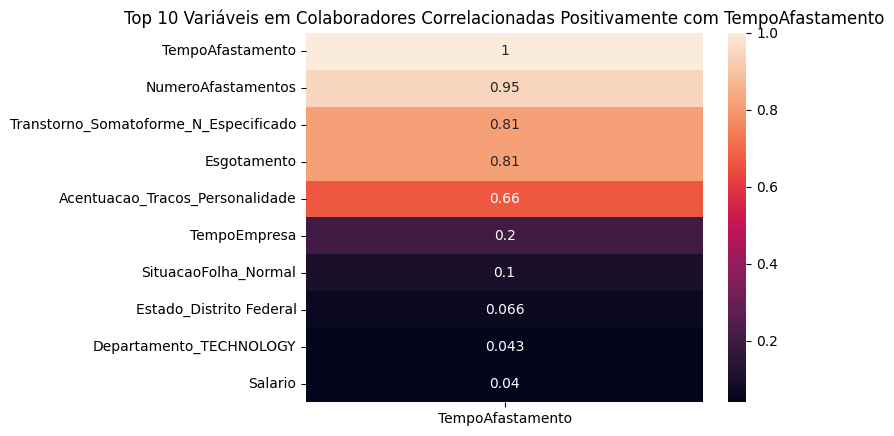

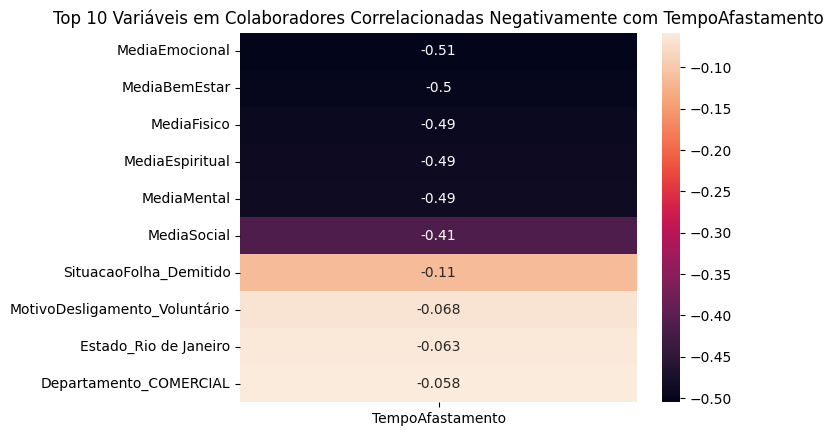

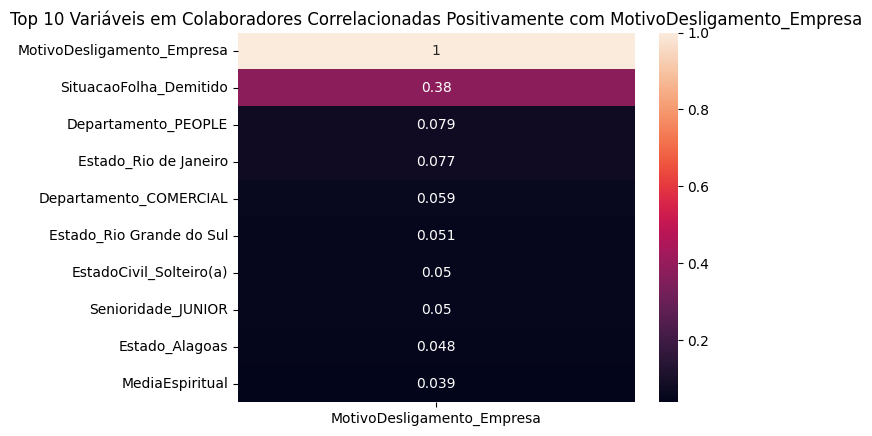

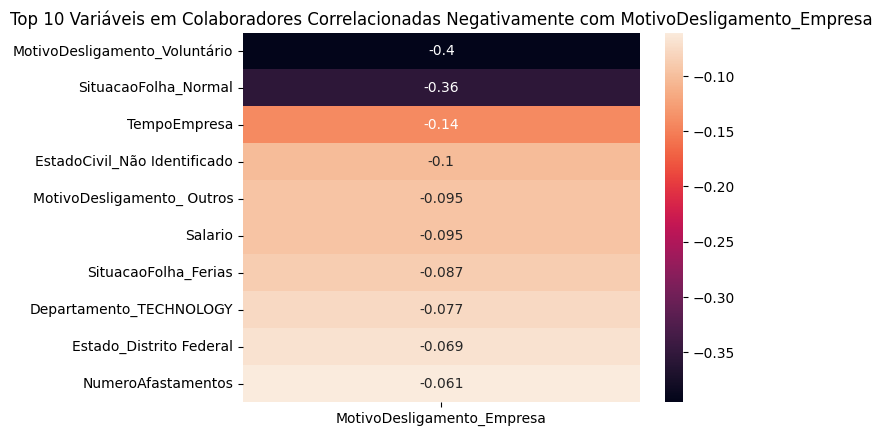

In [141]:
# Criando uma nova variável
colunas_absenteismo = ['SituacaoFolha_Demitido', 'MotivoDesligamento_Voluntário', 'NumeroAfastamentos',
                       'Acentuacao_Tracos_Personalidade', 'Esgotamento', 'Transtorno_Somatoforme_N_Especificado',
                       'TempoAfastamento', 'MotivoDesligamento_Empresa']

# Criando heatmaps para cada coluna
for coluna in colunas_absenteismo:
  # Top 10 fatores positivos
  sns.heatmap(colaboradores_correlacao[coluna].sort_values(ascending=False)[:10].to_frame(), annot=True)
  plt.title(f'Top 10 Variáveis em Colaboradores Correlacionadas Positivamente com {coluna}')
  plt.show()

  # Top 10 fatores negativos
  sns.heatmap(colaboradores_correlacao[coluna].sort_values()[:10].to_frame(), annot=True)
  plt.title(f'Top 10 Variáveis em Colaboradores Correlacionadas Negativamente com {coluna}')
  plt.show()

Em resumo,
- **Demissões** parecem não estar correlacionadas com muitos fatores no dataset (há uma correlação fraca negativa com o tempo de empresa, mas isso já era esperado)
- **Desligamentos voluntários** também parecem não estar muito correlacionados
- **Afastamentos** têm **correlação positiva muito forte** entre número e duração, além de possuirem **correlação positiva forte** com as doenças consideradas, como
esgotamentos e transtornos somatoforme não especificados. Por outro lado, parecem ter uma **correlação negativa moderada** com todas as áreas de bem-estar.
- **Doenças** consideradas pelo campo Descrição CID também indicam uma **correlação positiva fraca ou moderada** entre si.

Agora, gostaria de visualizar a quantidade de demissões e afastamentos ao longo do tempo. Vou considerar também a data de contratação para poder ter um parâmetro porporcional melhor.

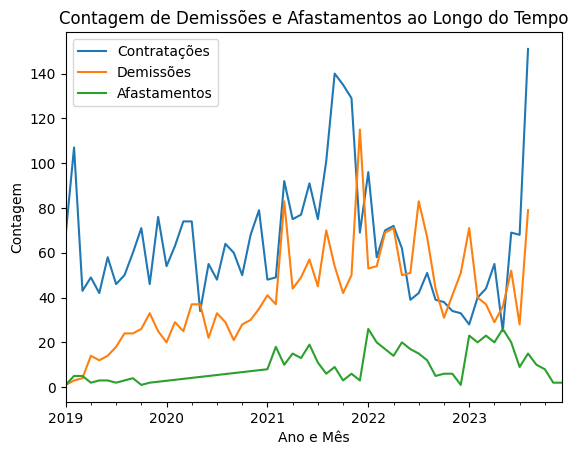

In [142]:
# Convertendo as colunas de data para datetime
colaboradores['DataDemissao'] = pd.to_datetime(colaboradores['DataDemissao'], errors='coerce')
colaboradores['DataContratacao'] = pd.to_datetime(colaboradores['DataContratacao'], errors='coerce')
afastamentos['Data_Inicio_Afastamento'] = pd.to_datetime(afastamentos['Data_Inicio_Afastamento'], errors='coerce')

# Criando colunas para o ano e mês
colaboradores['AnoMesDemissao'] = colaboradores['DataDemissao'].dt.to_period('M')
colaboradores['AnoMesContratacao'] = colaboradores['DataContratacao'].dt.to_period('M')
afastamentos['AnoMesAfastamento'] = afastamentos['Data_Inicio_Afastamento'].dt.to_period('M')

# Agrupando os dados por ano e mês, contando o número de demissões e afastamentos
demissoes_por_mes = colaboradores.groupby('AnoMesDemissao').size()
afastamentos_por_mes = afastamentos.groupby('AnoMesAfastamento').size()
contratacoes_por_mes = colaboradores.groupby('AnoMesContratacao').size()

# Mostrando os gráficos
plt.figure()
contratacoes_por_mes.plot(label='Contratações')
demissoes_por_mes.plot(label='Demissões')
afastamentos_por_mes.plot(label='Afastamentos')
plt.legend()
plt.xlabel('Ano e Mês')
plt.ylabel('Contagem')
plt.title('Contagem de Demissões e Afastamentos ao Longo do Tempo')
plt.show()

# Retornando as colunas iniciais para o tipo date only
afastamentos['Data_Inicio_Afastamento'] = pd.to_datetime(afastamentos['Data_Inicio_Afastamento']).dt.date
colaboradores['DataContratacao'] = pd.to_datetime(colaboradores['DataContratacao']).dt.date
colaboradores['DataDemissao'] = pd.to_datetime(colaboradores['DataDemissao']).dt.date

No geral, contratações, demissões e afastamentos parecem acompanhar a mesma sazonalidade. As demissões, no entanto, parecem ter aumentado um pouco mais do que as outras séries.

#### Análise do Impacto Financeiro

Por fim, vale fazer uma análise financeira do impacto financeiro que o absenteísmo tem tido nessa empresa.

In [143]:
# Selecionando colunas para a merge
colaboradores_prejuizo = colaboradores[['ID', "Salario"]]

# Renomeando colunas para facilitar a merge
colaboradores_prejuizo.columns = ['Id_Colaborador', 'Salario_dia']

# Calcunado o salário/dia
colaboradores_prejuizo['Salario_dia'] = colaboradores_prejuizo['Salario_dia']/30

# Realizando a merge com afastamentos
afastamentos = pd.merge(afastamentos, colaboradores_prejuizo, on='Id_Colaborador')

# Calculando o prejuízo
afastamentos['Prejuizo'] = afastamentos['Salario_dia'] * afastamentos['Tempo_Afastamento']

# Mostrando o resultado
afastamentos

<ipython-input-143-5d34144b582c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colaboradores_prejuizo['Salario_dia'] = colaboradores_prejuizo['Salario_dia']/30


ID  Id_Colaborador    CID Data_Inicio_Afastamento Data_Fim_Afastamento  \
0       4              32  Z73.0              2019-08-30           2019-10-26   
1       6             164  Z73.0              2019-09-22           2019-10-08   
2     358             164  F45.9              2021-02-19           2021-07-13   
3      16            2433  Z73.0              2019-06-16           2019-08-28   
4      65            2433  Z73.0              2019-07-20           2019-11-08   
..    ...             ...    ...                     ...                  ...   
484  1306             146  F45.9              2023-09-11           2023-12-15   
485  1315            2484  F45.9              2023-10-26           2024-01-24   
486  1389            2402  F45.9              2023-04-03           2023-06-13   
487  1400            2402  Z73.1              2023-07-21           2024-01-26   
488  1403            2402  Z73.1              2023-02-09           2023-08-26   

     Tempo_Afastamento                            Descricao_CID  \
0                   57                              Esgotamento   
1                   16                              Esgotamento   
2                  144  Transtorno somatoforme não especificado   
3                   73                              Esgotamento   
4                  111                              Esgotamento   
..                 ...                                      ...   
484                 95  Transtorno somatoforme não especificado   
485                 90  Transtorno somatoforme não especificado   
486                 71  Transtorno somatoforme não especificado   
487                189    Acentuação de traços de personalidade   
488                198    Acentuação de traços de personalidade   

    AnoMesAfastamento  Salario_dia      Prejuizo  
0             2019-08   283.333333  16150.000000  
1             2019-09   188.500000   3016.000000  
2             2021-02   188.500000  27144.000000  
3             2019-06    54.000000   3942.000000  
4             2019-07    54.000000   5994.000000  
..                ...          ...           ...  
484           2023-09   230.000000  21850.000000  
485           2023-10   379.238667  34131.480000  
486           2023-04   117.238333   8323.921667  
487           2023-07   117.238333  22158.045000  
488           2023-02   117.238333  23213.190000  

[489 rows x 10 columns]

In [144]:
# Exibindo o prejuízo total
print(f'Nesta empresa desde {colaboradores["DataContratacao"].min()} foram perdidos R$ {format(afastamentos["Prejuizo"].sum(), ",.2f")} por absenteísmo')


Nesta empresa desde 2019-01-02 foram perdidos R$ 15,898,947.89 por absenteísmo


Agora, também gostaria de visualizar o prejuízo ano a ano

In [145]:
# Criando uma coluna para o ano
afastamentos['Ano'] = afastamentos['AnoMesAfastamento'].dt.year

# Agrupando e mostrando os resultados
print('Prejuízo por ano')
afastamentos.groupby('Ano')['Prejuizo'].sum().apply(lambda x: f'R$ {format(x, ",.2f")}')

Prejuízo por ano


Ano
2019      R$ 576,661.89
2021    R$ 4,146,537.03
2022    R$ 4,800,594.09
2023    R$ 6,375,154.88
Name: Prejuizo, dtype: object

O prejuízo tem aumentado ao longo do tempo. Será isso pelo tempo de afastamento, número de afastamento ou salário dos afastados?

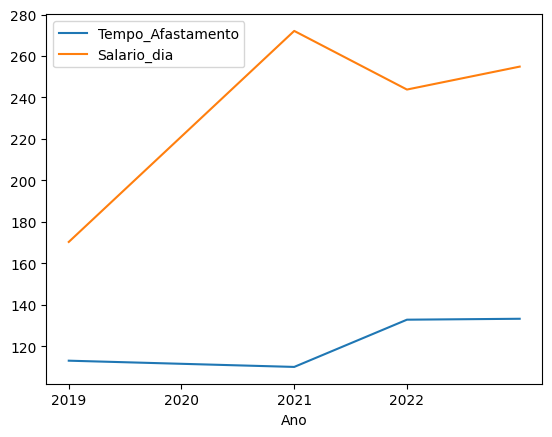

In [146]:
# Criando novo gráfico para comparações
plt.figure()
afastamentos.groupby('Ano')['Tempo_Afastamento'].mean().plot()
afastamentos.groupby('Ano')['Salario_dia'].mean().plot()
plt.legend()
plt.xticks(range(2019,2023,1))
plt.show()

Aparentemente, isso tem mais a ver com o salário das pessoas afetadas do que com o tempo de afastamento em si (ainda que nenhuma correlação expressiva entre altos salários e maiores índices de afastamentos tenha sido encontrada)

Uma última análise teria a ver com a taxa de afastamentos ao longo dos anos, em comparação ao número de colaboradores ativos nesses mesmos anos

In [147]:
# Criando colunas de ano
colaboradores['AnoContratacao'] = pd.to_datetime(colaboradores['DataContratacao']).dt.year
colaboradores['AnoDemissao'] = pd.to_datetime(colaboradores['DataDemissao']).dt.year

# Criando um range de anos para fazer a iteração
anos = range(colaboradores['AnoContratacao'].min(), colaboradores['AnoContratacao'].max()+1)
ativos_por_ano = {}

for ano in anos:
    ativos_naquele_ano = colaboradores[(colaboradores['AnoContratacao'] <= ano) &
     ((colaboradores['AnoDemissao'] > ano) | (colaboradores['DataDemissao'].isna()))].shape[0]
    ativos_por_ano[ano] = ativos_naquele_ano

# Mostrando o resultado
ativos_por_ano

{2019: 518, 2020: 895, 2021: 1289, 2022: 1258, 2023: 1366}

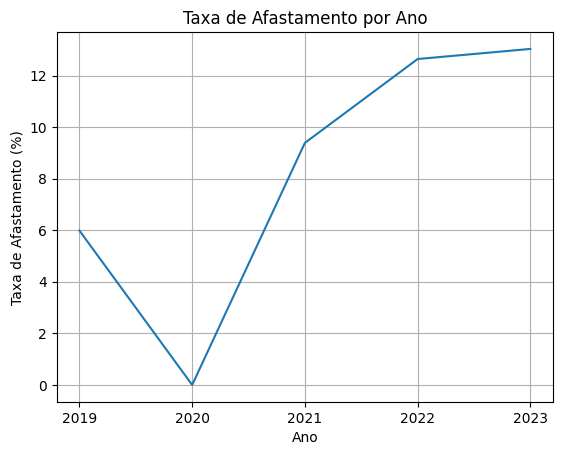

In [148]:
# Criando uma variável para afastamentos por ano
afastamentos_por_ano = afastamentos.groupby('Ano')['ID'].count()

# Começando a iteração e cálculos
taxa_afastamento_por_ano = {}

for ano in anos:
    if ano in afastamentos_por_ano.index:
        taxa_afastamento_por_ano[ano] = afastamentos_por_ano.loc[ano] / ativos_por_ano[ano] * 100
    else:
        taxa_afastamento_por_ano[ano] = 0

# Visualizando os resultados
plt.plot(list(taxa_afastamento_por_ano.keys()), list(taxa_afastamento_por_ano.values()))
plt.xlabel('Ano')
plt.ylabel('Taxa de Afastamento (%)')
plt.title('Taxa de Afastamento por Ano')
plt.xticks(anos)
plt.grid(True)
plt.show()


A taxa de afastamento em 2020 provavelmente foi zero devido às implicações legais e sociais com relação ao Covid-19.

Em geral, nota-se um grande aumento da taxa de afastamento nessa empresa, bem acima dos 4% sugeridos pela Ohli. Isso explica os prejuízos consideráveis que a empresa vem tendo com o abenteísmo.

### Conclusão e Recomendações

A análise dos dados evidencia que o absenteísmo representa um desafio significativo para a empresa, acumulando uma perda financeira expressiva de quase 16 milhões de reais desde 2019, sendo mais de 6 milhões apenas no ano de 2023. Este problema é ainda mais agravado quando observamos que os colaboradores da empresa são três vezes mais propensos ao afastamento comparado à média de mercado fornecida pela Ohli.

Embora a análise não tenha identificado uma correlação inversa forte ou muito forte que aponte para uma solução definitiva, foi possível notar que um aumento na percepção de bem-estar pode efetivamente contrabalançar as tendências de absenteísmo. Este é um indicativo valioso de que estratégias focadas no bem-estar dos colaboradores podem se revelar uma via promissora para mitigar o problema.

Dessa forma, recomendo a adoção das seguintes estratégias para abordar essa questão crítica:

1. **Pesquisas Qualitativas Aprofundadas:** Além de entender a nota atribuída ao bem-estar por cada colaborador, é crucial explorar as razões subjacentes por trás dessas avaliações. Isso pode oferecer insights mais profundos sobre como melhorar o bem-estar no ambiente de trabalho.
   
2. **Promoção de Autocuidado:** Encorajar práticas de autocuidado através de workshops e programas de bem-estar pode ser um caminho eficaz. O foco deve estar em ajudar os colaboradores a sair do "meio termo" e cultivar hábitos que promovam um maior autocuidado.

3. **Desenvolvimento de Modelos Preditivos:** A implementação de modelos analíticos para prever afastamentos e demissões (predominantemente voluntárias) pode ser uma estratégia proativa. Esses modelos podem usar respostas a pesquisas específicas e outros indicadores como preditores, permitindo intervenções tempestivas para reter talentos e reduzir o absenteísmo.

**Conclusão:**

O caminho à frente é desafiador, mas com uma abordagem orientada a dados e focada no bem-estar dos colaboradores, há uma oportunidade significativa de superar o problema do absenteísmo e construir um ambiente de trabalho mais saudável e produtivo.


### Preparação para a Importação no Power BI

Por fim, vou preparar os dados para a exportação no PowerBI e construção dos dashboards.

Vou construir as seguintes visualizações para cada dashaboard:

1. Dashboard do Colaborador:
  - Comparação entre o mês atual e o mês anterior para cada área do autocuidado (KPIs)
  - Nota média de cada área do autocuidado ao longo do tempo (Gráfico de linhas)

2. Dashboard Gerencial:
  - Comparação entre o mês atual e o mês anterior para os seguintes indicadores (KPIs):
    - Nota de Bem-estar Médio
    - Total de colaboradores ativos
    - Taxa de absenteísmo
    - Gastos com absenteísmo
    - Total de demissões
  - Nota de bem-estar ao longo do tempo (Gráfico de linhas)
  - Taxa de absenteísmo ao longo do tempo (Gráfico de linhas)
  - Gastos com absenteísmo ao longo do tempo (Gráfico de linhas)
  - Departamentos com maior taxa de absenteísmo (Gráfico de barras ou colunas)
  - Principais motivos de afastamento (Gráfico de barras ou colunas)
  - Principais motivos de desligamentos (Gráfico de barras ou colunas)

In [149]:
# Criando uma nova tabela de afastamentos para o power BI
afastamentos_pbi = afastamentos[['ID', 'Id_Colaborador', 'Data_Inicio_Afastamento', 'Data_Fim_Afastamento',
                                 'Tempo_Afastamento', 'Descricao_CID', 'Prejuizo']]

# Mostrando os dados
afastamentos_pbi.head()

ID  Id_Colaborador Data_Inicio_Afastamento Data_Fim_Afastamento  \
0    4              32              2019-08-30           2019-10-26   
1    6             164              2019-09-22           2019-10-08   
2  358             164              2021-02-19           2021-07-13   
3   16            2433              2019-06-16           2019-08-28   
4   65            2433              2019-07-20           2019-11-08   

   Tempo_Afastamento                            Descricao_CID  Prejuizo  
0                 57                              Esgotamento   16150.0  
1                 16                              Esgotamento    3016.0  
2                144  Transtorno somatoforme não especificado   27144.0  
3                 73                              Esgotamento    3942.0  
4                111                              Esgotamento    5994.0

In [150]:
# Criando uma tabela de colaboradores para exportar
colaboradores_pbi = colaboradores[['ID', 'Genero', 'EstadoCivil', 'Idade', 'SoCargo', 'Senioridade', 'Departamento',
                                   'DataContratacao', 'DataDemissao', 'SituacaoFolha', 'MotivoDesligamento', 'Salario',
                                   'TempoEmpresa']]
colaboradores_pbi.head()


ID     Genero  EstadoCivil  Idade                      SoCargo Senioridade  \
0   1  Masculino  Solteiro(a)     42           ANALISTA DE TESTES      SENIOR   
1   2  Masculino    Casado(a)     56      OPERADOR DE ATENDIMENTO      JUNIOR   
2   3  Masculino  Solteiro(a)     36       ANALISTA DESENVOLVEDOR      SENIOR   
3   4  Masculino    Casado(a)     52  TÉCNICO DE TELECOMUNICAÇÕES       PLENO   
4   5  Masculino    Casado(a)     52       ANALISTA DESENVOLVEDOR      SENIOR   

  Departamento DataContratacao DataDemissao SituacaoFolha MotivoDesligamento  \
0   TECHNOLOGY      2020-08-06   2020-12-01      Demitido         Voluntário   
1    COMERCIAL      2020-01-21   2020-05-20      Demitido            Empresa   
2   TECHNOLOGY      2021-07-05   2022-04-22      Demitido         Voluntário   
3    COMERCIAL      2021-09-13          NaT        Normal                NaN   
4   TECHNOLOGY      2019-01-21   2019-11-01      Demitido            Empresa   

   Salario  TempoEmpresa  
0  6000.00           117  
1  1300.00           120  
2  7000.00           291  
3  2060.64           732  
4  6422.09           284

In [151]:
# Fazendo o download dos arquivos:
colaboradores_pbi.to_excel('colaboradores.xlsx', index=False)
files.download('colaboradores.xlsx')

afastamentos_pbi.to_excel("afastamentos.xlsx", index=False)
files.download('afastamentos.xlsx')

respostas.to_csv("respostas.txt", sep='\t', index=False)
files.download("respostas.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>